# <ins> <span style="color:lightblue">Home Loan Default Prediction - Sprint 1</span> <ins>

## <ins> <span style="color:lightblue">Table of Contents </span> <ins>

### [Introduction](#Intro)

### [Loading and Preparation of Data](#LoadandPrep)

### [Part 1 - Data Cleaning](#Datacleaning)
1. [Assessment](#Assessment)
2. [Handling Duplicates](#Duplicates)
3. [Extracting Categorical and numerical Data type](#catandnum)
4. [Null Values](#Null)

### [Part 2 - Preliminary Expolatory Data Analysis 1](#preliminaryeda)
1. [Study of Individual Variables](#Individualvariables)
2. [Relationship Analysis](#relationship)
3. [Positive and Negative Correlation](#positivenegativecorr)

### [Part 3 - Conclusion and Next Steps](#conclusion)

____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# <ins> Introduction <a id='Intro'></a> <ins>

 Home loan default prediction is a crucial task in the banking and financial sector to mitigate risks associated with lending. With the emergence of machine learning techniques, it has become possible to analyse historical data to develop predictive models that can accurately identify potential defaulters. In this project, we aim to utilize machine learning algorithms to predict the likelihood of a borrower defaulting on a home loan. We will be dividing this project into 3 parts, namely:

* Sprint 1 
* Sprint 2
* Sprint 3

This will be the Sprint 1 part of our project where we will get to preprocess our raw dataset that we currently hold and run basic cleaning and EDA processes inorder to prepare the dataset for our Machine learning Models during our final part of our main Project. 

The Sprint 1 has been divided into 3 steps :- Data Cleaning, Basic Exploratory Data Analysis and Feature Engineering. 

<ins> 1. Data Cleaning: <ins>

The first step in our analysis involves data cleaning, where we preprocess the raw data to ensure its quality and consistency. This includes checking the shape, head and info of the data, handling missing values, and removing duplicates.

In our dataset, we will identify missing values in various features such as income, credit amount, and other borrower information. We will then impute these missing values using appropriate techniques, such as mean or median imputation for numerical features and mode imputation for categorical features. Additionally, we will detect outliers in numerical features like income and credit amount using visualization techniques like box plots and treat them using methods like capping or removal. 

<ins> 2. Basic Exploratory Data Analysis (EDA): <ins>

After cleaning the data, we will conduct basic exploratory data analysis to gain insights into the dataset. This includes calculating summary statistics, visualizing data distributions, and analyzing relationships between variables.

We will compute descriptive statistics such as mean, median, and standard deviation for numerical features to understand their central tendencies and variability. Furthermore, we will visualize the distributions of numerical features using histograms and explore the relationships between numerical features and the target variable using scatter plots or correlation matrices. For categorical features, we will examine their frequency distributions using bar plots and analyze their impact on the target variable.

<ins> 3. Conclusion and Next Steps <ins>

We will be proposing what our next steps would be in relation to EDA 2 and Feature engineering opportunities. They will play a vital role in improving the predictive performance of machine learning models. In that step, I will be proposing to perform certain data preprocessing, create dummy variables where ever needed, transforming data types from categorical and numerical, and perform further reduction of rows if necessary to enhance the model's accuracy .  

We will need to convert Categorical data types to their numerical representations (aka dummy variables or one- hot coding) so that we can apply statistical modeling. We may even have to divide the dataset into train and test inorder to create and fit our Machine Learning Models. 

By systematically cleaning the data and conducting basic EDA, we aim to prepare the dataset for building robust machine learning models that can accurately predict home loan defaults.

____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# <ins> Loading and Preparation of Data <ins> <a id='Loading-&-Preparation-of-Data'></a>

Lets first prepare our Notebook for the project by installing an upgrade on Pandas, running all the necessary imports essential for the project and load the dataset to work on

In [9]:
# To install any updates or upgrades in Panda
!pip3 install --upgrade pandas

In [10]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Lets run all the necessary imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [12]:
# This code is to get rid of the red warnings through out this notebook
pd.options.mode.copy_on_write = True 

In [13]:
# Lets read and load the train_data csv file
raw_data = pd.read_csv('train_data.csv') 

In [14]:
# Shows first 5 rows of the data
raw_data.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      450407         Cash loans           F            N               Y   
1      271298         Cash loans           M            Y               Y   
2      122238         Cash loans           M            Y               Y   
3      305311         Cash loans           M            N               N   
4      414121         Cash loans           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             1           67500.0    227520.0      11065.5         180000.0   
1             1          247500.0   1882372.5      65560.5        1719000.0   
2             1          180000.0    101880.0      10827.0          90000.0   
3             0           81000.0    405000.0      20677.5         405000.0   
4             0          157500.0    888840.0      29506.5         675000.0   

   ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0   
1  ...                0                0                0   
2  ...                0                0                0   
3  ...                0                0                0   
4  ...                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        1.0   
1                         0.0                        0.0   
2                         0.0                        2.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  TARGET  
0                        0.0                         2.0       0  
1                        1.0                         3.0       0  
2                        0.0                         1.0       0  
3                        0.0                         2.0       0  
4                        0.0                         2.0       0  

[5 rows x 122 columns]

___________________________________________________________________________________________________________________________________________________________________________________

# Part 1: <ins> Data Cleaning <a id='Datacleaning'></a> <ins>

This section focuses on exploring the dataset further. It aims to:

* Determine the total shape of the data.
* Identify any null values that require handling, either by filling or deleting them.
* Detect any duplicate entries within the dataset.

## <ins> Assessment <a id='Assessment'></a> <ins>

Lets look at the first 20 rows of the dataset.

In [20]:
# Shows first 20 rows of the data
raw_data.head(20)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       450407         Cash loans           F            N               Y   
1       271298         Cash loans           M            Y               Y   
2       122238         Cash loans           M            Y               Y   
3       305311         Cash loans           M            N               N   
4       414121         Cash loans           F            N               Y   
5       188073         Cash loans           M            Y               Y   
6       123261         Cash loans           F            N               Y   
7       103883         Cash loans           F            N               Y   
8       169250         Cash loans           F            N               Y   
9       105040         Cash loans           M            Y               N   
10      371639         Cash loans           F            N               Y   
11      177495         Cash loans           M            N               Y   
12      138620         Cash loans           M            Y               N   
13      414250    Revolving loans           F            N               Y   
14      159819    Revolving loans           F            N               Y   
15      315041         Cash loans           F            N               N   
16      153547         Cash loans           F            Y               Y   
17      107761         Cash loans           F            N               Y   
18      143341         Cash loans           F            N               Y   
19      217020         Cash loans           F            N               Y   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0              1           67500.0    227520.0      11065.5         180000.0   
1              1          247500.0   1882372.5      65560.5        1719000.0   
2              1          180000.0    101880.0      10827.0          90000.0   
3              0           81000.0    405000.0      20677.5         405000.0   
4              0          157500.0    888840.0      29506.5         675000.0   
5              0          202500.0   1350000.0      64948.5        1350000.0   
6              0          180000.0   1113840.0      44302.5         900000.0   
7              0          103500.0     45000.0       4738.5          45000.0   
8              0          157500.0    728460.0      38938.5         675000.0   
9              0           90000.0   1078200.0      31653.0         900000.0   
10             2          121500.0    841500.0      29943.0         841500.0   
11             0           72000.0    254700.0      26226.0         225000.0   
12             0          202500.0    495000.0      17779.5         495000.0   
13             0          225000.0    855000.0      42750.0         855000.0   
14             1          112500.0    315000.0      15750.0         315000.0   
15             0           90000.0   1350000.0      75384.0        1350000.0   
16             0           94500.0    990000.0      28944.0         990000.0   
17             0          180000.0    922716.0      49288.5         855000.0   
18             0          117000.0    518562.0      22099.5         463500.0   
19             0          157500.0    239850.0      25186.5         225000.0   

    ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0   ...                0                0                0   
1   ...                0                0                0   
2   ...                0                0                0   
3   ...                0                0                0   
4   ...                0                0                0   
5   ...                0                0                0   
6   ...                0                0                0   
7   ...                0                0                0   
8   ...                0                0                0   
9   ...                0                0                0   
10

In the Dataset above we can see that each row represents an individual applicant, and there's a wide range of features captured, from basic demographic information like age and gender to financial specifics like income and credit amount.

The dataset includes a mix of numerical and categorical data. Numerical data includes columns like income, credit amount, and various ratios, while categorical data includes things like gender, education type, and housing type.

This summary provides a quick overview of the dataset's structure, data types, missing values, unique values, and sample values for each column.

In [23]:
# The summarytable function will provide a comprehensive overview of the raw data
def summarytable(raw_data):
    print(f"Dataset Shape: {raw_data.shape}")
    summary = pd.DataFrame(raw_data.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = raw_data.isnull().sum().values
    summary['Missing_Percentage'] = np.round(raw_data.isnull().sum().values/raw_data.shape[0]*100,2)
    summary['Uniques'] = raw_data.nunique().values
    summary['Uniques_Percentage'] = np.round(raw_data.nunique().values/raw_data.shape[0]*100,2)
    summary['First Value'] = raw_data.loc[0].values
    summary['Second Value'] = raw_data.loc[1].values
    summary['Third Value'] = raw_data.loc[2].values
    summary['Last Value'] = raw_data.iloc[-1].values

    return summary

summarytable(raw_data)

Dataset Shape: (184506, 122)


Name   dtypes  Missing  Missing_Percentage  \
0                    SK_ID_CURR    int64        0                0.00   
1            NAME_CONTRACT_TYPE   object        0                0.00   
2                   CODE_GENDER   object        0                0.00   
3                  FLAG_OWN_CAR   object        0                0.00   
4               FLAG_OWN_REALTY   object        0                0.00   
..                          ...      ...      ...                 ...   
117  AMT_REQ_CREDIT_BUREAU_WEEK  float64    24998               13.55   
118   AMT_REQ_CREDIT_BUREAU_MON  float64    24998               13.55   
119   AMT_REQ_CREDIT_BUREAU_QRT  float64    24998               13.55   
120  AMT_REQ_CREDIT_BUREAU_YEAR  float64    24998               13.55   
121                      TARGET    int64        0                0.00   

     Uniques  Uniques_Percentage First Value Second Value Third Value  \
0     184506              100.00      450407       271298      122238   
1          2                0.00  Cash loans   Cash loans  Cash loans   
2          3                0.00           F            M           M   
3          2                0.00           N            Y           Y   
4          2                0.00           Y            Y           Y   
..       ...                 ...         ...          ...         ...   
117        8                0.00         0.0          0.0         0.0   
118       22                0.01         1.0          0.0         2.0   
119       11                0.01         0.0          1.0         0.0   
120       22                0.01         2.0          3.0         1.0   
121        2                0.00           0            0           0   

     Last Value  
0        125605  
1    Cash loans  
2             F  
3             N  
4             Y  
..          ...  
117         0.0  
118         0.0  
119         0.0  
120         2.0  
121           0  

[122 rows x 10 columns]

This function, summarytable, generates a summary table for the provided raw data. Here's a breakdown of what each part of the summary table represents:

Name: Name of the column in the dataset. <br>
dtypes: Data type of the column. <br>
Missing: Number of missing values in the column. <br>
Missing_Percentage: Percentage of missing values in the column. <br>
Uniques: Number of unique values in the column. <br>
Uniques_Percentage: Percentage of unique values in the column. <br>
First Value: Value of the column in the first row of the dataset. <br>
Second Value: Value of the column in the second row of the dataset. <br>
Third Value: Value of the column in the third row of the dataset. <br>
Last Value: Value of the column in the last row of the dataset. <br>

This summary table provides a quick overview of the dataset's structure, including the data types, missing values, unique values, and some sample values for each feature. It helps in understanding the composition and distribution of data within the dataset, which can be useful for data preprocessing and analysis tasks.

## <ins> Handling Duplicates <a id='Duplicates'></a> <ins>

Lets check if there are any Duplicates in the Dataset

In [27]:
# Check for duplicate rows
raw_data.duplicated().sum()

0

There are no Duplicates 

## <ins> Extracting Categorical and numerical Data types <a id='catandnum'></a> <ins>

Some obvious categorical features can be extracted using select_dtypes() and excluding all numeric columns. There are 16 such features. 

Before that lets change the column names to lower cases for easy accessibility.

In [31]:
# Change all column names to lowercase so that it is easier to refer to them
raw_data.columns = raw_data.columns.str.lower()
raw_data.columns

Index(['sk_id_curr', 'name_contract_type', 'code_gender', 'flag_own_car',
       'flag_own_realty', 'cnt_children', 'amt_income_total', 'amt_credit',
       'amt_annuity', 'amt_goods_price',
       ...
       'flag_document_19', 'flag_document_20', 'flag_document_21',
       'amt_req_credit_bureau_hour', 'amt_req_credit_bureau_day',
       'amt_req_credit_bureau_week', 'amt_req_credit_bureau_mon',
       'amt_req_credit_bureau_qrt', 'amt_req_credit_bureau_year', 'target'],
      dtype='object', length=122)

In [32]:
# Extract categorical variables 
non_numeric = raw_data.select_dtypes(exclude="number")
non_numeric.head(10)

name_contract_type code_gender flag_own_car flag_own_realty  \
0         Cash loans           F            N               Y   
1         Cash loans           M            Y               Y   
2         Cash loans           M            Y               Y   
3         Cash loans           M            N               N   
4         Cash loans           F            N               Y   
5         Cash loans           M            Y               Y   
6         Cash loans           F            N               Y   
7         Cash loans           F            N               Y   
8         Cash loans           F            N               Y   
9         Cash loans           M            Y               N   

   name_type_suite      name_income_type            name_education_type  \
0           Family  Commercial associate  Secondary / secondary special   
1    Unaccompanied               Working               Higher education   
2  Spouse, partner               Working               Higher education   
3    Unaccompanied               Working  Secondary / secondary special   
4    Unaccompanied               Working  Secondary / secondary special   
5    Unaccompanied  Commercial associate              Incomplete higher   
6           Family             Pensioner  Secondary / secondary special   
7           Family  Commercial associate  Secondary / secondary special   
8           Family               Working  Secondary / secondary special   
9    Unaccompanied             Pensioner                Lower secondary   

     name_family_status  name_housing_type occupation_type  \
0               Married  House / apartment     Sales staff   
1        Civil marriage  House / apartment        Managers   
2               Married  House / apartment        Laborers   
3  Single / not married       With parents             NaN   
4        Civil marriage  House / apartment     Sales staff   
5  Single / not married       With parents        Laborers   
6               Married  House / apartment             NaN   
7               Married  House / apartment     Sales staff   
8               Married  House / apartment     Sales staff   
9               Married  House / apartment             NaN   

  weekday_appr_process_start       organization_type fondkapremont_mode  \
0                  WEDNESDAY  Business Entity Type 3                NaN   
1                    TUESDAY  Business Entity Type 3                NaN   
2                     MONDAY       Transport: type 4   reg oper account   
3                  WEDNESDAY                   Other                NaN   
4                    TUESDAY  Business Entity Type 3                NaN   
5                    TUESDAY           Self-employed                NaN   
6                     SUNDAY                     XNA   reg oper account   
7                   SATURDAY           Self-employed   reg oper account   
8                    TUESDAY           Trade: type 7                NaN   
9                     FRIDAY                     XNA      not specified   

   housetype_mode wallsmaterial_mode emergencystate_mode  
0  block of flats              Mixed                  No  
1             NaN                NaN                 NaN  
2  block of flats              Panel                  No  
3             NaN                NaN                 NaN  
4             NaN                NaN                 NaN  
5  block of flats              Panel                  No  
6  block of flats              Panel                  No  
7  block of flats              Panel                  No  
8  block of flats              Mixed                  No  
9  block of flats       Stone, brick                  No

Now, lets store the above categorical columns in a list so that we can use them later.

In [34]:
# Lets define the categorical columns for easy access
categorical_cols = non_numeric.columns.to_list()
categorical_cols

['name_contract_type',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'occupation_type',
 'weekday_appr_process_start',
 'organization_type',
 'fondkapremont_mode',
 'housetype_mode',
 'wallsmaterial_mode',
 'emergencystate_mode']

In [35]:
# Determine the length of categorical columns
len(categorical_cols)

16

There are 16 categorical columns in the Dataset.

In [37]:
# Extract numerical columns
non_object = raw_data.select_dtypes(exclude="object")

In [38]:
# Show the first 5 rows of the Dataset
non_object.head()

sk_id_curr  cnt_children  amt_income_total  amt_credit  amt_annuity  \
0      450407             1           67500.0    227520.0      11065.5   
1      271298             1          247500.0   1882372.5      65560.5   
2      122238             1          180000.0    101880.0      10827.0   
3      305311             0           81000.0    405000.0      20677.5   
4      414121             0          157500.0    888840.0      29506.5   

   amt_goods_price  region_population_relative  days_birth  days_employed  \
0         180000.0                    0.018634      -17210           -774   
1        1719000.0                    0.018850      -18640            -96   
2          90000.0                    0.022625      -14649          -6130   
3         405000.0                    0.035792      -12762          -5891   
4         675000.0                    0.018801      -16329           -345   

   days_registration  ...  flag_document_19  flag_document_20  \
0            -5580.0  ...                 0                 0   
1            -5711.0  ...                 0                 0   
2            -1776.0  ...                 0                 0   
3            -6430.0  ...                 0                 0   
4            -1413.0  ...                 0                 0   

   flag_document_21  amt_req_credit_bureau_hour  amt_req_credit_bureau_day  \
0                 0                         0.0                        0.0   
1                 0                         0.0                        0.0   
2                 0                         0.0                        0.0   
3                 0                         0.0                        0.0   
4                 0                         0.0                        0.0   

   amt_req_credit_bureau_week  amt_req_credit_bureau_mon  \
0                         0.0                        1.0   
1                         0.0                        0.0   
2                         0.0                        2.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   amt_req_credit_bureau_qrt  amt_req_credit_bureau_year  target  
0                        0.0                         2.0       0  
1                        1.0                         3.0       0  
2                        0.0                         1.0       0  
3                        0.0                         2.0       0  
4                        0.0                         2.0       0  

[5 rows x 106 columns]

In [39]:
# Add the numerical columns to a list
numerical_cols = non_object.columns.to_list()
numerical_cols

['sk_id_curr',
 'cnt_children',
 'amt_income_total',
 'amt_credit',
 'amt_annuity',
 'amt_goods_price',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'own_car_age',
 'flag_mobil',
 'flag_emp_phone',
 'flag_work_phone',
 'flag_cont_mobile',
 'flag_phone',
 'flag_email',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'hour_appr_process_start',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city',
 'ext_source_1',
 'ext_source_2',
 'ext_source_3',
 'apartments_avg',
 'basementarea_avg',
 'years_beginexpluatation_avg',
 'years_build_avg',
 'commonarea_avg',
 'elevators_avg',
 'entrances_avg',
 'floorsmax_avg',
 'floorsmin_avg',
 'landarea_avg',
 'livingapartments_avg',
 'livingarea_avg',
 'nonlivingapartments_avg',
 'nonlivingarea_avg',
 'apartments_mode',
 'basementarea_mode',
 

In [40]:
# length of numerical columns
len(numerical_cols)

106

There are 106 numerical columns

## <ins> Null Values <a id='Null'></a> <ins>

As we saw in the summary stats of all the columns in the data at the above section, its quite evident that there are huge number of null values present in the dataset. 

Lets have a detail look at the dataset in large to see if there are any other values apart from Nan values present in the data which needs a careful look at.

In [44]:
raw_data.head(100)

sk_id_curr name_contract_type code_gender flag_own_car flag_own_realty  \
0       450407         Cash loans           F            N               Y   
1       271298         Cash loans           M            Y               Y   
2       122238         Cash loans           M            Y               Y   
3       305311         Cash loans           M            N               N   
4       414121         Cash loans           F            N               Y   
..         ...                ...         ...          ...             ...   
95      240169         Cash loans           F            N               N   
96      246722    Revolving loans           M            Y               N   
97      249080         Cash loans           F            N               N   
98      255162         Cash loans           M            Y               N   
99      407493         Cash loans           F            N               Y   

    cnt_children  amt_income_total  amt_credit  amt_annuity  amt_goods_price  \
0              1           67500.0    227520.0      11065.5         180000.0   
1              1          247500.0   1882372.5      65560.5        1719000.0   
2              1          180000.0    101880.0      10827.0          90000.0   
3              0           81000.0    405000.0      20677.5         405000.0   
4              0          157500.0    888840.0      29506.5         675000.0   
..           ...               ...         ...          ...              ...   
95             1           99000.0   1256400.0      40657.5         900000.0   
96             0          108000.0    270000.0      13500.0         270000.0   
97             0          144000.0    481495.5      33511.5         454500.0   
98             1          121500.0    517788.0      33219.0         427500.0   
99             0           90000.0   1483650.0      61357.5        1350000.0   

    ... flag_document_19 flag_document_20 flag_document_21  \
0   ...                0                0                0   
1   ...                0                0                0   
2   ...                0                0                0   
3   ...                0                0                0   
4   ...                0                0                0   
..  ...              ...              ...              ...   
95  ...                0                0                0   
96  ...                0                0                0   
97  ...                0                0                0   
98  ...                0                0                0   
99  ...                0                0                0   

   amt_req_credit_bureau_hour amt_req_credit_bureau_day  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
..                        ...                       ...   
95                        0.0                       0.0   
96                        NaN                       NaN   
97                        0.0                       0.0   
98                        NaN                       NaN   
99                        0.0                       0.0   

    amt_req_credit_bureau_week  amt_req_credit_bureau_mon  \
0                          0.0                        1.0   
1                          0.0                        0.0   
2                          0.0                        2.0   
3                          0.0                        0.0   
4                          0.0                        0.0   
..                         ...                        ...   
95                         0.0                        0.0   
96                         NaN                        NaN   
97                         0.0                        0.0   
98                         NaN            

I took a sample of 100 rows to see if there are any other different value apart from Nan that needs attention, and I found out that the column name Organization type has a value named XNA which looks like a <br> 
null value. Lets go ahead and look at the variable in detail. 

In [46]:
# Find out unique values of Organization type column
raw_data["organization_type"].unique()

array(['Business Entity Type 3', 'Transport: type 4', 'Other',
       'Self-employed', 'XNA', 'Trade: type 7', 'Kindergarten',
       'Transport: type 2', 'Restaurant', 'Insurance', 'Government',
       'Medicine', 'Bank', 'Industry: type 3', 'Military', 'Security',
       'Realtor', 'Industry: type 9', 'Culture', 'Business Entity Type 2',
       'Legal Services', 'Emergency', 'Postal', 'Business Entity Type 1',
       'Electricity', 'Housing', 'Trade: type 3', 'School', 'Agriculture',
       'Hotel', 'University', 'Construction', 'Police',
       'Industry: type 7', 'Security Ministries', 'Transport: type 3',
       'Services', 'Trade: type 2', 'Trade: type 6', 'Industry: type 11',
       'Cleaning', 'Industry: type 2', 'Industry: type 5', 'Religion',
       'Trade: type 1', 'Mobile', 'Industry: type 1', 'Industry: type 12',
       'Industry: type 4', 'Transport: type 1', 'Advertising', 'Telecom',
       'Trade: type 5', 'Industry: type 10', 'Industry: type 6',
       'Trade: type 4',

 Lets now go ahead and convert the XNA or XAP values (if any) to Nan value for easy evaluation

In [48]:
x_null_cols = [col for col in raw_data.columns if ((raw_data[col] == "XNA") | (raw_data[col] == "XAP")).any()]

for col in x_null_cols:
    raw_data.loc[(raw_data[col] == "XNA") | (raw_data[col] == "XAP"), col] = np.nan

Now that we have successfully converted the XNA and XAP values to Nan, Lets now find out the Null Value Percentage in the data below

In [50]:
def null_percentage(raw_data):
    null_values_total = raw_data.isnull().sum().sort_values(ascending = False)
    total_null_percent = (raw_data.isnull().sum()/raw_data.isnull().count() * 100).sort_values(ascending = False)
    return pd.concat([null_values_total, total_null_percent], axis = 1, keys = ['Total Null Sum', 'Null Percentage'])

In [51]:
null_percentage(raw_data)[0: 100]

Total Null Sum  Null Percentage
commonarea_mode                   128971        69.900708
commonarea_medi                   128971        69.900708
commonarea_avg                    128971        69.900708
nonlivingapartments_medi          128146        69.453568
nonlivingapartments_mode          128146        69.453568
...                                  ...              ...
amt_income_total                       0         0.000000
amt_credit                             0         0.000000
name_income_type                       0         0.000000
name_education_type                    0         0.000000
name_family_status                     0         0.000000

[100 rows x 2 columns]

The code calculates the percentage of missing values for each column in the raw_data and sorts the results in ascending order. 
Here's a breakdown of the interpretation:

Columns with 0% missing values:<br>
These columns have no missing data. They are complete and contain values for all rows in the dataset. Examples include SK_ID_CURR, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, and so on.

Columns with less than 1% missing values:<br>
These columns have minimal missing data, which is unlikely to significantly impact analysis or modeling.
Examples include DAYS_LAST_PHONE_CHANGE and CNT_FAM_MEMBERS.

Columns with missing values between 1% to 10%:<br>
These columns have a small percentage of missing values, which may require attention but are not critical.
Examples include AMT_ANNUITY, AMT_GOODS_PRICE, and EXT_SOURCE_2.

Columns with missing values between 10% to 50%:<br>
These columns have a moderate to high percentage of missing values, indicating substantial missing data.
Missing data in these columns may significantly impact analysis or modeling, and imputation or other strategies may be necessary.
Examples include OCCUPATION_TYPE, EXT_SOURCE_3, and EMERGENCYSTATE_MODE.

Columns with missing values over 50%:<br>
These columns have a very high percentage of missing values, suggesting a considerable amount of missing data.
Imputation may be challenging for these columns, and careful consideration is needed before including them in analysis or modeling.
Examples include FONDKAPREMONT_MODE, HOUSE_TYPE_MODE, and TOTALAREA_MODE.

Interpretation of specific columns:<br>
For instance, OWN_CAR_AGE has approximately 66% missing values, indicating that the majority of entries do not have information about the age of the owned car. This could imply that a large portion of the population in the dataset does not own a car.
Similarly, YEARS_BEGINEXPLUATATION_AVG, YEARS_BEGINEXPLUATATION_MODE, and YEARS_BEGINEXPLUATATION_MEDI have around 48% missing values, suggesting a significant lack of data regarding the average, modal, and median years of building exploitation. This might indicate either missing records or a lack of this information for a substantial portion of the dataset.

In [53]:
# Extract Null values in the categorical columns in a list
cat_null_cols = [col for col in categorical_cols if raw_data[col].isna().any()]
cat_null_cols

['code_gender',
 'name_type_suite',
 'occupation_type',
 'organization_type',
 'fondkapremont_mode',
 'housetype_mode',
 'wallsmaterial_mode',
 'emergencystate_mode']

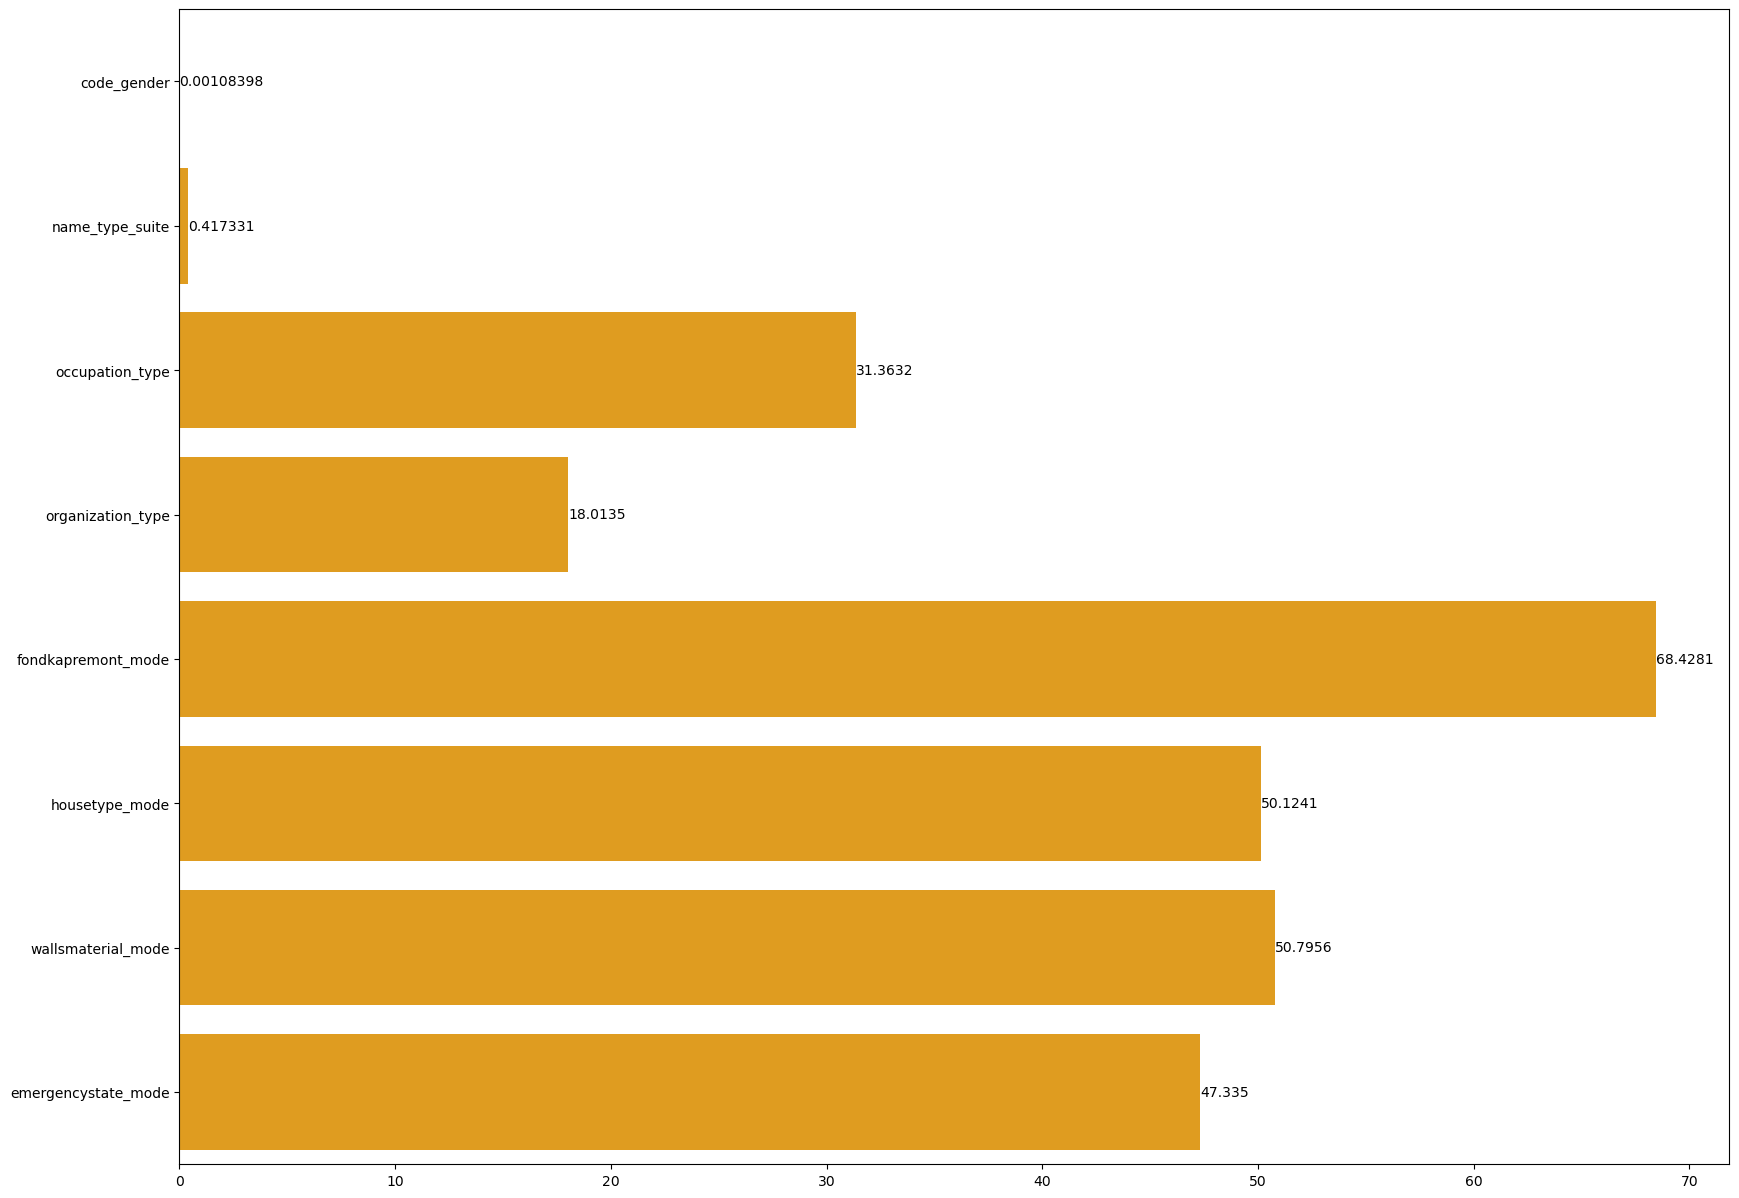

In [54]:
# Plot a bar plot of all the null valued categorical columns
plt.figure(figsize=(20, 15))
data = [(sum(raw_data[col].isna()) / len(raw_data)) * 100 for col in cat_null_cols]
ax = sns.barplot(x=data, y=cat_null_cols, orient="h", color='orange')
_ = ax.bar_label(ax.containers[0])

From the above graph its quite evident that the highest null value containing Categorical column is the fondkapremomt_mode. Lowest being code gender.

In [56]:
# Extract mumerical columns in a list
numerical_null_cols = [col for col in numerical_cols if raw_data[col].isna().any()]
numerical_null_cols

['amt_annuity',
 'amt_goods_price',
 'own_car_age',
 'cnt_fam_members',
 'ext_source_1',
 'ext_source_2',
 'ext_source_3',
 'apartments_avg',
 'basementarea_avg',
 'years_beginexpluatation_avg',
 'years_build_avg',
 'commonarea_avg',
 'elevators_avg',
 'entrances_avg',
 'floorsmax_avg',
 'floorsmin_avg',
 'landarea_avg',
 'livingapartments_avg',
 'livingarea_avg',
 'nonlivingapartments_avg',
 'nonlivingarea_avg',
 'apartments_mode',
 'basementarea_mode',
 'years_beginexpluatation_mode',
 'years_build_mode',
 'commonarea_mode',
 'elevators_mode',
 'entrances_mode',
 'floorsmax_mode',
 'floorsmin_mode',
 'landarea_mode',
 'livingapartments_mode',
 'livingarea_mode',
 'nonlivingapartments_mode',
 'nonlivingarea_mode',
 'apartments_medi',
 'basementarea_medi',
 'years_beginexpluatation_medi',
 'years_build_medi',
 'commonarea_medi',
 'elevators_medi',
 'entrances_medi',
 'floorsmax_medi',
 'floorsmin_medi',
 'landarea_medi',
 'livingapartments_medi',
 'livingarea_medi',
 'nonlivingapartmen

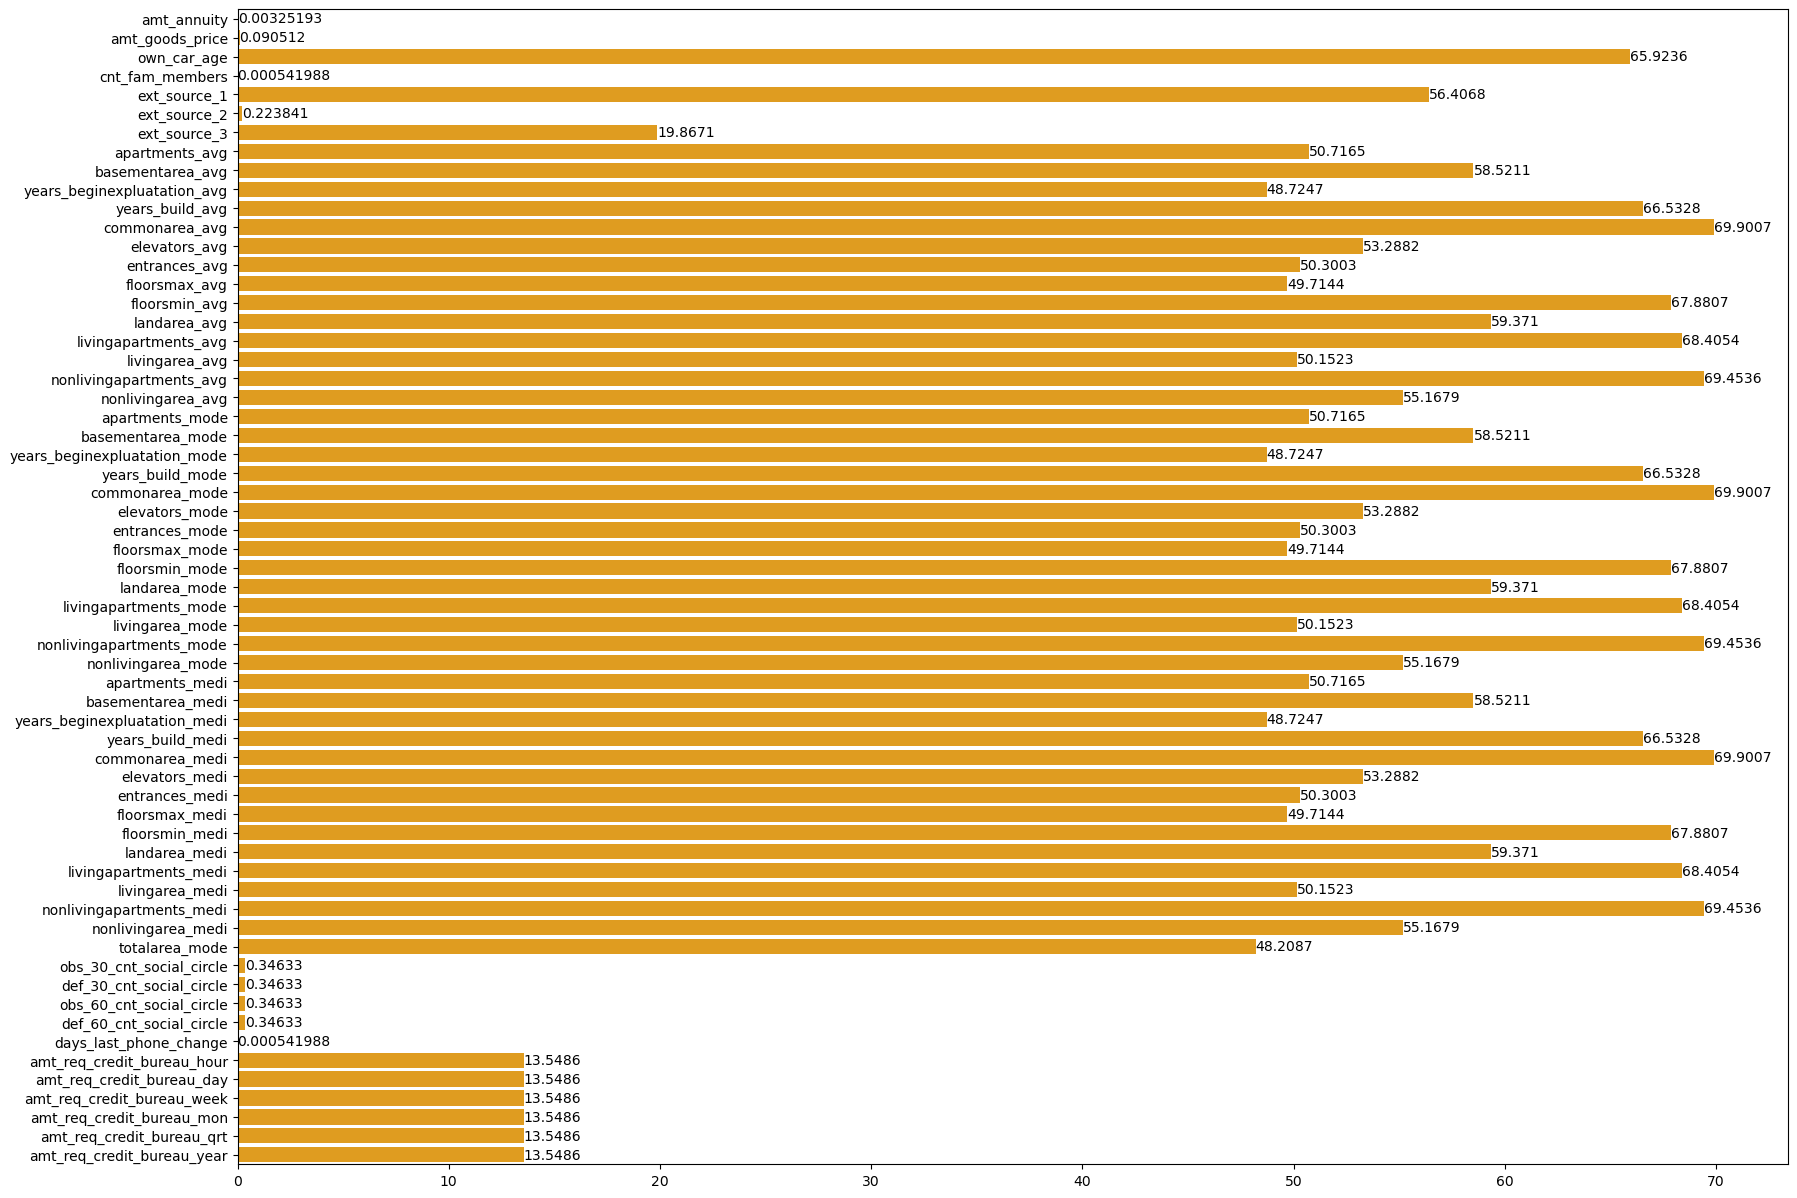

In [57]:
# plot all numerical columns holding null values in the Dataset
plt.figure(figsize=(20, 15))
data = [(sum(raw_data[col].isna()) / len(raw_data)) * 100 for col in numerical_null_cols]
ax = sns.barplot(x=data, y=numerical_null_cols, orient="h", color='orange')
_ = ax.bar_label(ax.containers[0])

All of the variables above have upto 70% missing values. I will be deleting 20% and more missing valued columns since we dont have any insider information to fill in this huge amount of null values. 

One of the variables above that caught my eye which has around 31% of missing values, which is Occupation type. This column can play an important role in determining if the applicant can default their payments or <br> not. Therefore, lets look at ways how to fill this column instead of deleting them.

In [59]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = raw_data['occupation_type'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

occupation_type
Accountants               5897
Cleaning staff            2766
Cooking staff             3621
Core staff               16492
Drivers                  11238
HR staff                   321
High skill tech staff     6859
IT staff                   314
Laborers                 32968
Low-skill Laborers        1223
Managers                 12780
Medicine staff            5130
Private service staff     1565
Realty agents              434
Sales staff              19351
Secretaries                787
Security staff            4074
Waiters/barmen staff       819
NaN                      57867
Name: count, dtype: int64
Sum of unique values including NaN: 184506


As you can see the majority of Nan values present is the highest among the rest of the data. It constitutes to around 57867 applicants. I wont delete the row or column for now. Lets create another category named 'Unknown' <br> for now and add these Nan values to the newly created category. Lets analyse this later in our EDA part of project to see if this needs deleting or not

In [61]:
# Creating a new category 'Unknown' to the 'Occupation_type' column
new_category = 'Unknown'  # Name for the new category

# Fill missing values in the 'occupation' column with the new category
raw_data['occupation_type'] = raw_data['occupation_type'].fillna(new_category)

Lets do a sanity check if this has been filled or not.

In [63]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = raw_data['occupation_type'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

occupation_type
Accountants               5897
Cleaning staff            2766
Cooking staff             3621
Core staff               16492
Drivers                  11238
HR staff                   321
High skill tech staff     6859
IT staff                   314
Laborers                 32968
Low-skill Laborers        1223
Managers                 12780
Medicine staff            5130
Private service staff     1565
Realty agents              434
Sales staff              19351
Secretaries                787
Security staff            4074
Unknown                  57867
Waiters/barmen staff       819
Name: count, dtype: int64
Sum of unique values including NaN: 184506


We have successfully filled in the Occupation type with Unknown category. Since this column plays an important role for the purpose of our project, I do prefer to keep this column for now instead of deleting the <br> whole column all together for now. 

Lets now plot the column Organization type to understand the figures better

C:\Users\luxy2\AppData\Local\Temp\ipykernel_22680\2989171337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=raw_data, x=raw_data[column],\
C:\Users\luxy2\AppData\Local\Temp\ipykernel_22680\2989171337.py:3: UserWarning: 
The palette list has fewer values (1) than needed (19) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=raw_data, x=raw_data[column],\
C:\Users\luxy2\AppData\Local\Temp\ipykernel_22680\2989171337.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


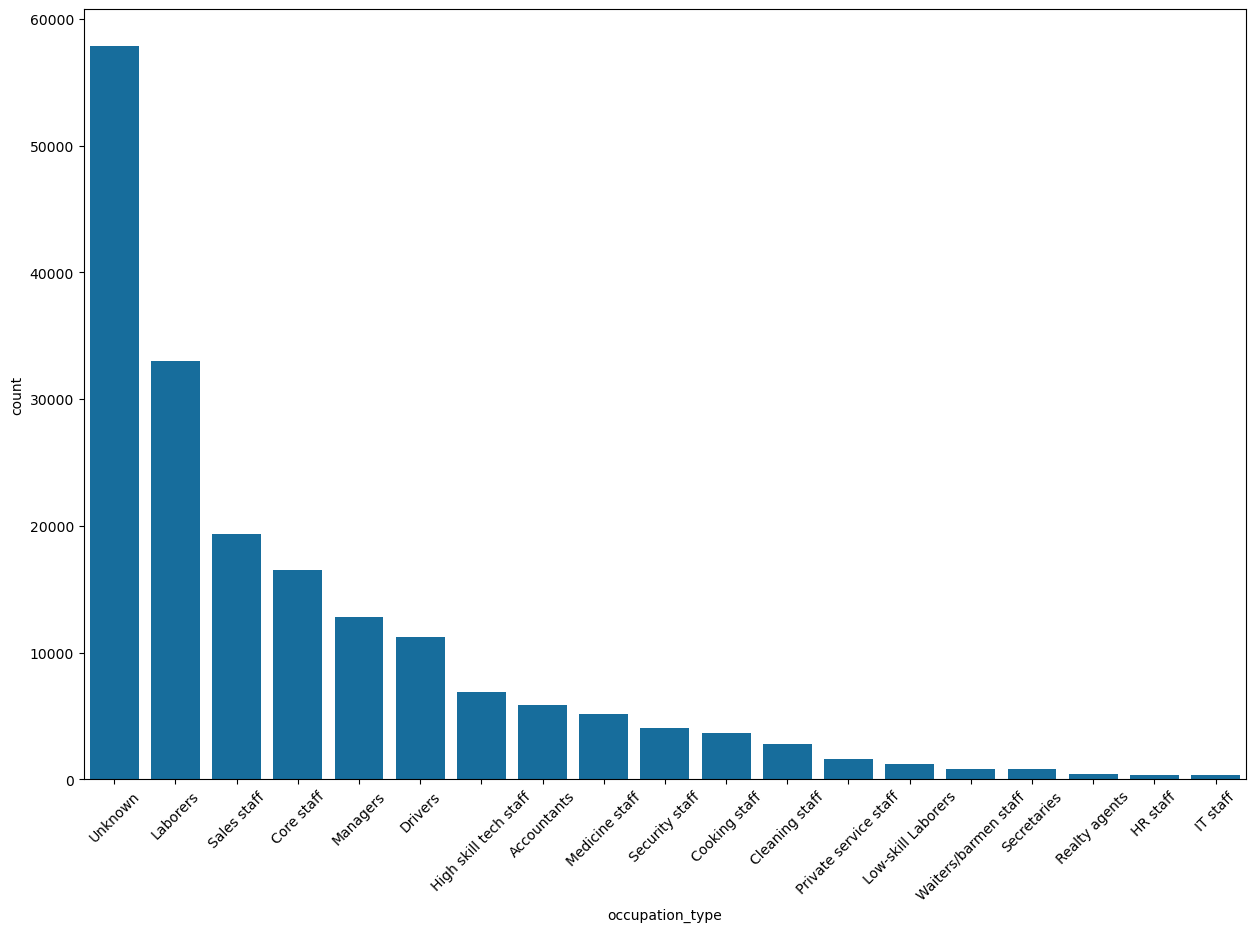

In [66]:
def bar_maker(raw_data,column):
    plt.figure(figsize=(15,10))
    ax = sns.countplot(data=raw_data, x=raw_data[column],\
          palette=[sns.color_palette("colorblind")[0]],order=raw_data[column].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

bar_maker(raw_data,'occupation_type')

The newly created category exhibits the highest in figures amonth the occupation type column. The second highest is laborers. We may have to look at this column later to see if we will have to remove the Unknown or not.

Becasue we have a large amount of missing value and we dont have any insider information to fill in the missing values. Therefore we can delete more than 20% of the missing value columns.

In [69]:
# Create a copy of the original dataframe
df_clean = raw_data.copy()

# Get the columns with more than 20% missing values
cols_to_drop = df_clean.columns[df_clean.isnull().sum() / len(df_clean) * 100 > 20]

# Drop the columns with more than 20% missing values
df_clean.drop(cols_to_drop, axis=1, inplace=True)

In [70]:
# Check the shape of the dataframe
df_clean.shape

(184506, 73)

We now have 184506 rows and 73 columns.

Lets run a ratio of the total number of rows dropped and the percentage of rows dropped.

In [72]:
# Extract the number and percentage of rows dropped
Number_of_rows_dropped = raw_data.shape[0] - df_clean.dropna().shape[0]
print("The total number of rows dropped is {}".format(Number_of_rows_dropped))
print("The percentage of rows dropped is {}%".format(np.round(Number_of_rows_dropped / len(df_clean) * 100, 2)))

The total number of rows dropped is 64306
The percentage of rows dropped is 34.85%


In [73]:
# To check the null values from 0 - 20%
(df_clean.isnull().sum() / df_clean.isnull().count()).sort_values(ascending = False).iloc[0: 20]

ext_source_3                  0.198671
organization_type             0.180135
amt_req_credit_bureau_year    0.135486
amt_req_credit_bureau_qrt     0.135486
amt_req_credit_bureau_mon     0.135486
amt_req_credit_bureau_week    0.135486
amt_req_credit_bureau_day     0.135486
amt_req_credit_bureau_hour    0.135486
name_type_suite               0.004173
obs_30_cnt_social_circle      0.003463
def_60_cnt_social_circle      0.003463
obs_60_cnt_social_circle      0.003463
def_30_cnt_social_circle      0.003463
ext_source_2                  0.002238
amt_goods_price               0.000905
amt_annuity                   0.000033
code_gender                   0.000011
days_last_phone_change        0.000005
cnt_fam_members               0.000005
flag_document_7               0.000000
dtype: float64

MMethodology:

Check the Percentage of Missing Values:

The initial step involves calculating the percentage of missing values in each column of the original DataFrame (raw_data). Using the isnull() method, The number of missing values for each column is then summed and divided by the total number of rows in the DataFrame to compute the percentage of missing values for each column.

Create a Copy of the Original DataFrame:

A copy of the original DataFrame raw_data is created and assigned to a new DataFrame called df_clean. This step ensures that the original DataFrame remains unchanged, and any modifications are applied to the new copy.

Identify Columns with More Than 20% Missing Values:

The code identifies the columns in the raw_data DataFrame that have more than 20% missing values. Boolean indexing and comparison are used to filter out the column names that meet this condition.

Drop Columns with More Than 20% Missing Values:

The identified columns with more than 20% missing values are dropped from the raw_data DataFrame using the drop() method and the cols_to_drop variable, which contains the column names to be removed. The axis=1 parameter specifies that columns are being dropped.

Check the Shape of the DataFrame:

After dropping the columns with more than 20% missing values, the shape of the resulting df_clean DataFrame is displayed. This shows the number of rows and columns in the cleaned DataFrame.

Findings:

The original DataFrame df had 184506 rows and a total of 122 columns.<br>
After data cleaning and removing columns with more than 20% missing values, the cleaned DataFrame df_clean now has 184506 rows and 73 columns.

This indicates that several columns in the original DataFrame had more than 20% missing values and were removed to handle missing data effectively. The cleaned DataFrame retains the same number of rows but has fewer columns, resulting in a more manageable and complete dataset for further analysis or modeling.

In addition to the deleted null values, lets now check the data types of the remaining null valued columns

In [76]:
# Find columns with null values and their data types
columns_with_null = [key for key, value in df_clean.items() if any(pd.isnull(value))]
dtypes_of_null_columns = {col: type(df_clean[col][0]) for col in columns_with_null}

print("Data types of columns with null values:")
print(dtypes_of_null_columns)

Data types of columns with null values:
{'code_gender': <class 'str'>, 'amt_annuity': <class 'numpy.float64'>, 'amt_goods_price': <class 'numpy.float64'>, 'name_type_suite': <class 'str'>, 'cnt_fam_members': <class 'numpy.float64'>, 'organization_type': <class 'str'>, 'ext_source_2': <class 'numpy.float64'>, 'ext_source_3': <class 'numpy.float64'>, 'obs_30_cnt_social_circle': <class 'numpy.float64'>, 'def_30_cnt_social_circle': <class 'numpy.float64'>, 'obs_60_cnt_social_circle': <class 'numpy.float64'>, 'def_60_cnt_social_circle': <class 'numpy.float64'>, 'days_last_phone_change': <class 'numpy.float64'>, 'amt_req_credit_bureau_hour': <class 'numpy.float64'>, 'amt_req_credit_bureau_day': <class 'numpy.float64'>, 'amt_req_credit_bureau_week': <class 'numpy.float64'>, 'amt_req_credit_bureau_mon': <class 'numpy.float64'>, 'amt_req_credit_bureau_qrt': <class 'numpy.float64'>, 'amt_req_credit_bureau_year': <class 'numpy.float64'>}


In [77]:
# Run the Summary of the column
df_clean['ext_source_3'].describe()

count    147850.000000
mean          0.510894
std           0.194894
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.893976
Name: ext_source_3, dtype: float64

In [78]:
# Run the median of the column
df_clean['ext_source_3'].median()

0.5352762504724826

C:\Users\luxy2\AppData\Local\Temp\ipykernel_22680\1060371900.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['ext_source_3'], kde=True)


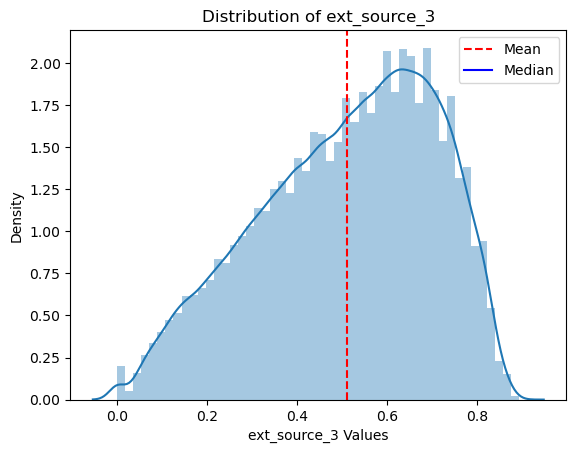

In [79]:
# Plot the distribution
sns.distplot(df_clean['ext_source_3'], kde=True)

# Calculate mean and median
mean_val = np.mean(df_clean['ext_source_3'])
median_val = np.median(df_clean['ext_source_3'])

# Plot mean and median as vertical lines
plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
plt.axvline(median_val, color='blue', linestyle='-', label='Median')

# Add title and labels
plt.title('Distribution of ext_source_3')
plt.xlabel('ext_source_3 Values')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

By filling the null values of the column 'ext_source_3' with the mean or median significantly changes the distribution of the variable, which suggests that the missing values <br>
are not missing at random (MAR). In such cases, blindly imputing missing values with mean or median could introduce bias or distort the original distribution of the data.

Therefore lets look at doing a Forward filling method to see if this does not change the distribution of the variable

In [81]:
# Forward fill missing values
df_clean['ext_source_3'] = df_clean['ext_source_3'].ffill()

C:\Users\luxy2\AppData\Local\Temp\ipykernel_22680\1060371900.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['ext_source_3'], kde=True)


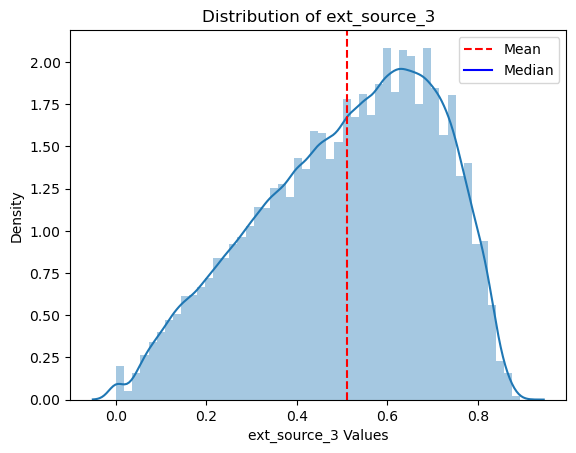

In [82]:
# Plot the distribution
sns.distplot(df_clean['ext_source_3'], kde=True)

# Calculate mean and median
mean_val = np.mean(df_clean['ext_source_3'])
median_val = np.median(df_clean['ext_source_3'])

# Plot mean and median as vertical lines
plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
plt.axvline(median_val, color='blue', linestyle='-', label='Median')

# Add title and labels
plt.title('Distribution of ext_source_3')
plt.xlabel('ext_source_3 Values')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

The distribution of the column has not changed. Lets check if the variable ext_source_3 has been filled in

In [84]:
# Extract Null values in the data
df_clean.isna().sum().sort_values()

sk_id_curr                         0
hour_appr_process_start            0
reg_region_not_live_region         0
reg_region_not_work_region         0
live_region_not_work_region        0
                               ...  
amt_req_credit_bureau_week     24998
amt_req_credit_bureau_mon      24998
amt_req_credit_bureau_qrt      24998
amt_req_credit_bureau_year     24998
organization_type              33236
Length: 73, dtype: int64

The majority of the missing values has been filled in except for one value. Since 'ffill' fills missing values with the last known non-null value in the column, propagating forward. 

Lets check if that one missing value is the first value of the column

In [86]:
# Extract unique vakues of the column
df_clean['ext_source_3'].unique()

array([           nan, 6.86382335e-01, 5.40654450e-01, 3.37672722e-01,
       8.19317692e-01, 8.06149281e-01, 4.92060094e-01, 6.61023539e-01,
       7.03203305e-01, 1.00803706e-01, 7.92264474e-01, 3.63945239e-01,
       2.60855914e-01, 4.34733249e-01, 5.91976618e-01, 3.96219572e-01,
       6.04112600e-01, 3.17031779e-01, 6.21226338e-01, 4.50747282e-01,
       4.32961667e-01, 5.81483706e-01, 7.62335618e-01, 3.53987608e-01,
       3.00107757e-01, 3.75711010e-01, 5.01075160e-01, 6.51260219e-01,
       2.44516392e-01, 3.84206813e-01, 4.79448981e-01, 2.62248971e-01,
       1.96333966e-01, 2.04422625e-01, 6.22922000e-01, 5.29889834e-01,
       7.38019620e-01, 6.59405532e-01, 3.39287700e-01, 3.57293268e-01,
       2.91097380e-01, 5.62060483e-01, 3.79100485e-01, 5.79727423e-01,
       3.65616507e-01, 7.53067392e-01, 3.45784802e-01, 6.47976860e-01,
       7.13631400e-01, 4.25892898e-01, 5.42445144e-01, 2.52598698e-01,
       5.76208836e-01, 7.16570245e-01, 7.12155155e-01, 6.24614658e-01,
      

This is the first missing value, therefore ffill will not work. Let try bfill (backward filling method) for the one Nan value

In [88]:
# Backward fill missing values
df_clean['ext_source_3'] = df_clean['ext_source_3'].bfill()

Now lets look at the distribution of the column ext_source_3

C:\Users\luxy2\AppData\Local\Temp\ipykernel_22680\1060371900.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['ext_source_3'], kde=True)


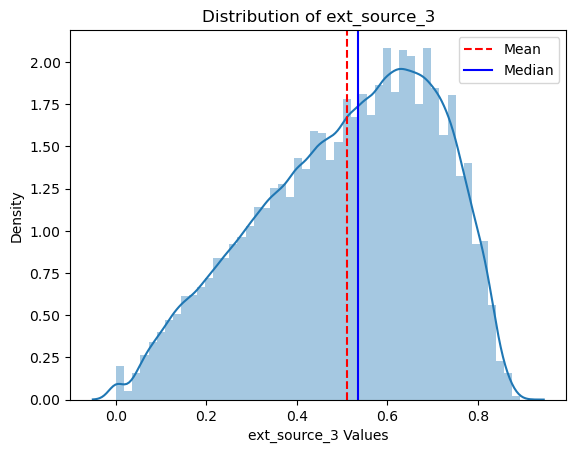

In [90]:
# Plot the distribution
sns.distplot(df_clean['ext_source_3'], kde=True)

# Calculate mean and median
mean_val = np.mean(df_clean['ext_source_3'])
median_val = np.median(df_clean['ext_source_3'])

# Plot mean and median as vertical lines
plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
plt.axvline(median_val, color='blue', linestyle='-', label='Median')

# Add title and labels
plt.title('Distribution of ext_source_3')
plt.xlabel('ext_source_3 Values')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()

The distribution has not changed and now lets look at if the Nan values have all been filled in. 

In [92]:
# Find all the null values in the Dataset
df_clean.isna().sum().sort_values()

sk_id_curr                         0
reg_region_not_live_region         0
reg_region_not_work_region         0
live_region_not_work_region        0
reg_city_not_live_city             0
                               ...  
amt_req_credit_bureau_week     24998
amt_req_credit_bureau_mon      24998
amt_req_credit_bureau_qrt      24998
amt_req_credit_bureau_year     24998
organization_type              33236
Length: 73, dtype: int64

The ext_source_3 has all been filled in without disturbing the distribution of the variable. Lets look at our next categorical variable, 'name_type_suite'

In [94]:
# To extract the value counts of the variable name_type_suite
value_counts_with_nan = df_clean['name_type_suite'].value_counts(dropna=False)

# To print the count of unique values including NaN
print(value_counts_with_nan)

# To sum up all the unique values including NaN
unique_sum_with_nan = value_counts_with_nan.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan)

name_type_suite
Unaccompanied      149059
Family              24044
Spouse, partner      6869
Children             1982
Other_B              1081
NaN                   770
Other_A               528
Group of people       173
Name: count, dtype: int64
Sum of unique values including NaN: 184506


There are a huge number of Unaccaopanied Values in the column and there are 770 Nan values. Lets look at the summary stats of the variable and the distribution of the column

In [96]:
# To fund the summary of the variable
df_clean['name_type_suite'].describe()

count            183736
unique                7
top       Unaccompanied
freq             149059
Name: name_type_suite, dtype: object

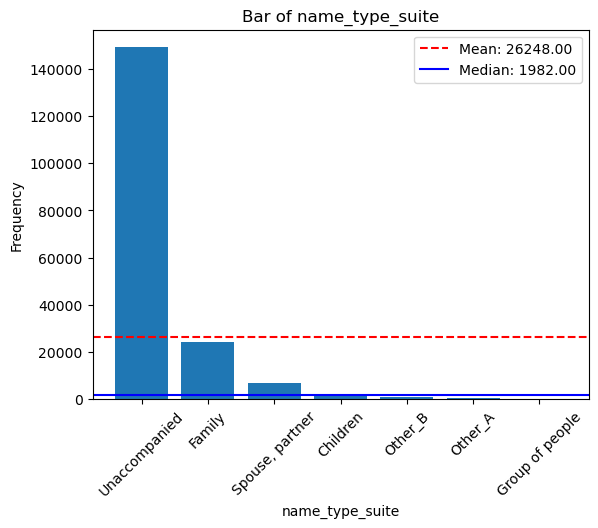

In [97]:
# Assuming 'object_column' is the object data column
name_type_suite_column = 'name_type_suite'

# Count the frequency of each category
category_counts = df_clean[name_type_suite_column].value_counts()

# Plot histogram
plt.bar(category_counts.index, category_counts.values)

# Calculate mean and median
mean_val = category_counts.mean()
median_val = category_counts.median()

# Plot mean and median as horizontal lines
plt.axhline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(median_val, color='blue', linestyle='-', label=f'Median: {median_val:.2f}')

# Add labels and title
plt.xlabel(name_type_suite_column)
plt.ylabel('Frequency')
plt.title(f'Bar of {name_type_suite_column}')

# Add legend
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

Lets safely assume that we could fill in the Nan values with Unaccompanied as thats the largest number in the column present and we shall check the distribution of the column later

In [99]:
# Replace null values with a custom value like 'Unaccompanied'
df_clean['name_type_suite'] = df_clean['name_type_suite'].fillna('Unaccompanied')

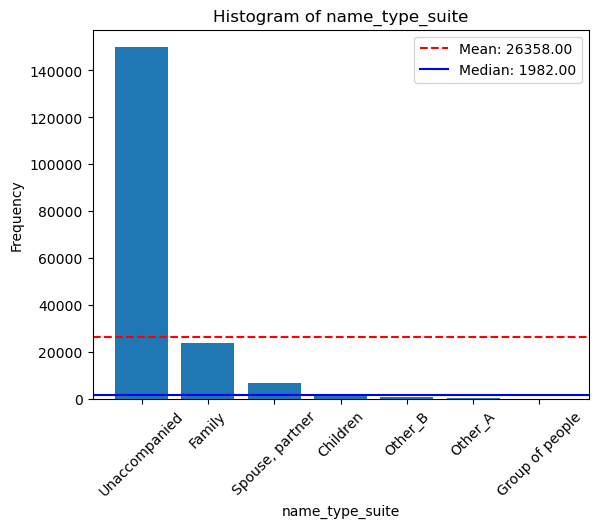

In [100]:
# Assuming 'object_column' is the object data column
name_type_suite_column = 'name_type_suite'

# Count the frequency of each category
category_counts = df_clean[name_type_suite_column].value_counts()

# Plot histogram
plt.bar(category_counts.index, category_counts.values)

# Calculate mean and median
mean_val = category_counts.mean()
median_val = category_counts.median()

# Plot mean and median as horizontal lines
plt.axhline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(median_val, color='blue', linestyle='-', label=f'Median: {median_val:.2f}')

# Add labels and title
plt.xlabel(name_type_suite_column)
plt.ylabel('Frequency')
plt.title(f'Histogram of {name_type_suite_column}')

# Add legend
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

We cant see any visible changes in the distribution apart from the Mean going slightly up than the previous figure from 26248 to 26358 due to the slight increase in the total number of Unaccompanied section of the column. Lets look at the sum of unique values present.

In [102]:
# To extract the value counts of the variable name_type_suite
value_counts_with_nan = df_clean['name_type_suite'].value_counts(dropna=False)

# To print the count of unique values including NaN
print(value_counts_with_nan)

# To sum up all the unique values including NaN
unique_sum_with_nan = value_counts_with_nan.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan)

name_type_suite
Unaccompanied      149829
Family              24044
Spouse, partner      6869
Children             1982
Other_B              1081
Other_A               528
Group of people       173
Name: count, dtype: int64
Sum of unique values including NaN: 184506


The filling was successful. Lets now look at our rest of the Nan values

In [104]:
# To find anu null values in the Dataset
df_clean.isna().sum().sort_values()

sk_id_curr                         0
reg_region_not_live_region         0
reg_region_not_work_region         0
live_region_not_work_region        0
reg_city_not_live_city             0
                               ...  
amt_req_credit_bureau_day      24998
amt_req_credit_bureau_week     24998
amt_req_credit_bureau_mon      24998
amt_req_credit_bureau_qrt      24998
organization_type              33236
Length: 73, dtype: int64

Apart from the ones that has very minute number of Nan values such as amt_annuity, code_gender, cnt_fam_members and days_last_phone_change, 

Lets look the rest of the numerical columns except organization type

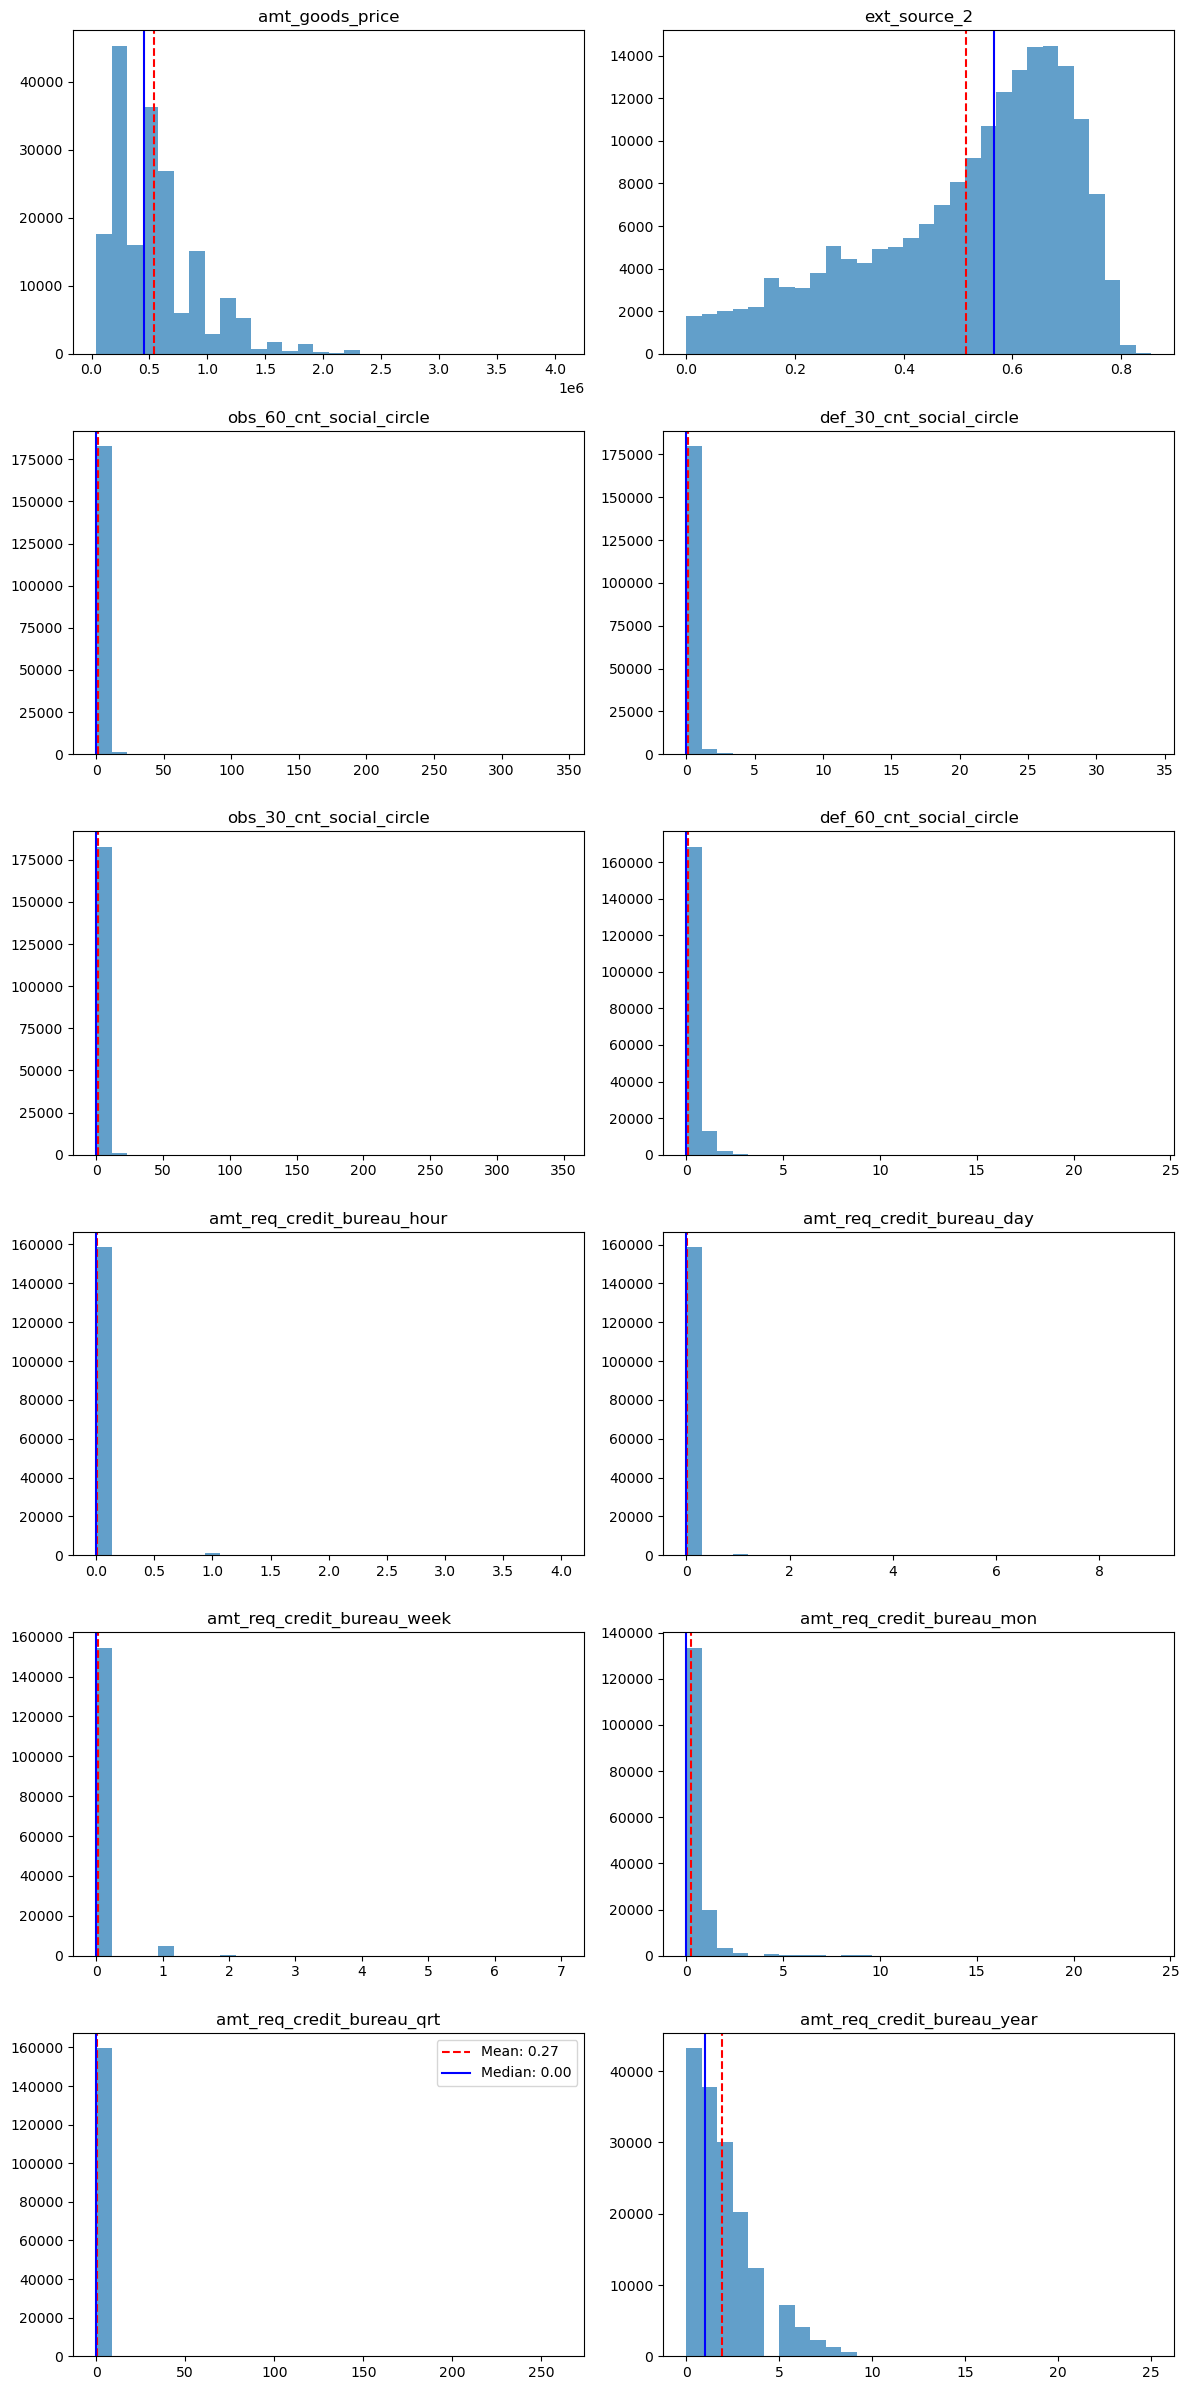

In [106]:
# Select columns with null values
null_columns = ['amt_goods_price',
                'ext_source_2', 'obs_60_cnt_social_circle', 'def_30_cnt_social_circle', 
                'obs_30_cnt_social_circle', 'def_60_cnt_social_circle', 'amt_req_credit_bureau_hour',
                'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week', 'amt_req_credit_bureau_mon',
                'amt_req_credit_bureau_qrt', 'amt_req_credit_bureau_year']

# Determine number of subplots
num_plots = len(null_columns)
num_rows = num_plots // 2 + (num_plots % 2)  # Adjust for odd number of plots

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows*4))

# Plot histograms for columns with null values
for i, col in enumerate(null_columns):
    row_idx = i // 2
    col_idx = i % 2
    
    # Plot histogram
    axes[row_idx][col_idx].hist(df_clean[col].dropna(), bins=30, alpha=0.7)
    axes[row_idx][col_idx].set_title(col)
    
    # Calculate mean and median
    mean_val = np.mean(df_clean[col].dropna())
    median_val = np.median(df_clean[col].dropna())
    
    # Plot mean and median as vertical lines
    axes[row_idx][col_idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[row_idx][col_idx].axvline(median_val, color='blue', linestyle='-', label=f'Median: {median_val:.2f}')

# Adjust layout
if num_plots % 2 != 0:
    fig.delaxes(axes[-1][-1])  # Remove last subplot if it's empty
    axes[-1][-2].set_xlabel('Values')  # Add x-axis label to the last subplot

# Add legend
axes[-1][-2].legend(loc='upper right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Lets safely assume that Forward filling method, should not disturb the distribution of the columns and go ahead with the filling of the Nan values

In [108]:
# Forward fill missing values
df_clean['ext_source_2'] = df_clean['ext_source_2'].ffill()

In [109]:
# Forward fill missing values
df_clean['amt_req_credit_bureau_year'] = df_clean['amt_req_credit_bureau_year'].ffill()

In [110]:
# Forward fill missing values
df_clean['amt_req_credit_bureau_qrt'] = df_clean['amt_req_credit_bureau_qrt'].ffill()

In [111]:
# Forward fill missing values
df_clean['amt_req_credit_bureau_mon'] = df_clean['amt_req_credit_bureau_mon'].ffill()

In [112]:
# Forward fill missing values
df_clean['amt_req_credit_bureau_week'] = df_clean['amt_req_credit_bureau_week'].ffill()

In [113]:
# Forward fill missing values
df_clean['amt_req_credit_bureau_day'] = df_clean['amt_req_credit_bureau_day'].ffill()

In [114]:
# Forward fill missing values
df_clean['amt_req_credit_bureau_hour'] = df_clean['amt_req_credit_bureau_hour'].ffill()

In [115]:
# Forward fill missing values
df_clean['def_60_cnt_social_circle'] = df_clean['def_60_cnt_social_circle'].ffill()

In [116]:
# Forward fill missing values
df_clean['obs_60_cnt_social_circle'] = df_clean['obs_60_cnt_social_circle'].ffill()

In [117]:
# Forward fill missing values
df_clean['def_30_cnt_social_circle'] = df_clean['def_30_cnt_social_circle'].ffill()

In [118]:
# Forward fill missing values
df_clean['obs_30_cnt_social_circle'] = df_clean['obs_30_cnt_social_circle'].ffill()

In [119]:
# Forward fill missing values
df_clean['obs_30_cnt_social_circle'] = df_clean['obs_30_cnt_social_circle'].ffill()

In [120]:
# Forward fill missing values
df_clean['amt_goods_price'] = df_clean['amt_goods_price'].ffill()

Now lets look at if the ffill has successfully filled in the Nan values above

In [122]:
# To fiind the total null values in the dataset
df_clean.isna().sum().sort_values()

sk_id_curr                    0
flag_document_8               0
flag_document_7               0
flag_document_6               0
flag_document_5               0
                          ...  
cnt_fam_members               1
days_last_phone_change        1
code_gender                   2
amt_annuity                   6
organization_type         33236
Length: 73, dtype: int64

Apart from the columns that we left behind, rest of the missing values have been filled. Lets check at their distribution once again.

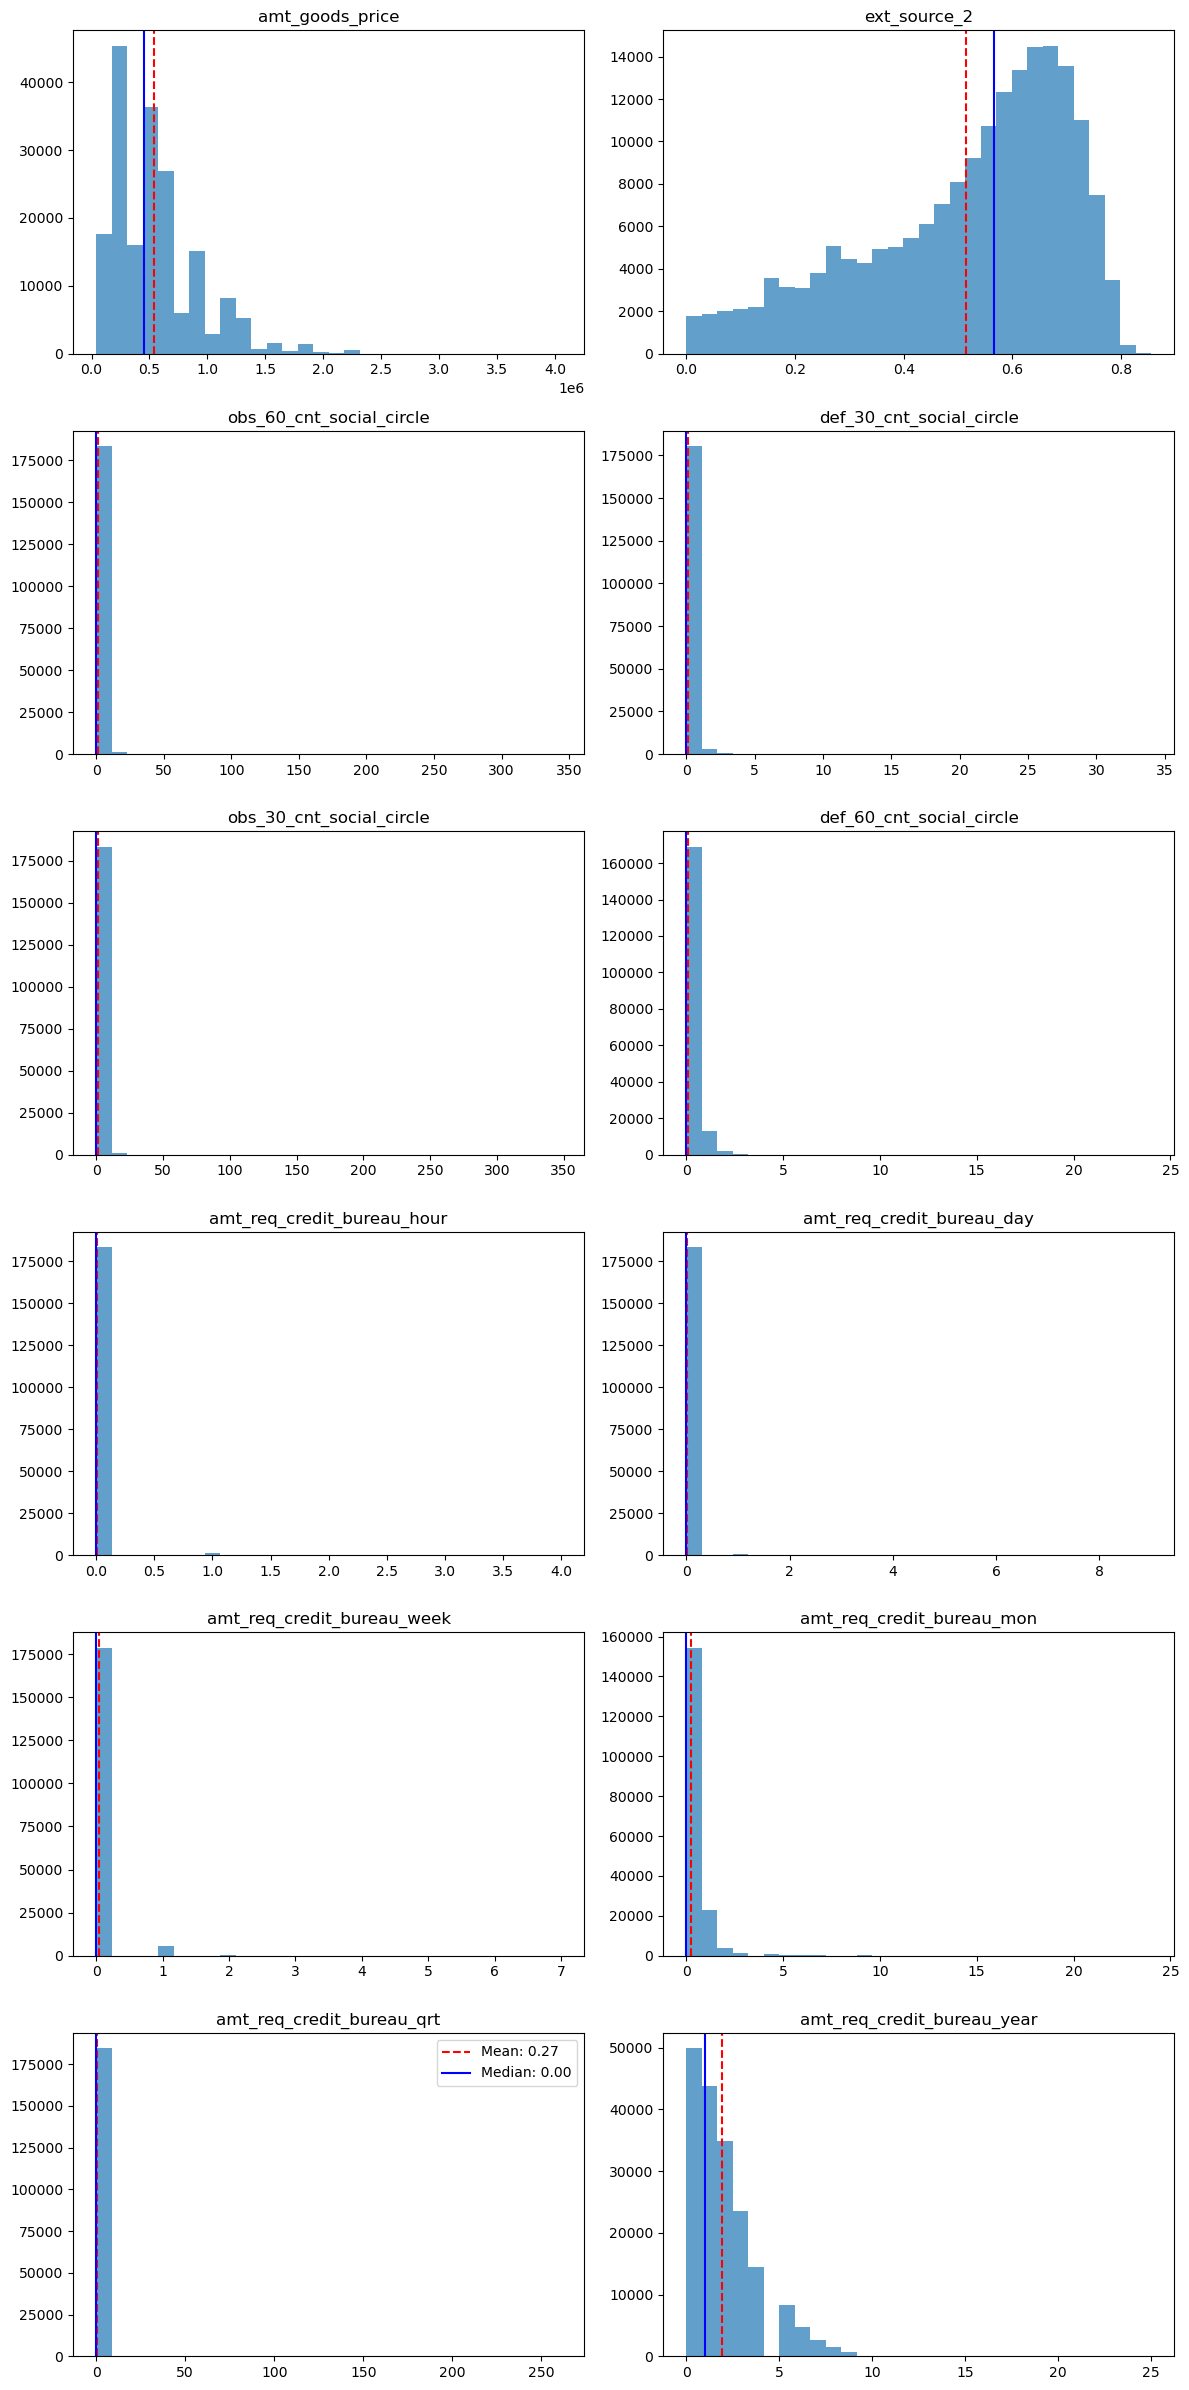

In [124]:
# Select columns with null values
null_columns = ['amt_goods_price',
                'ext_source_2', 'obs_60_cnt_social_circle', 'def_30_cnt_social_circle', 
                'obs_30_cnt_social_circle', 'def_60_cnt_social_circle', 'amt_req_credit_bureau_hour',
                'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week', 'amt_req_credit_bureau_mon',
                'amt_req_credit_bureau_qrt', 'amt_req_credit_bureau_year']

# Determine number of subplots
num_plots = len(null_columns)
num_rows = num_plots // 2 + (num_plots % 2)  # Adjust for odd number of plots

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows*4))

# Plot histograms for columns with null values
for i, col in enumerate(null_columns):
    row_idx = i // 2
    col_idx = i % 2
    
    # Plot histogram
    axes[row_idx][col_idx].hist(df_clean[col].dropna(), bins=30, alpha=0.7)
    axes[row_idx][col_idx].set_title(col)
    
    # Calculate mean and median
    mean_val = np.mean(df_clean[col].dropna())
    median_val = np.median(df_clean[col].dropna())
    
    # Plot mean and median as vertical lines
    axes[row_idx][col_idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[row_idx][col_idx].axvline(median_val, color='blue', linestyle='-', label=f'Median: {median_val:.2f}')

# Adjust layout
if num_plots % 2 != 0:
    fig.delaxes(axes[-1][-1])  # Remove last subplot if it's empty
    axes[-1][-2].set_xlabel('Values')  # Add x-axis label to the last subplot

# Add legend
axes[-1][-2].legend(loc='upper right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Once again, there is no visible changes in the distribution of the variable, Therefore the filling has been successful.

In [126]:
# Summary statistics for 'amt_annuity', 'cnt_fam_members', 'days_last_phone_change' columns
Null_Columns = df_clean[['amt_annuity', 'cnt_fam_members', 'days_last_phone_change'
           ]].describe()
print("Summary Statistics for Binary Null Value Columns:")
print(Null_Columns)

Summary Statistics for Binary Null Value Columns:
         amt_annuity  cnt_fam_members  days_last_phone_change
count  184500.000000    184505.000000           184505.000000
mean    27114.455805         2.152706             -961.984591
std     14468.652072         0.907545              827.403575
min      1615.500000         1.000000            -4185.000000
25%     16555.500000         2.000000            -1569.000000
50%     24939.000000         2.000000             -756.000000
75%     34596.000000         3.000000             -272.000000
max    258025.500000        20.000000                0.000000


Since the Total number of missing values in the above three columns are 6,1 and 1, lets go ahead and fill in the missing values with mean.

In [128]:
cnt_fam_members_mean=df_clean['cnt_fam_members'].mean()

df_clean['cnt_fam_members']=df_clean['cnt_fam_members'].fillna(cnt_fam_members_mean)

In [129]:
amt_annuity_mean=df_clean['amt_annuity'].mean()

df_clean['amt_annuity']=df_clean['amt_annuity'].fillna(amt_annuity_mean)

In [130]:
days_last_phone_change_mean=df_clean['days_last_phone_change'].mean()

df_clean['days_last_phone_change']=df_clean['days_last_phone_change'].fillna(days_last_phone_change_mean)

In [131]:
df_clean.isna().sum().sort_values()

sk_id_curr               0
flag_document_8          0
flag_document_7          0
flag_document_6          0
flag_document_5          0
                     ...  
flag_mobil               0
occupation_type          0
target                   0
code_gender              2
organization_type    33236
Length: 73, dtype: int64

The filling was successful, Now lets look at our remaining two categorical columns. Organization_type, lets look at this column in detail.

In [133]:
# To extract the value counts of the variable organization type
value_counts_with_nan = df_clean['organization_type'].value_counts(dropna=False)

# To print the count of unique values including NaN
print(value_counts_with_nan)

# To sum up all the unique values including NaN
unique_sum_with_nan = value_counts_with_nan.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan)

organization_type
Business Entity Type 3    40943
NaN                       33236
Self-employed             22877
Other                      9961
Medicine                   6752
Business Entity Type 2     6332
Government                 6225
School                     5303
Trade: type 7              4692
Kindergarten               4150
Construction               4075
Business Entity Type 1     3529
Transport: type 4          3228
Trade: type 3              2093
Industry: type 3           2011
Security                   1993
Industry: type 9           1983
Housing                    1786
Industry: type 11          1613
Military                   1548
Bank                       1493
Agriculture                1439
Police                     1406
Transport: type 2          1347
Postal                     1311
Security Ministries        1205
Trade: type 2              1200
Restaurant                 1094
Services                    944
University                  793
Industry: type 7      

From the above results, we can see there are a long list of organization type. There is a section named 'other' and lets go ahead and fill in the Nan values with the value name <br>
'other', Before that lets check the distribution of the variable. 

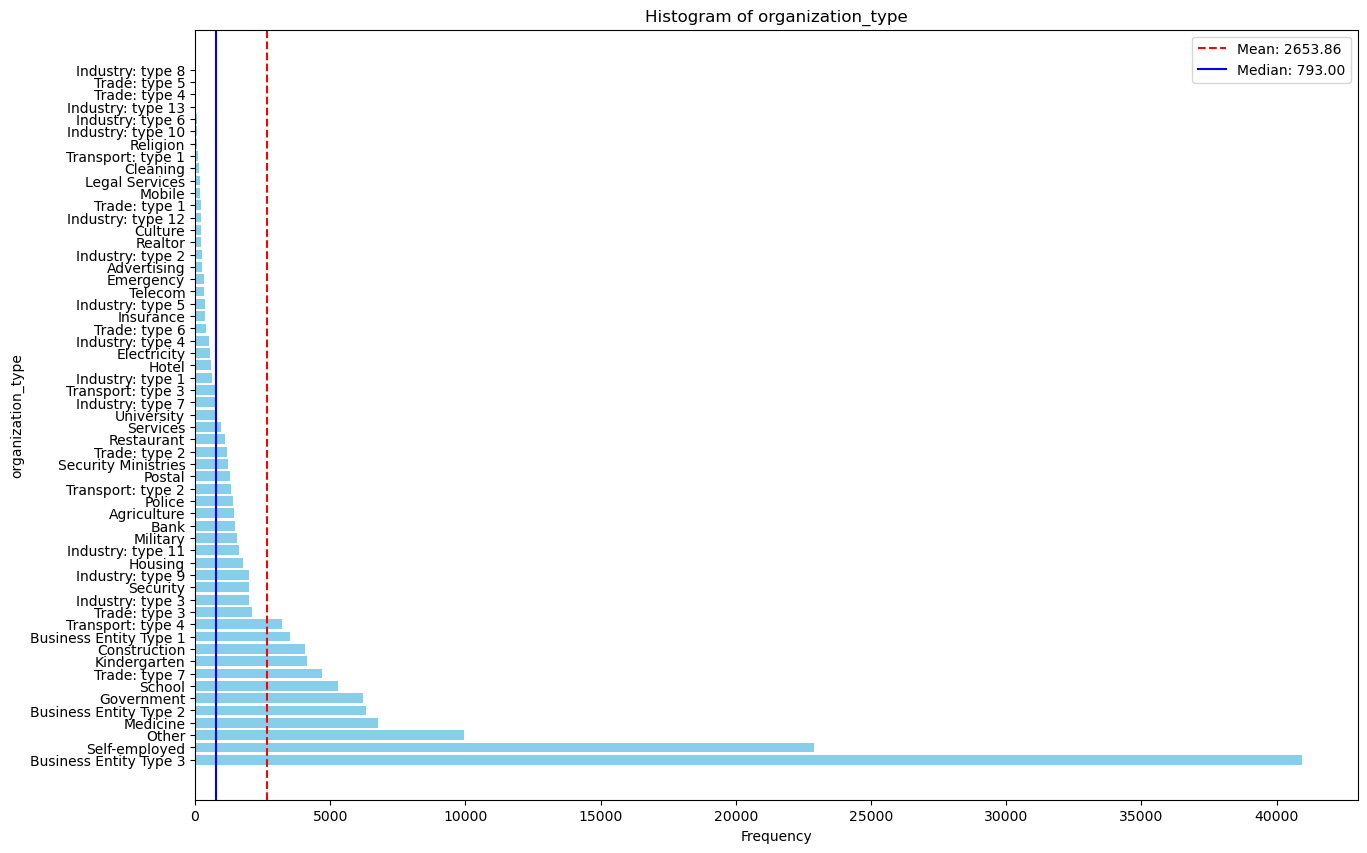

In [135]:
# Assuming 'object_column' is the object data column
organization_type_column = 'organization_type'

# Count the frequency of each category
category_counts = df_clean[organization_type_column].value_counts()

# Plot histogram horizontally
plt.figure(figsize=(15, 10))  # Adjust figsize as needed
plt.barh(category_counts.index, category_counts.values, color='skyblue')

# Calculate mean and median
mean_val = category_counts.mean()
median_val = category_counts.median()

# Plot mean and median as vertical lines
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='blue', linestyle='-', label=f'Median: {median_val:.2f}')

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel(organization_type_column)
plt.title(f'Histogram of {organization_type_column}')

# Add legend
plt.legend()

# Show plot
plt.show()

Now lets go ahead and fill in the column with the value name 'other'

In [137]:
# Replace null values with a custom value like 'other'
df_clean['organization_type'] = df_clean['organization_type'].fillna('Other')

In [138]:
# To extract the value counts of the variableorganization type
value_counts_with_nan = df_clean['organization_type'].value_counts(dropna=False)

# To print the count of unique values including NaN
print(value_counts_with_nan)

# To sum up all the unique values including NaN
unique_sum_with_nan = value_counts_with_nan.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan)

organization_type
Other                     43197
Business Entity Type 3    40943
Self-employed             22877
Medicine                   6752
Business Entity Type 2     6332
Government                 6225
School                     5303
Trade: type 7              4692
Kindergarten               4150
Construction               4075
Business Entity Type 1     3529
Transport: type 4          3228
Trade: type 3              2093
Industry: type 3           2011
Security                   1993
Industry: type 9           1983
Housing                    1786
Industry: type 11          1613
Military                   1548
Bank                       1493
Agriculture                1439
Police                     1406
Transport: type 2          1347
Postal                     1311
Security Ministries        1205
Trade: type 2              1200
Restaurant                 1094
Services                    944
University                  793
Industry: type 7            777
Transport: type 3     

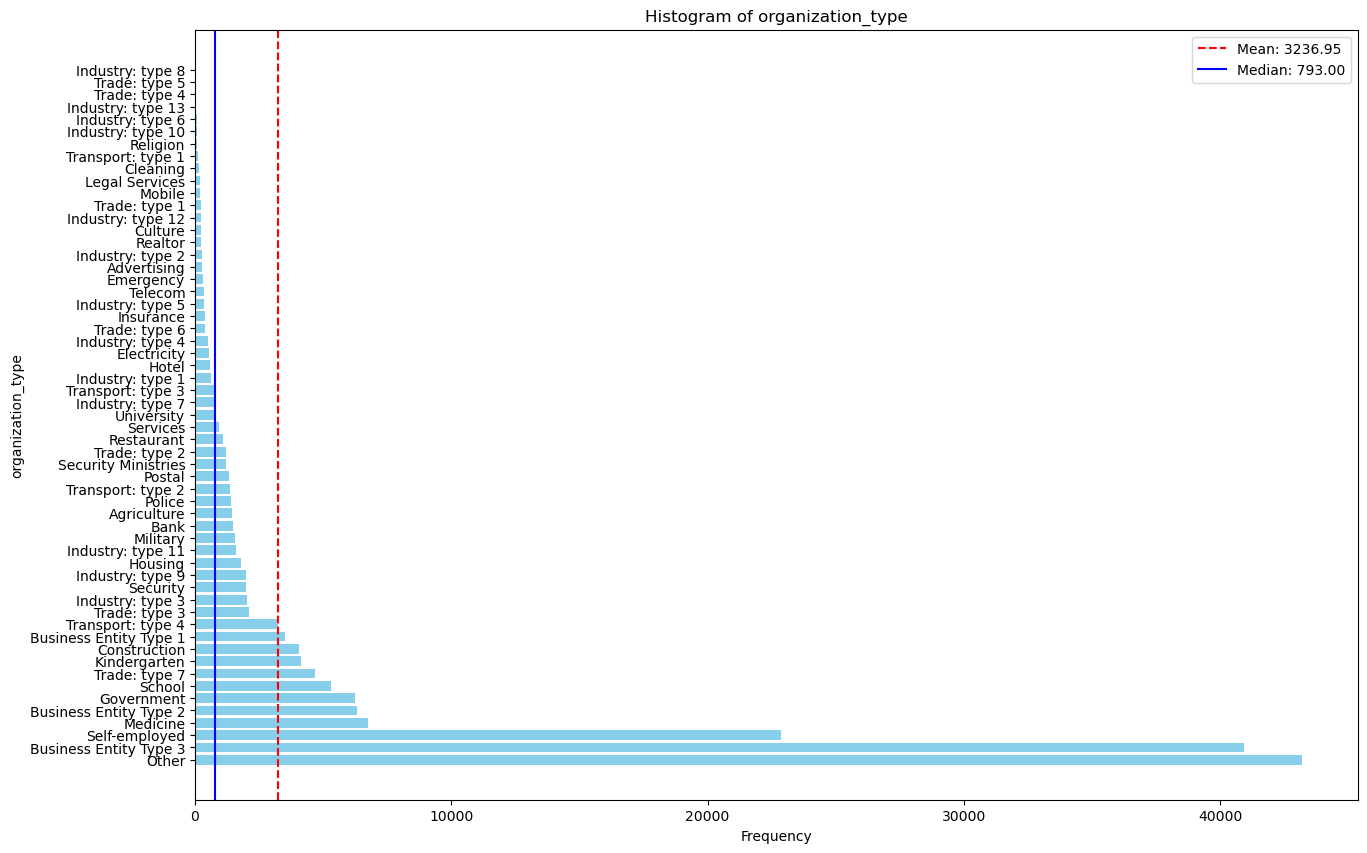

In [139]:
# Assuming 'object_column' is the object data column
organization_type_column = 'organization_type'

# Count the frequency of each category
category_counts = df_clean[organization_type_column].value_counts()

# Plot histogram horizontally
plt.figure(figsize=(15, 10))  # Adjust figsize as needed
plt.barh(category_counts.index, category_counts.values, color='skyblue')

# Calculate mean and median
mean_val = category_counts.mean()
median_val = category_counts.median()

# Plot mean and median as vertical lines
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='blue', linestyle='-', label=f'Median: {median_val:.2f}')

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel(organization_type_column)
plt.title(f'Histogram of {organization_type_column}')

# Add legend
plt.legend()

# Show plot
plt.show()

The 'Other' has surpassed the Business Entity Type 3 value. The mean has a slight increase and so has the median. Lets keep this column for now and analyse if this column is required <br>
further ahead in the project

Now lets look at our last Missing Valued Column.

In [141]:
# To find the missing values in the Dataset
df_clean.isna().sum().sort_values()

sk_id_curr         0
flag_document_7    0
flag_document_6    0
flag_document_5    0
flag_document_4    0
                  ..
flag_emp_phone     0
flag_mobil         0
occupation_type    0
target             0
code_gender        2
Length: 73, dtype: int64

In [142]:
# To extract the value counts of the variable code gender
value_counts_with_nan = df_clean['code_gender'].value_counts(dropna=False)

# To print the count of unique values including NaN
print(value_counts_with_nan)

# To sum up all the unique values including NaN
unique_sum_with_nan = value_counts_with_nan.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan)

code_gender
F      121357
M       63147
NaN         2
Name: count, dtype: int64
Sum of unique values including NaN: 184506


Since there are only 2 missing values, lets fill it with the most frequent value present in the column, which is the female.

In [144]:
# Fill missing values with the most frequent value (mode) in the column
most_frequent_value = df_clean['code_gender'].mode()[0]
df_clean['code_gender'] = df_clean['code_gender'].fillna(most_frequent_value)

# Verify that missing values are filled
print(df_clean['code_gender'].value_counts())

code_gender
F    121359
M     63147
Name: count, dtype: int64


Lets check if the all the columns have now been filled in and dont have any null values

In [146]:
# To check null values in the Dataset
df_clean.isna().sum().sort_values()

sk_id_curr                0
flag_document_7           0
flag_document_6           0
flag_document_5           0
flag_document_4           0
                         ..
flag_emp_phone            0
flag_mobil                0
days_id_publish           0
reg_city_not_live_city    0
target                    0
Length: 73, dtype: int64

As you can see there are no null values present in the data, lets check the shape of the dataset

In [148]:
# Shape of the Dataset
df_clean.shape

(184506, 73)

The total rows are the same at 184506 and 73 columns

In [150]:
# summary that includes the number of non-null values and data types of each column 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184506 entries, 0 to 184505
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sk_id_curr                   184506 non-null  int64  
 1   name_contract_type           184506 non-null  object 
 2   code_gender                  184506 non-null  object 
 3   flag_own_car                 184506 non-null  object 
 4   flag_own_realty              184506 non-null  object 
 5   cnt_children                 184506 non-null  int64  
 6   amt_income_total             184506 non-null  float64
 7   amt_credit                   184506 non-null  float64
 8   amt_annuity                  184506 non-null  float64
 9   amt_goods_price              184506 non-null  float64
 10  name_type_suite              184506 non-null  object 
 11  name_income_type             184506 non-null  object 
 12  name_education_type          184506 non-null  object 
 13 

We now have 20 Float, 41 Int and 11 Object Datatypes with no null. We may require further data cleaning, but lets move on to the EDA part of the project to study the variables in depth, Before moving on to the next section of our project lets <br> go ahead and convert the 20 Floats to Int for easy interpretation of data.

# Part 2 - <ins> Preliminary Exploratory Data Analysis 1 <a id='preliminaryeda'></a> <ins>

## STUDY OF INDIVIDUAL VARIABLES <a id='Individualvariables'></a> <ins>

In this section lets read each and every column and see if its relatively needed in the dataset. Whether there are any outliers and requires further deletion of the column itself or rows associated with it. 

After further analysis in this part of the project, we may be able to understand if further cleaning is required or not based on their relationship study with a dependant variable or other similar kind of variables


#### REGION_POPULATION_RELATIVE - Normalized population of region where client lives (higher number means the client lives in more populated region) - This is a Float column which is a decimal below one. Converting to integer converts all the decimals to 0

In [156]:
df_clean["region_population_relative"].describe()

count    184506.000000
mean          0.020868
std           0.013818
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: region_population_relative, dtype: float64

In [157]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['region_population_relative'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

region_population_relative
0.000290       1
0.000533      24
0.000938      14
0.001276     336
0.001333     148
            ... 
0.031329    6838
0.032561    4006
0.035792    9920
0.046220    8082
0.072508    5009
Name: count, Length: 81, dtype: int64
Sum of unique values including NaN: 184506


All of the scores are starting with a decimal so I believe there has been some math behind the score that was derived. The highest score being the 0.072508

In [159]:
# List of columns to exclude from conversion
exclude_columns = ['region_population_relative', 'ext_source_2', 'ext_source_3']

# Loop through each float column in the DataFrame
for column in df_clean.select_dtypes(include=['float']):
    # Check if the column is not in the exclude list
    if column not in exclude_columns:
        # Convert the column to integers
        df_clean[column] = df_clean[column].astype(int)

In [160]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184506 entries, 0 to 184505
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sk_id_curr                   184506 non-null  int64  
 1   name_contract_type           184506 non-null  object 
 2   code_gender                  184506 non-null  object 
 3   flag_own_car                 184506 non-null  object 
 4   flag_own_realty              184506 non-null  object 
 5   cnt_children                 184506 non-null  int64  
 6   amt_income_total             184506 non-null  int32  
 7   amt_credit                   184506 non-null  int32  
 8   amt_annuity                  184506 non-null  int32  
 9   amt_goods_price              184506 non-null  int32  
 10  name_type_suite              184506 non-null  object 
 11  name_income_type             184506 non-null  object 
 12  name_education_type          184506 non-null  object 
 13 

#### SK_ID_CURR - ID of loan in our sample

We may not need this column as we dont have more than one data to compare the figures with based on this column. This will be just a unique number for the whole of 151270 rows that we have in this dataset. It will <br> be safe to assume that deleting this column will not skew the data further. 

In [163]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['sk_id_curr'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

sk_id_curr
100003    1
100004    1
100006    1
100008    1
100009    1
         ..
456246    1
456248    1
456251    1
456253    1
456254    1
Name: count, Length: 184506, dtype: int64
Sum of unique values including NaN: 184506


In [164]:
# To drop the column 'sk_id_curr' from our Datafram df-clean
df_clean.drop(columns='sk_id_curr', inplace=True)

In [165]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184506 entries, 0 to 184505
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   name_contract_type           184506 non-null  object 
 1   code_gender                  184506 non-null  object 
 2   flag_own_car                 184506 non-null  object 
 3   flag_own_realty              184506 non-null  object 
 4   cnt_children                 184506 non-null  int64  
 5   amt_income_total             184506 non-null  int32  
 6   amt_credit                   184506 non-null  int32  
 7   amt_annuity                  184506 non-null  int32  
 8   amt_goods_price              184506 non-null  int32  
 9   name_type_suite              184506 non-null  object 
 10  name_income_type             184506 non-null  object 
 11  name_education_type          184506 non-null  object 
 12  name_family_status           184506 non-null  object 
 13 

#### NAME_CONTRACT_TYPE - Identification if loan is cash or revolving

In [167]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['name_contract_type'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

name_contract_type
Cash loans         167013
Revolving loans     17493
Name: count, dtype: int64
Sum of unique values including NaN: 184506


Now for the purpose of my project, I am not quite sure if keeping this column or deleting this will be safe. As Mortgage/Home loans dont come under either of the two options above. We may have to study the variables <br> later to see the necessity of the column being in this dataset or not. For the purpose of our argument here, the majority of appicants has a Cash loan.

In [169]:
def pie_maker(df_clean,column):
    plt.figure(figsize=(10,15))
    plt.pie(df_clean[column].value_counts(), labels =None ,\
           autopct='%1.1f%%', colors = sns.color_palette('colorblind'))
    plt.legend(df_clean[column].value_counts().index, title=column, loc='center left', bbox_to_anchor=(1, 0.5));

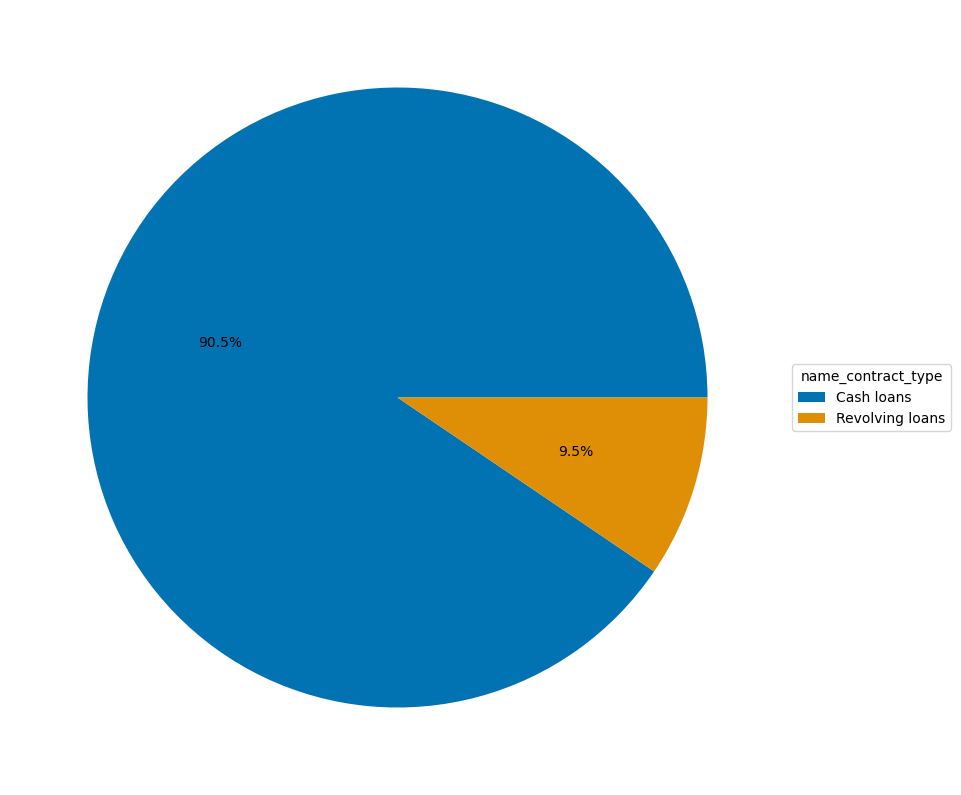

In [170]:
pie_maker(df_clean,'name_contract_type')

#### CODE_GENDER - Gender of the client

In [172]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['code_gender'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

code_gender
F    121359
M     63147
Name: count, dtype: int64
Sum of unique values including NaN: 184506


We had 2 Nan Values in this column, for which we filled with the mode that was the highest gendered applicant in this dataset. Since the Nan values were just 2, either deleting the row or the method we undertook <br> wouldnt cause any major outlier. The majority of applicants as per the results above are females.

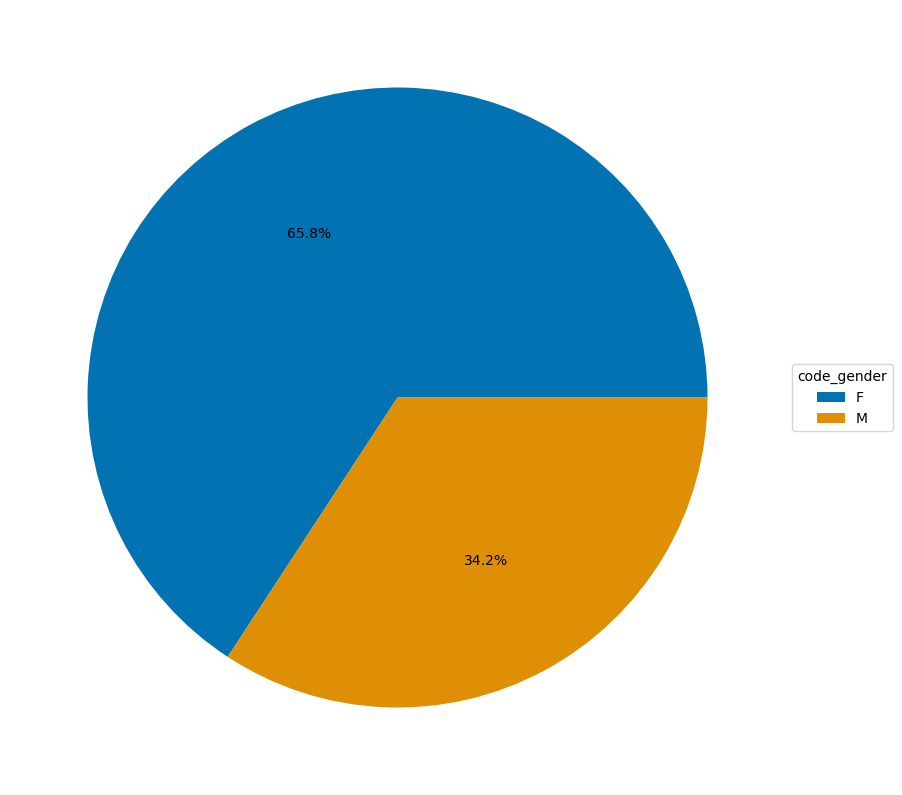

In [174]:
pie_maker(df_clean,'code_gender')

#### FLAG_OWN_CAR - Flag if the client owns a car

In [176]:
df_clean["flag_own_car"].describe()

count     184506
unique         2
top            N
freq      121630
Name: flag_own_car, dtype: object

In [177]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['flag_own_car'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

flag_own_car
N    121630
Y     62876
Name: count, dtype: int64
Sum of unique values including NaN: 184506


This is a simple Yes or No column. where the majority of the applicants does not own a car.

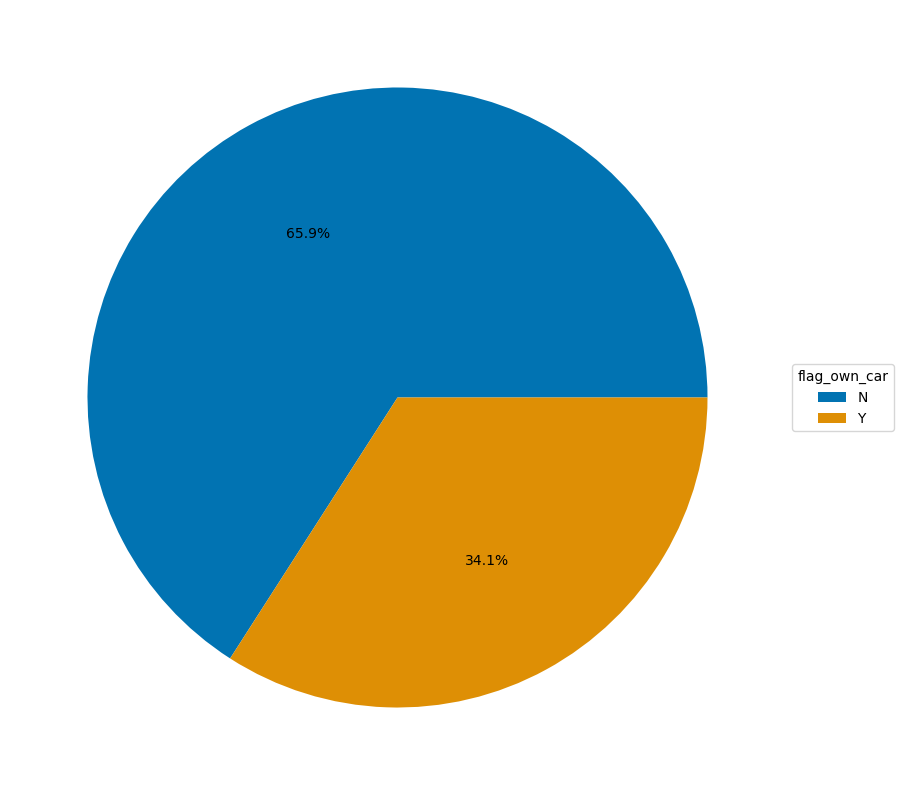

In [179]:
pie_maker(df_clean,'flag_own_car')

#### FLAG_OWN_REALTY - Flag if client owns a house or flat

In [181]:
df_clean["flag_own_realty"].describe()

count     184506
unique         2
top            Y
freq      128059
Name: flag_own_realty, dtype: object

In [182]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['flag_own_realty'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

flag_own_realty
N     56447
Y    128059
Name: count, dtype: int64
Sum of unique values including NaN: 184506


This is a simple No or an Yes Column. Now we may have to determine if this is the second home in addition to the home on which the loan has been approved. Lets look into this later in our project. As per the results <br> above, the majority of the applicants owns a house (Lets safely assume this is the second home we are referring to here for now)

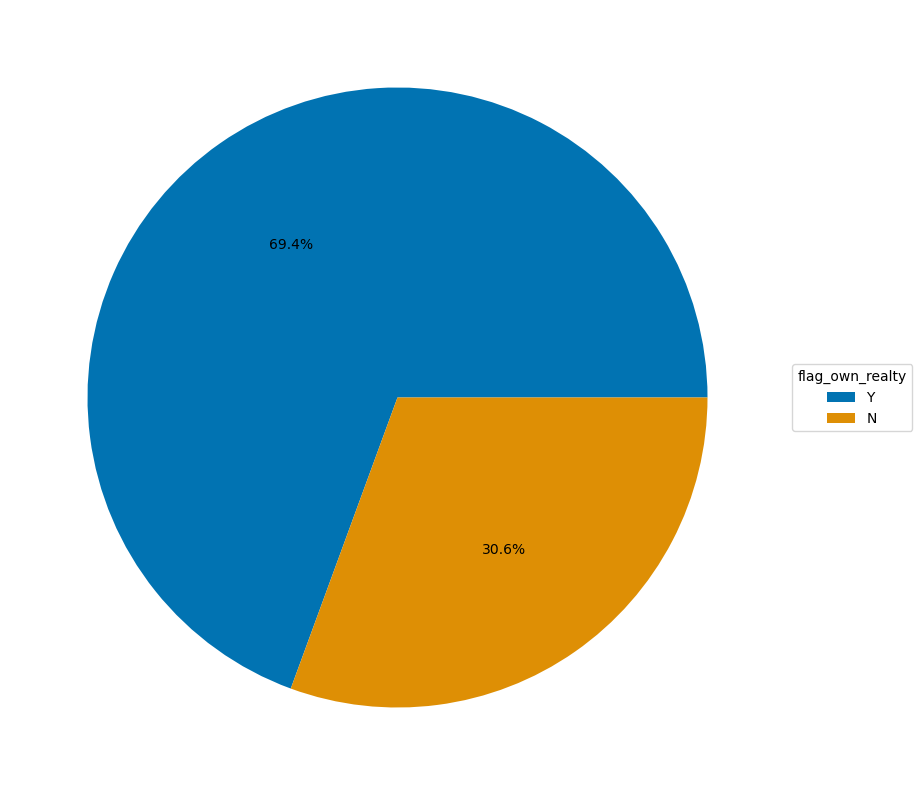

In [184]:
pie_maker(df_clean,'flag_own_realty')

#### CNT_CHILDREN -Number of children the client has


In [186]:
df_clean["cnt_children"].describe()

count    184506.000000
mean          0.416463
std           0.719614
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: cnt_children, dtype: float64

In [187]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['cnt_children'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

cnt_children
0     129082
1      36984
2      15938
3       2190
4        237
5         48
6         12
7          5
8          2
9          2
10         1
12         2
14         2
19         1
Name: count, dtype: int64
Sum of unique values including NaN: 184506


Maximum number of applicants have 0 children with one applicant having 19 children. Now if this has a relation with defualted payments or not will have to be looked at.

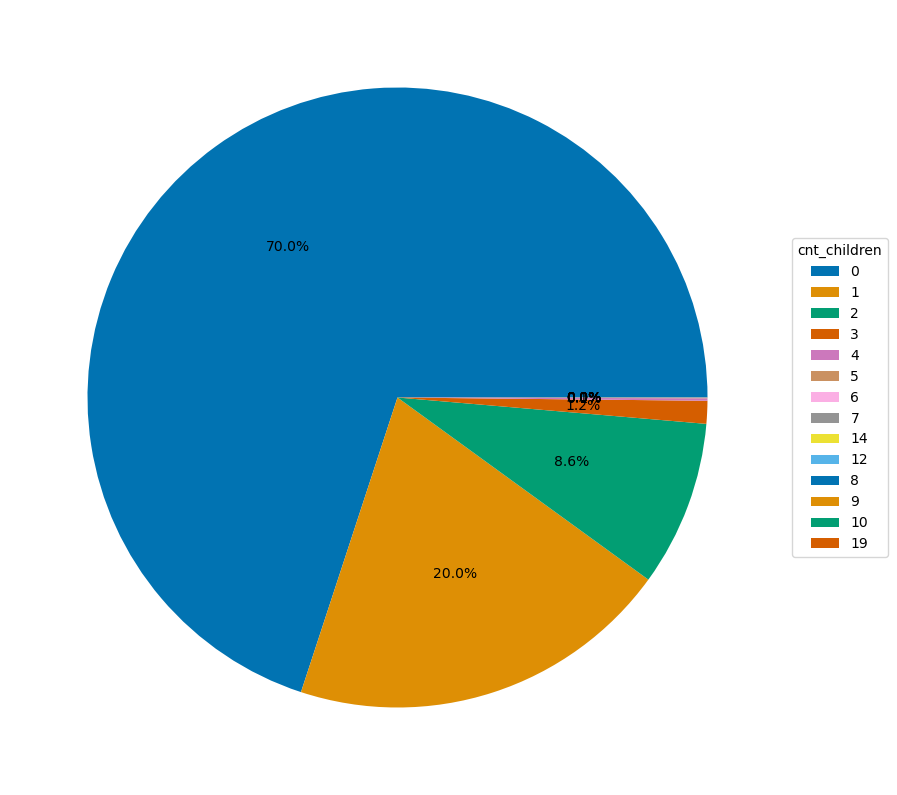

In [189]:
pie_maker(df_clean,'cnt_children')

#### AMT_INCOME_TOTAL - Income of the client

This is a very important column that helps us determine if the default occurs based on the income of the applicant or not. Lets see the column in detail.

In [192]:
df_clean["amt_income_total"].describe()

count    1.845060e+05
mean     1.689985e+05
std      2.942453e+05
min      2.610000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: amt_income_total, dtype: float64

In [193]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['amt_income_total'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

amt_income_total
26100         1
26460         1
26550         1
27000        40
27585         1
             ..
4500000       1
9000000       1
13500000      1
18000090      1
117000000     1
Name: count, Length: 1768, dtype: int64
Sum of unique values including NaN: 184506


The highest income earned by an applicant is reported at 117000000 (Lets keep this as US Dollars for the purpose of this project) and the lowest being 26550 US Dollars. We may have to study this column in detail <br> and read the relationship with the dependant variable in our case would be the target column. 

#### AMT_CREDIT - Credit amount of the loan

In [196]:
df_clean["amt_credit"].describe()

count    1.845060e+05
mean     5.992853e+05
std      4.021982e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.155290e+05
75%      8.086500e+05
max      4.050000e+06
Name: amt_credit, dtype: float64

In [197]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['amt_credit'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

amt_credit
45000      144
47970      136
48519        1
49455       12
49500       25
          ... 
3600000      2
3860019      1
4027680      1
4031032      1
4050000      3
Name: count, Length: 4855, dtype: int64
Sum of unique values including NaN: 184506


Again this will have to be analysed later during our project, if this variable is needed or not. The highest credit being 4050000 and lowest being 45000, quite similar to the Amt_goods_price column. 

#### AMT_ANNUITY - Loan annuity


In [200]:
df_clean["amt_annuity"].describe()

count    184506.000000
mean      27114.229554
std       14468.400786
min        1615.000000
25%       16555.000000
50%       24939.000000
75%       34596.000000
max      258025.000000
Name: amt_annuity, dtype: float64

In [201]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['amt_annuity'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

amt_annuity
1615       1
1980       1
1993       1
2164       2
2173       1
          ..
213160     1
213291     1
220297     1
225000    16
258025     1
Name: count, Length: 12413, dtype: int64
Sum of unique values including NaN: 184506


The highest monthly or equal installments an applicant pays is around 258025 US dollars. (We can keep the denomination in 'US dollars' for the purpose of this project). Again we may have to analyse if this variable <br> is required during the modeling phase of this project.

#### AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given (In our case this will be the home on which the loan was issued)

In [204]:
df_clean["amt_goods_price"].describe()

count    1.845060e+05
mean     5.387066e+05
std      3.692294e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: amt_goods_price, dtype: float64

In [205]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['amt_goods_price'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

amt_goods_price
40500        1
45000      704
49500      101
54000      174
58500      199
          ... 
3375000      2
3555000      1
3600000      3
3712500      1
4050000      3
Name: count, Length: 793, dtype: int64
Sum of unique values including NaN: 184506


The highest amount of goods/asset the loan was issued on is 4050000.  We can keep the denomination in 'US dollars' for the purpose of this project. The lowest priced being $40500. I dont see any particular outlier

#### NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan

In [208]:
df_clean["name_type_suite"].describe()

count            184506
unique                7
top       Unaccompanied
freq             149829
Name: name_type_suite, dtype: object

In [209]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['name_type_suite'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

name_type_suite
Children             1982
Family              24044
Group of people       173
Other_A               528
Other_B              1081
Spouse, partner      6869
Unaccompanied      149829
Name: count, dtype: int64
Sum of unique values including NaN: 184506


This was one of those variables which had a good amount of Nan values and we filled the Nan values with the term 'Unaccompanied'. That constitutes the majority of our data right now with around 123557 applicants. <br> We can either think of keeping this column or delete the column depending on how the variable is related with the rest of the dataset.

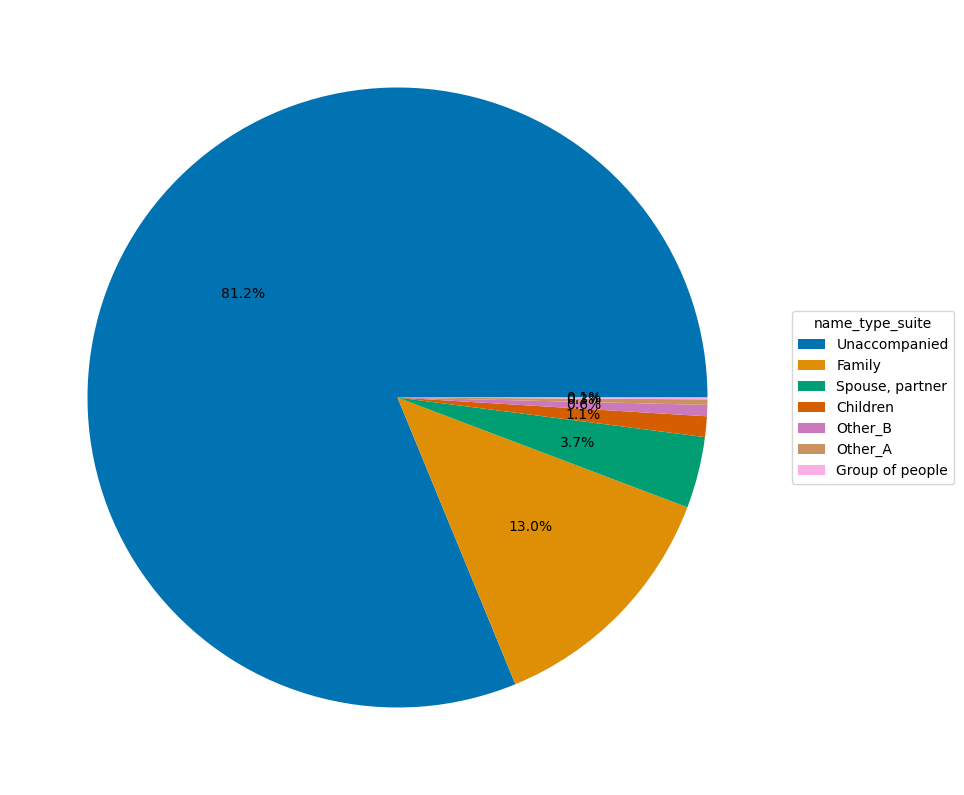

In [211]:
pie_maker(df_clean,'name_type_suite')

#### NAME_INCOME_TYPE

In [213]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['name_income_type'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

name_income_type
Businessman                 6
Commercial associate    42967
Maternity leave             2
Pensioner               33227
State servant           12981
Student                     6
Unemployed                 15
Working                 95302
Name: count, dtype: int64
Sum of unique values including NaN: 184506


Income type can never be Maternity leave so this row should be removed. When considering converting this column to a binary data tyye and create dummy variable during our Feature Engineering <br>this should be considered deleteing


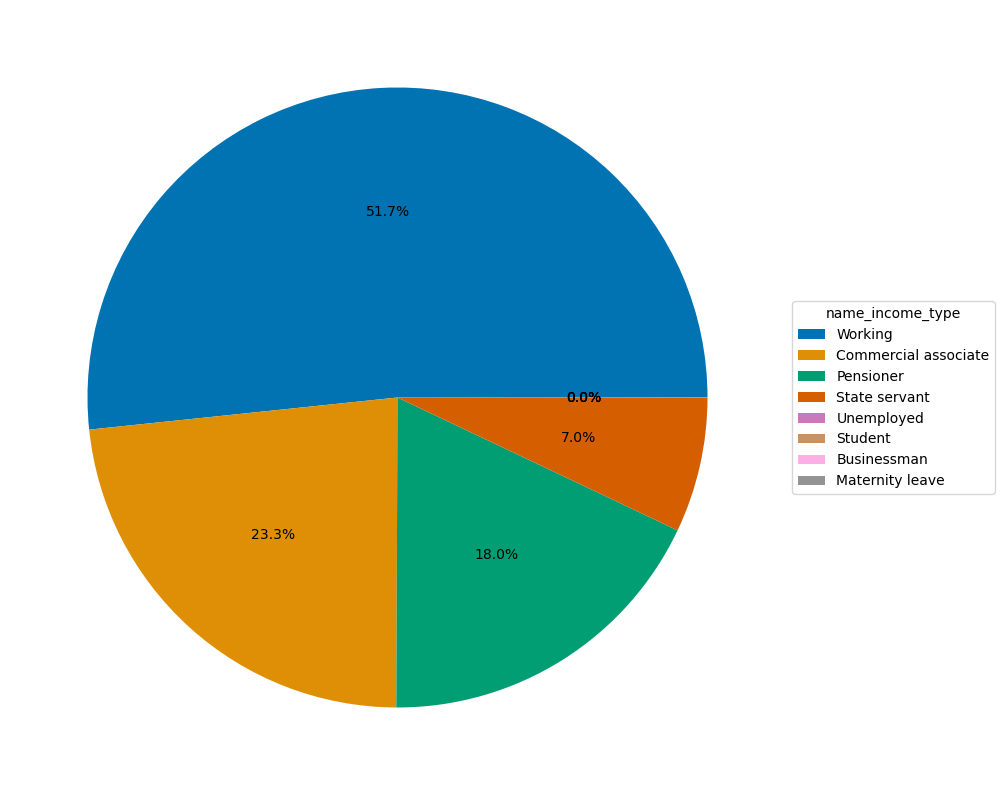

In [215]:
pie_maker(df_clean,'name_income_type')

#### NAME_EDUCATION_TYPE - Level of highest education the client achieved

In [217]:
df_clean["name_education_type"].describe()

count                            184506
unique                                5
top       Secondary / secondary special
freq                             131092
Name: name_education_type, dtype: object

In [218]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['name_education_type'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

name_education_type
Academic degree                     103
Higher education                  44810
Incomplete higher                  6179
Lower secondary                    2322
Secondary / secondary special    131092
Name: count, dtype: int64
Sum of unique values including NaN: 184506


Varied range of Education levels are indicated above. The highest number applicants have a secondary / secondary special education status. No outliers found.

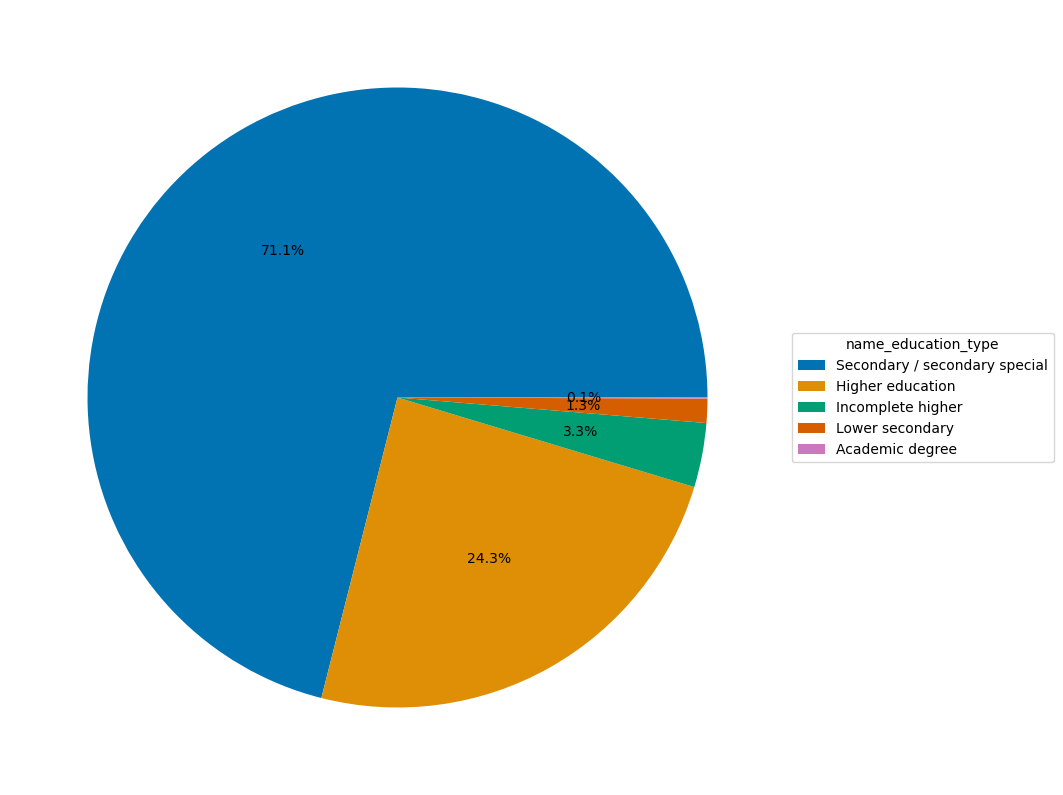

In [220]:
pie_maker(df_clean,'name_education_type')

#### NAME_FAMILY_STATUS - Family status of the client

In [222]:
df_clean["name_family_status"].describe()

count      184506
unique          6
top       Married
freq       117746
Name: name_family_status, dtype: object

In [223]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['name_family_status'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

name_family_status
Civil marriage           18094
Married                 117746
Separated                11904
Single / not married     27130
Unknown                      1
Widow                     9631
Name: count, dtype: int64
Sum of unique values including NaN: 184506


Good amount of data regarding the family status of the applicant is seen in this column. There is a column named Unkown, which we may need to assess later during the project. Majority of the applicants are married.

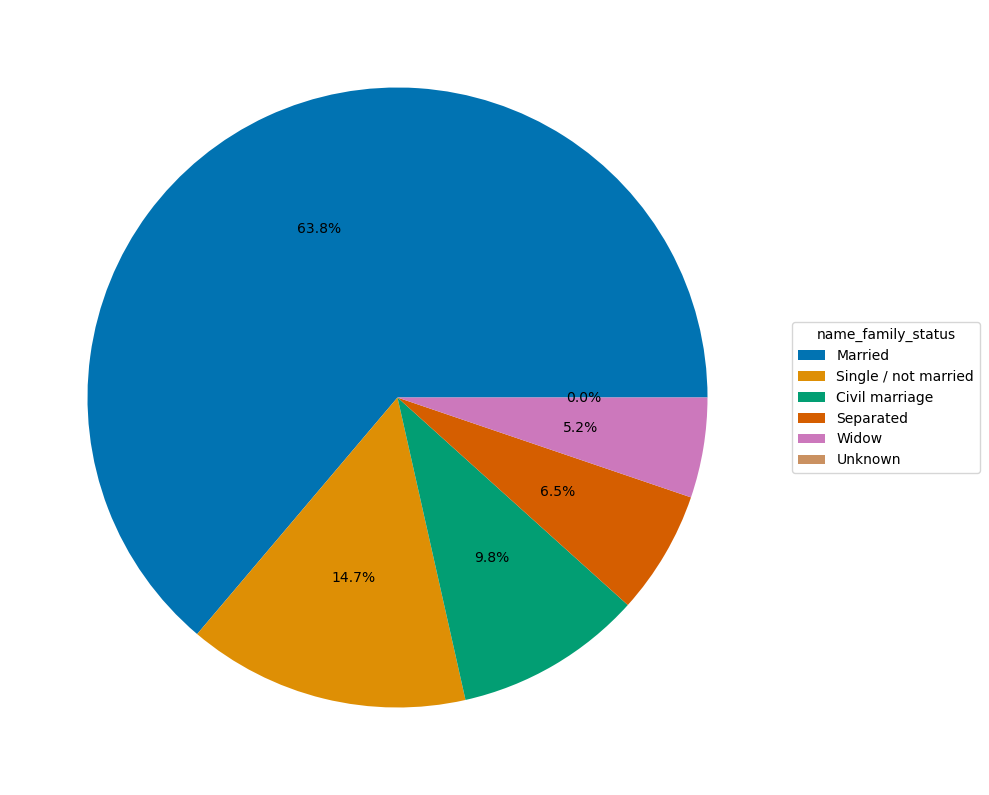

In [225]:
pie_maker(df_clean,'name_family_status')

#### NAME_HOUSING_TYPE - What is the housing situation of the client (renting, living with parents, ...)

In [227]:
df_clean["name_housing_type"].describe()

count                184506
unique                    6
top       House / apartment
freq                 163818
Name: name_housing_type, dtype: object

In [228]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['name_housing_type'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

name_housing_type
Co-op apartment           669
House / apartment      163818
Municipal apartment      6622
Office apartment         1586
Rented apartment         2943
With parents             8868
Name: count, dtype: int64
Sum of unique values including NaN: 184506


This is a fair amount of important data regarding the housing situation of the applicant. This could be useful while creating our models further.

In [230]:
# Get value counts including NaN and sort them in descending order by count
value_counts_with_nan_sorted = df_clean['region_population_relative'].value_counts(dropna=False).sort_values(ascending=False)

# Print the count of unique values including NaN sorted by count
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

region_population_relative
0.035792    9920
0.046220    8082
0.030755    7247
0.025164    7184
0.026392    6993
            ... 
0.001417     288
0.001333     148
0.000533      24
0.000938      14
0.000290       1
Name: count, Length: 81, dtype: int64
Sum of unique values including NaN: 184506


In the above result,  the max number of applicants come from a region that is scored 0.035792 with relation to the total population in that region.

#### DAYS_BIRTH - Client's age in days at the time of application

In [233]:
df_clean["days_birth"].describe()

count    184506.000000
mean     -16036.718307
std        4361.484692
min      -25201.000000
25%      -19677.000000
50%      -15747.000000
75%      -12416.000000
max       -7489.000000
Name: days_birth, dtype: float64

In [234]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['days_birth'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

days_birth
-25201    1
-25195    1
-25191    1
-25187    1
-25184    1
         ..
-7680     6
-7678     2
-7676     1
-7673     1
-7489     1
Name: count, Length: 17334, dtype: int64
Sum of unique values including NaN: 184506


The max age as per the above results is 25180 days which denotes 68 years old. In real technical world, not sure if an applicant is allowed to apply for a home loan at this age. Further research in this is required

#### DAYS_EMPLOYED - How many days before the application the person started current employment

Lets look at the basic summary statistics of this column. 

In [238]:
df_clean["days_employed"].describe()

count    184506.000000
mean      63838.583271
std      141295.297587
min      -17912.000000
25%       -2757.000000
50%       -1211.000000
75%        -289.000000
max      365243.000000
Name: days_employed, dtype: float64

As per the results above, the max value of the column says an applicant could have started his/her current employment 365243 days before his loan application. Which could mean:

In [240]:
# Lets convert the days to years
df_clean["days_employed"].max()/365

1000.6657534246575

The result above says an applicant could have started his/her current employment approximately 1000 years before his loan application, which doesnt make any sense. Therefore, I am deciding to remove this column.

In [242]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['days_employed'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

days_employed
-17912         1
-17583         1
-17531         1
-17522         1
-17170         1
           ...  
-3             2
-2             2
-1             1
 0             2
 365243    33236
Name: count, Length: 11404, dtype: int64
Sum of unique values including NaN: 184506


As you can see above in the results, the number 365243 is also not a negative and also it denotes 1000 years. Therefore I am looking to remove the rows containing this figure. 

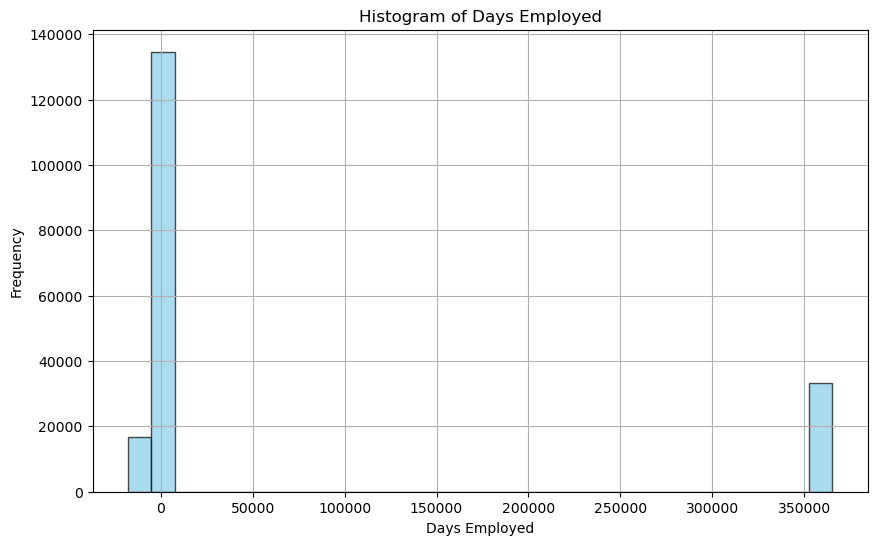

In [244]:
# Plot histogram for the column 'days_employed'
plt.figure(figsize=(10, 6))
plt.hist(df_clean['days_employed'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Days Employed')
plt.xlabel('Days Employed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The above plot does not show any relationship nor a representable graph which can be read. The end part of the graph shows the outlier and since its a positive figure, its best we should delete that row and keep this column as a whole and this could be useful for our analysis later. 

Lets first convert the '365243' to a NaN value so that wil be easier to drop.

In [246]:
# To convert the '365243' figure to NaN value
df_clean.loc[df_clean["days_employed"] == 365243, "days_employed"] = np.nan

In [247]:
# check for missing values in each column of the DataFrame df_clean
df_clean.isna().sum().sort_values()

name_contract_type        0
flag_document_8           0
flag_document_7           0
flag_document_6           0
flag_document_5           0
                      ...  
flag_work_phone           0
flag_emp_phone            0
flag_mobil                0
days_id_publish           0
days_employed         33236
Length: 72, dtype: int64

As we can see, the convertion to NaN has been successful, lets go ahead and drop the rows that contain this figure and it appears in 33236 rows. This should reduce the total number rows from 184506.

In [249]:
# removes rows with missing values from the DataFrame df_clean
df_clean.dropna(inplace=True)

Lets now do a sanity check to see if the rows have been dropped successfully

In [251]:
## check for missing values in each column of the DataFrame df_clean
df_clean.isna().sum().sort_values()

name_contract_type            0
flag_document_8               0
flag_document_7               0
flag_document_6               0
flag_document_5               0
                             ..
flag_work_phone               0
flag_emp_phone                0
flag_mobil                    0
amt_req_credit_bureau_year    0
target                        0
Length: 72, dtype: int64

Lets now do a quick shape check for our dataset to see if the total number of rows are reduced.

In [253]:
# Returns us the shape of the dataframe df_clean
df_clean.shape

(151270, 72)

Now we can see the Total number fo Rows have drastically reduced to 151270 from 184506 and have 72 columns. Lets now check the distribution of the column

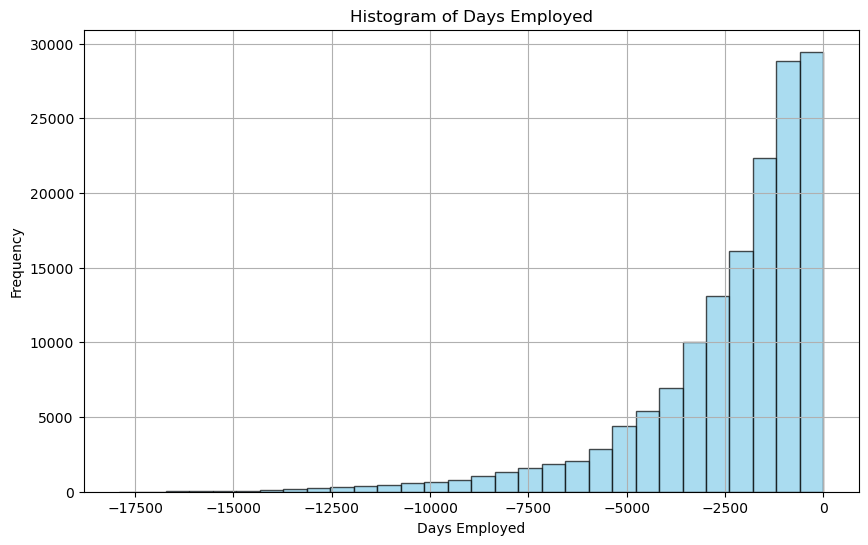

In [255]:
# Plot histogram for the column 'days_employed'
plt.figure(figsize=(10, 6))
plt.hist(df_clean['days_employed'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Days Employed')
plt.xlabel('Days Employed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This is a perfectly shaped graph which can be easily read with no particular outliers. This graph now shows that the largest number of applicants current job was a very recent change and this should help me in the analysis later. 

#### FLAG_DOCUMENT (2 - 21)

This on its own does not give us any kind of information. This to me looks like a dummy converted variable and the original information is missing regarding the documents been presented during the application. 

Lets look at what data we hold on each of the 20 columns under name 'flag_document'

In [259]:
# Select columns starting with 'FLAG_DOC'
flag = [data for data in df_clean.columns if 'flag_doc' in data]

df_clean[flag]

flag_document_2  flag_document_3  flag_document_4  flag_document_5  \
0                     0                1                0                0   
1                     0                1                0                0   
2                     0                1                0                0   
3                     0                1                0                0   
4                     0                1                0                0   
...                 ...              ...              ...              ...   
184498                0                1                0                0   
184499                0                1                0                0   
184501                0                1                0                0   
184503                0                1                0                0   
184505                0                1                0                0   

        flag_document_6  flag_document_7  flag_document_8  flag_document_9  \
0                     0                0                0                0   
1                     0                0                0                0   
2                     0                0                0                0   
3                     0                0                0                0   
4                     0                0                0                0   
...                 ...              ...              ...              ...   
184498                0                0                0                0   
184499                0                0                0                0   
184501                0                0                0                0   
184503                0                0                0                0   
184505                0                0                0                0   

        flag_document_10  flag_document_11  flag_document_12  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
184498                 0                 0                 0   
184499                 0                 0                 0   
184501                 0                 0                 0   
184503                 0                 0                 0   
184505                 0                 0                 0   

        flag_document_13  flag_document_14  flag_document_15  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
184498                 0                 0                 0   
184499                 0                 0                 0   
184501                 0                 0                 0   
184503                 0                 0                 0   
184505                 0                 0                 0   

        flag_document_16  flag_document_17  flag_document_18  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
184498                 0                 0                 0   
184499                 0                 0                 0   
184501              

All documents contains very less no of 1’s except FLAG_DOCUMENT_3 so we can remove them as they cannot give much information. 

Lets see the percentage of 1's and 0's present in each column divided by the total number rows we have currently. 

In [261]:
# This gives us the percentage of times 0's and 1's appears in the flag_documents columns divided by the total number of current rows in the dataframe df_clean
for i in flag:
  a=sum(df_clean[i]==1)
  print(i, "contain no of 1's = ",(a*100/151270)," no of 0's =",(151270-a)*100/151270)

flag_document_2 contain no of 1's =  0.004627487274409995  no of 0's = 99.9953725127256
flag_document_3 contain no of 1's =  76.14001454353144  no of 0's = 23.859985456468568
flag_document_4 contain no of 1's =  0.007932835327559992  no of 0's = 99.99206716467243
flag_document_5 contain no of 1's =  1.6784557413895682  no of 0's = 98.32154425861043
flag_document_6 contain no of 1's =  0.8574072849871092  no of 0's = 99.1425927150129
flag_document_7 contain no of 1's =  0.019171018708269982  no of 0's = 99.98082898129174
flag_document_8 contain no of 1's =  9.82481655318305  no of 0's = 90.17518344681694
flag_document_9 contain no of 1's =  0.45084947444965956  no of 0's = 99.54915052555035
flag_document_10 contain no of 1's =  0.001983208831889998  no of 0's = 99.99801679116811
flag_document_11 contain no of 1's =  0.4911747206980895  no of 0's = 99.50882527930192
flag_document_12 contain no of 1's =  0.0  no of 0's = 100.0
flag_document_13 contain no of 1's =  0.44952733522839955  no 

As seen above the number of 1 (which could have indicated that the applicant did provide a particular document) is nearly 0% and the 0's appeared the majority number of times or 100% ( 0 may indicate that they did not submit the document) <br> as the description of the column says 'Did client provide document'

In any way, these columns does not serve any purpose of this project as we dont have any insider information of what kind of documents were asked and what was produced.

So therefore I am deleting them

In [263]:
# List of column names to drop
columns_to_drop = ['flag_document_2', 'flag_document_3', 'flag_document_3', 'flag_document_4', 'flag_document_5', 'flag_document_6', 'flag_document_7', 'flag_document_8', 'flag_document_9', 'flag_document_10', 'flag_document_11', 'flag_document_12', 'flag_document_13', 'flag_document_14', 'flag_document_15', 'flag_document_16', 'flag_document_17', 'flag_document_18', 'flag_document_19', 'flag_document_20', 'flag_document_21']

# Drop the specified columns from the DataFrame
df_clean = df_clean.drop(columns=columns_to_drop)

This above code should have deleted the 20 columns. Lets check if this has done the job

In [265]:
df_clean.shape

(151270, 52)

The Columns have now drastically reduced to 52. Lets quickly do a datatype summary

In [267]:
# summary that includes the number of non-null values and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151270 entries, 0 to 184505
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   name_contract_type           151270 non-null  object 
 1   code_gender                  151270 non-null  object 
 2   flag_own_car                 151270 non-null  object 
 3   flag_own_realty              151270 non-null  object 
 4   cnt_children                 151270 non-null  int64  
 5   amt_income_total             151270 non-null  int32  
 6   amt_credit                   151270 non-null  int32  
 7   amt_annuity                  151270 non-null  int32  
 8   amt_goods_price              151270 non-null  int32  
 9   name_type_suite              151270 non-null  object 
 10  name_income_type             151270 non-null  object 
 11  name_education_type          151270 non-null  object 
 12  name_family_status           151270 non-null  object 
 13  name

Now we have 21 Float, 20 int and 11 Object. We will have to evaluate this huge number of Oject datatype for later during the Feature Engineering section of our project. 

Now let me look at removing the sk_id_curr column as well this id does not serve any particular purpose for my project either. 

#### DAYS_REGISTRATION - How many days before the application did client change his registration

In [270]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['days_registration'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

days_registration
-22928     1
-21865     1
-20841     1
-20452     1
-19504     1
          ..
-4        57
-3        49
-2        58
-1        52
 0        35
Name: count, Length: 13703, dtype: int64
Sum of unique values including NaN: 151270


This results to some extent doesnt make any sense, as the mortgage loan is usually applied for straight after the registration of the house was done. The max number of days I see above is -22928 which denotes <br>
-22928/365 = 62 years? And more over what registration was this reffering to? 

I am therfore deciding to delete this column. Lets look at the graph for a description of the column

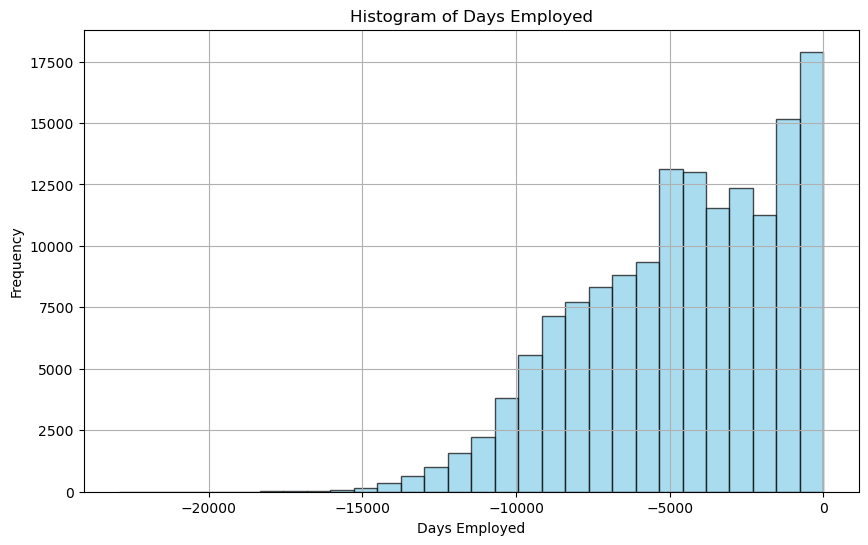

In [272]:
# Plot histogram for the column 'days_employed'
plt.figure(figsize=(10, 6))
plt.hist(df_clean['days_registration'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Days Employed')
plt.xlabel('Days Employed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From the above graph: The range between -5000 days (around 14 years) to 0 ranges from 12500 to 17500 people, and thats just a small portion of applicants from my dataset in comparison to a total of 151270 rows. <br>

Therefore Deleting this column all together

In [274]:
# To drop the column 'days_registration' from our Datafram df-clean
df_clean.drop(columns='days_registration', inplace=True)

Lets now do a sanity check

In [276]:
# summary that includes the number of non-null values and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151270 entries, 0 to 184505
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   name_contract_type           151270 non-null  object 
 1   code_gender                  151270 non-null  object 
 2   flag_own_car                 151270 non-null  object 
 3   flag_own_realty              151270 non-null  object 
 4   cnt_children                 151270 non-null  int64  
 5   amt_income_total             151270 non-null  int32  
 6   amt_credit                   151270 non-null  int32  
 7   amt_annuity                  151270 non-null  int32  
 8   amt_goods_price              151270 non-null  int32  
 9   name_type_suite              151270 non-null  object 
 10  name_income_type             151270 non-null  object 
 11  name_education_type          151270 non-null  object 
 12  name_family_status           151270 non-null  object 
 13  name

#### DAYS_ID_PUBLISH - How many days before the application did client change the identity document with which he applied for the loan

In [278]:
df_clean["days_id_publish"].describe()

count    151270.000000
mean      -2801.438362
std        1516.118899
min       -6383.000000
25%       -4179.000000
50%       -2889.000000
75%       -1486.000000
max           0.000000
Name: days_id_publish, dtype: float64

In [279]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['days_id_publish'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

days_id_publish
-6383     1
-6274     1
-6265     1
-6263     1
-6259     1
         ..
-4       34
-3       29
-2       27
-1       32
 0        9
Name: count, Length: 6044, dtype: int64
Sum of unique values including NaN: 151270


The id here could also denote a passport or a national id card, which the max number of days I could see in above results shows 6383 days which can mean around 17years ago. Some passports can be valid for 20 years so this does <br>make some sense. 

Therefore I wont be deleting this column

#### FLAG_MOBIL - Did client provide mobile phone (1=YES, 0=NO)

In [282]:
df_clean["flag_mobil"].describe()

count    151270.000000
mean          0.999993
std           0.002571
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: flag_mobil, dtype: float64

In [283]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['flag_mobil'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

flag_mobil
0         1
1    151269
Name: count, dtype: int64
Sum of unique values including NaN: 151270


This is eiter an yes or a no which is fine to stay in the dataset, Similarly we have Flag_Emp_phone, Flag_work_phone, flag_cont_mobile, flag_phone, flsg_email with a simple Yes or No present in the columns. Further <br> analysis is required to see if all or either of these can be deleted. 

#### CNT_FAM_MEMBERS - How many family members does client have

In [286]:
df_clean["cnt_fam_members"].describe()

count    151270.000000
mean          2.252139
std           0.938772
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: cnt_fam_members, dtype: float64

In [287]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['cnt_fam_members'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

cnt_fam_members
1     29292
2     74064
3     31143
4     14453
5      2032
6       217
7        44
8        11
9         5
10        3
11        1
12        1
14        2
16        1
20        1
Name: count, dtype: int64
Sum of unique values including NaN: 151270


This looks fine too, majority of the applicants have one other family member with least being 20 family members. So this column looks good in the dataset for now.

#### REGION_RATING_CLIENT - Our rating of the region where client lives (1,2,3)

In [290]:
df_clean["region_rating_client"].describe()

count    151270.000000
mean          2.043888
std           0.511621
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: region_rating_client, dtype: float64

In [291]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['region_rating_client'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

region_rating_client
1     16624
2    111383
3     23263
Name: count, dtype: int64
Sum of unique values including NaN: 151270


Majority of the applicants come from a region with a rating of 2. Further analysis is required to see if this column is required or no

#### REGION_RATING_CLIENT_W_CITY - Our rating of the region where client lives with taking city into account (1,2,3)

In [294]:
df_clean["region_rating_client_w_city"].describe()

count    151270.000000
mean          2.023065
std           0.505792
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: region_rating_client_w_city, dtype: float64

In [295]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['region_rating_client_w_city'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

region_rating_client_w_city
1     17645
2    112491
3     21134
Name: count, dtype: int64
Sum of unique values including NaN: 151270


Again a very similar type of information as the above. Majority of the applicants come from the city that is rated 2. Further during our correlation with a heatmap could determine if one these two columns need deleting

#### WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for the loan

In [298]:
df_clean["weekday_appr_process_start"].describe()

count      151270
unique          7
top       TUESDAY
freq        26372
Name: weekday_appr_process_start, dtype: object

In [299]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['weekday_appr_process_start'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

weekday_appr_process_start
FRIDAY       24437
MONDAY       24929
SATURDAY     16882
SUNDAY        8335
THURSDAY     24894
TUESDAY      26372
WEDNESDAY    25421
Name: count, dtype: int64
Sum of unique values including NaN: 151270


This is just a simple information that shows which day of the week does the applicant usually applied for the loan. The highest number of applicants applied on Tuesdays. Not sure if this is of any particular importance in the dataset

#### HOUR_APPR_PROCESS_START - Approximately at what hour did the client apply for the loan

In [302]:
df_clean["hour_appr_process_start"].describe()

count    151270.000000
mean         12.204046
std           3.297738
min           0.000000
25%          10.000000
50%          12.000000
75%          15.000000
max          23.000000
Name: hour_appr_process_start, dtype: float64

In [303]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['hour_appr_process_start'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

hour_appr_process_start
0        23
1        53
2       156
3       615
4      1041
5      1791
6      2717
7      4208
8      6873
9     12660
10    17835
11    18060
12    16686
13    15290
14    13881
15    12790
16    10655
17     7956
18     4879
19     2134
20      641
21      216
22       87
23       23
Name: count, dtype: int64
Sum of unique values including NaN: 151270


The most number of applicants applied at 11 am. Least being between 11 pm and midnight. Lets keep this column and see if there are any relationship between other variables later

#### REG_REGION_NOT_LIVE_REGION - Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)

In [306]:
df_clean["reg_region_not_live_region"].describe()

count    151270.000000
mean          0.017280
std           0.130314
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: reg_region_not_live_region, dtype: float64

In [307]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['reg_region_not_live_region'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

reg_region_not_live_region
0    148656
1      2614
Name: count, dtype: int64
Sum of unique values including NaN: 151270


This is a simple 1 and 0 valued column. Majority had the same contact address as in the application. Similarly we have REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY <br> and LIVE_CITY_NOT_WORK_CITY which has a 1 and 0 in their columns. Most of these should be relevant for our study as this could be a good indicator to see if the client providing all <br> matching information will not go default compared to those who dont provide them correctly. 

#### EXT_SOURCE_2 - Normalized score from external data source


This could be the credit score of the applicant. We had to delete the ext_source_1 since it had a huge number of null values and I had no other information to fill them in. Lets analyse this column and see what it contains. 

In [311]:
df_clean["ext_source_2"].describe()

count    151270.000000
mean          0.516407
std           0.189672
min           0.000001
25%           0.398753
50%           0.567089
75%           0.664089
max           0.855000
Name: ext_source_2, dtype: float64

In [312]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['ext_source_2'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

ext_source_2
0.000001     1
0.000005     1
0.000006     1
0.000006     1
0.000010     1
            ..
0.818556     1
0.819832     1
0.820487     1
0.820616     1
0.855000    13
Name: count, Length: 85401, dtype: int64
Sum of unique values including NaN: 151270


These external sources features contain a ‘normalized score from an external data source.’. We may have to see the correlation between the external sources 2 and 3 with the target variable to see if there is a negative <br> or a positive correlation present. Negative correlation would mean when the value of Ext_Source increases the applicant is more like to repay the loan and vice versa. The highest score in ext_source_2 as seen above is <br> 0.855000

#### EXT_SOURCE_3 - Normalized score from external data source

In [315]:
df_clean["ext_source_3"].describe()

count    151270.000000
mean          0.502841
std           0.196144
min           0.000527
25%           0.358951
50%           0.524496
75%           0.659406
max           0.887664
Name: ext_source_3, dtype: float64

In [316]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['ext_source_3'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

ext_source_3
0.000527    522
0.014148      1
0.014556      1
0.016078      1
0.016777      2
           ... 
0.880268     23
0.881027      3
0.882530     16
0.885488      2
0.887664      1
Name: count, Length: 787, dtype: int64
Sum of unique values including NaN: 151270


Again this is the same as the previous column. Provided I see a largest number of applicants here on the lowest score. We may have to filter by the number of applicants to read this column better.

In [318]:
# Get value counts including NaN and sort them in descending order by count
value_counts_with_nan_sorted = df_clean['ext_source_3'].value_counts(dropna=False).sort_values(ascending=False)

# Print the count of unique values including NaN sorted by count
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

ext_source_3
0.746300    862
0.713631    804
0.694093    745
0.595456    728
0.554947    691
           ... 
0.023225      1
0.025272      1
0.020311      1
0.018266      1
0.023062      1
Name: count, Length: 787, dtype: int64
Sum of unique values including NaN: 151270


Now, this has given a better understanding of the column. The largest number of applicants are on a higher score not possibly the highest and defintely not in the lowest of score available.

#### OBS_30_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 30 DPD (days past due) default

In [321]:
df_clean["obs_30_cnt_social_circle"].describe()

count    151270.000000
mean          1.420652
std           2.466119
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: obs_30_cnt_social_circle, dtype: float64

In [322]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['obs_30_cnt_social_circle'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

obs_30_cnt_social_circle
0      80544
1      24321
2      14911
3      10008
4       7054
5       4626
6       3175
7       2194
8       1483
9        986
10       640
11       403
12       339
13       181
14       132
15        86
16        46
17        38
18        22
19        22
20        14
21        11
22         8
23        11
24         3
25         5
27         3
29         1
30         2
348        1
Name: count, dtype: int64
Sum of unique values including NaN: 151270


I dont particularly understand the need to have this column in this dataset. I will have to find the relationship between this column and target variable to understand this better. Similarly I have 3 more columns namely DEF_30_CNT_SOCIAL_CIRCLE, <br> OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE. all these variables I believe has a correlation between the target variables. L 

#### DAYS_LAST_PHONE_CHANGE - How many days before application did client change phone

In [325]:
df_clean["days_last_phone_change"].describe()

count    151270.000000
mean       -970.449157
std         828.346448
min       -4185.000000
25%       -1577.000000
50%        -762.000000
75%        -286.000000
max           0.000000
Name: days_last_phone_change, dtype: float64

In [326]:
# Get value counts including NaN and sort them in ascending order by index
value_counts_with_nan_sorted = df_clean['days_last_phone_change'].value_counts(dropna=False).sort_index()

# Print the count of unique values including NaN in ascending order
print(value_counts_with_nan_sorted)

# Sum up all the unique values including NaN
unique_sum_with_nan_sorted = value_counts_with_nan_sorted.sum()
print("Sum of unique values including NaN:", unique_sum_with_nan_sorted)

days_last_phone_change
-4185        1
-4173        1
-4153        1
-4131        1
-4128        1
         ...  
-4         729
-3         886
-2        1088
-1        1431
 0       17377
Name: count, Length: 3658, dtype: int64
Sum of unique values including NaN: 151270


Majority of the applicants changed their phones just on the day of applying for the loans. This does not make any sense. And the longest that an applicant has changed their phones before the application was 11 years (-4185 days)

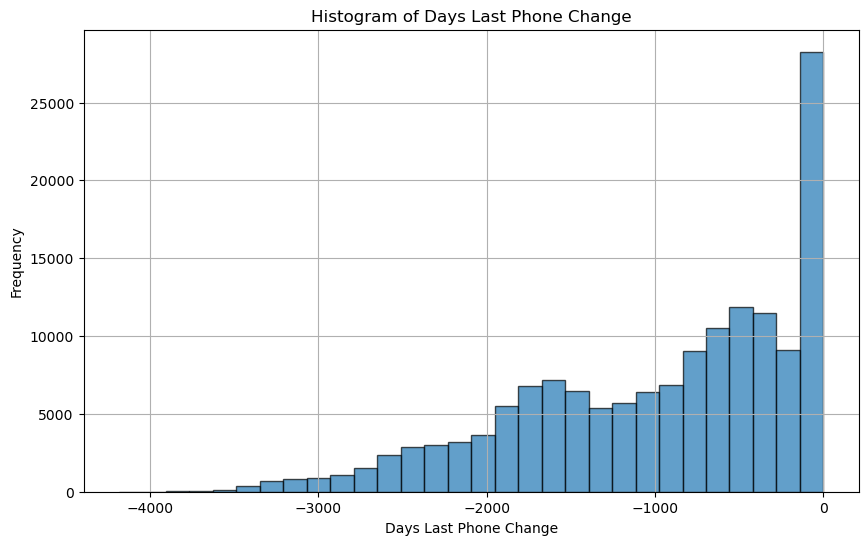

In [328]:
# Plot histogram for days_last_phone_change
plt.figure(figsize=(10, 6))
plt.hist(df_clean['days_last_phone_change'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Days Last Phone Change')
plt.ylabel('Frequency')
plt.title('Histogram of Days Last Phone Change')
plt.grid(True)
plt.show()

## Relationship Analysis <a id='relationship'></a> <ins>

The Target Variable will be our dependant variable against which we can study the rest of the columns to see their relationships and analyse if they are positively or negatively correlated. Lets go ahead and analyse the Target Variable first.

In [331]:
df_clean["target"].value_counts(normalize=True) * 100

target
0    91.314867
1     8.685133
Name: proportion, dtype: float64

This is an unbalanced data as the classification problem has unequal instances for different classes i.e. there are over 91.3% of the applicants who didn’t default their loans whereas there are only 8.6% of the applicants who have  defaulted the loan. <br> Lets plot this using a bar chart for a detailed understanding

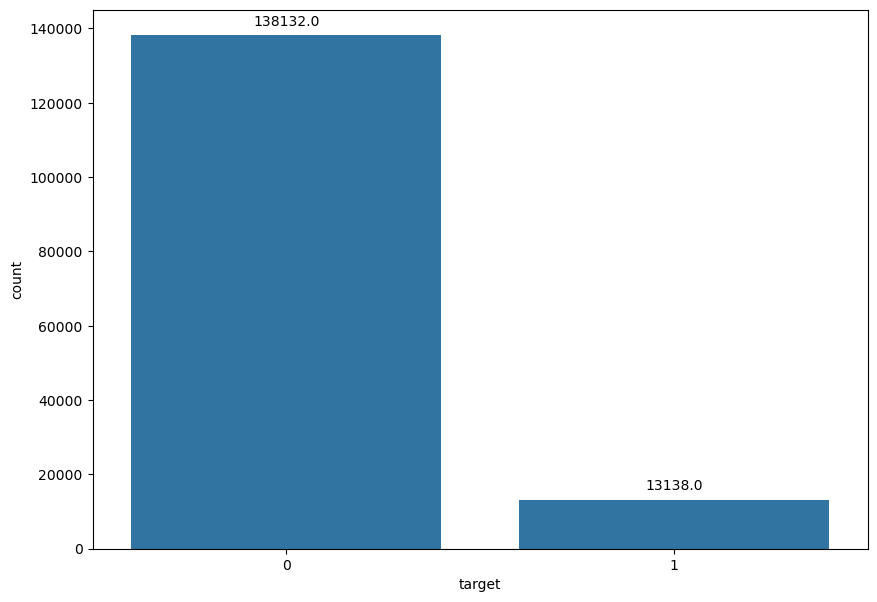

In [333]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='target',data=df_clean)
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

0 indicates people who repayed all the installments on time and 1 indicates people who repayed the installment late at least once

From the above graph, we can infer that a high percentage of people (91.93%) repayed the installments on time, so the target label is highly imbalanced.

Lets Plot Counts of all the odject type Columns below keeping Target Column as a dependant variable

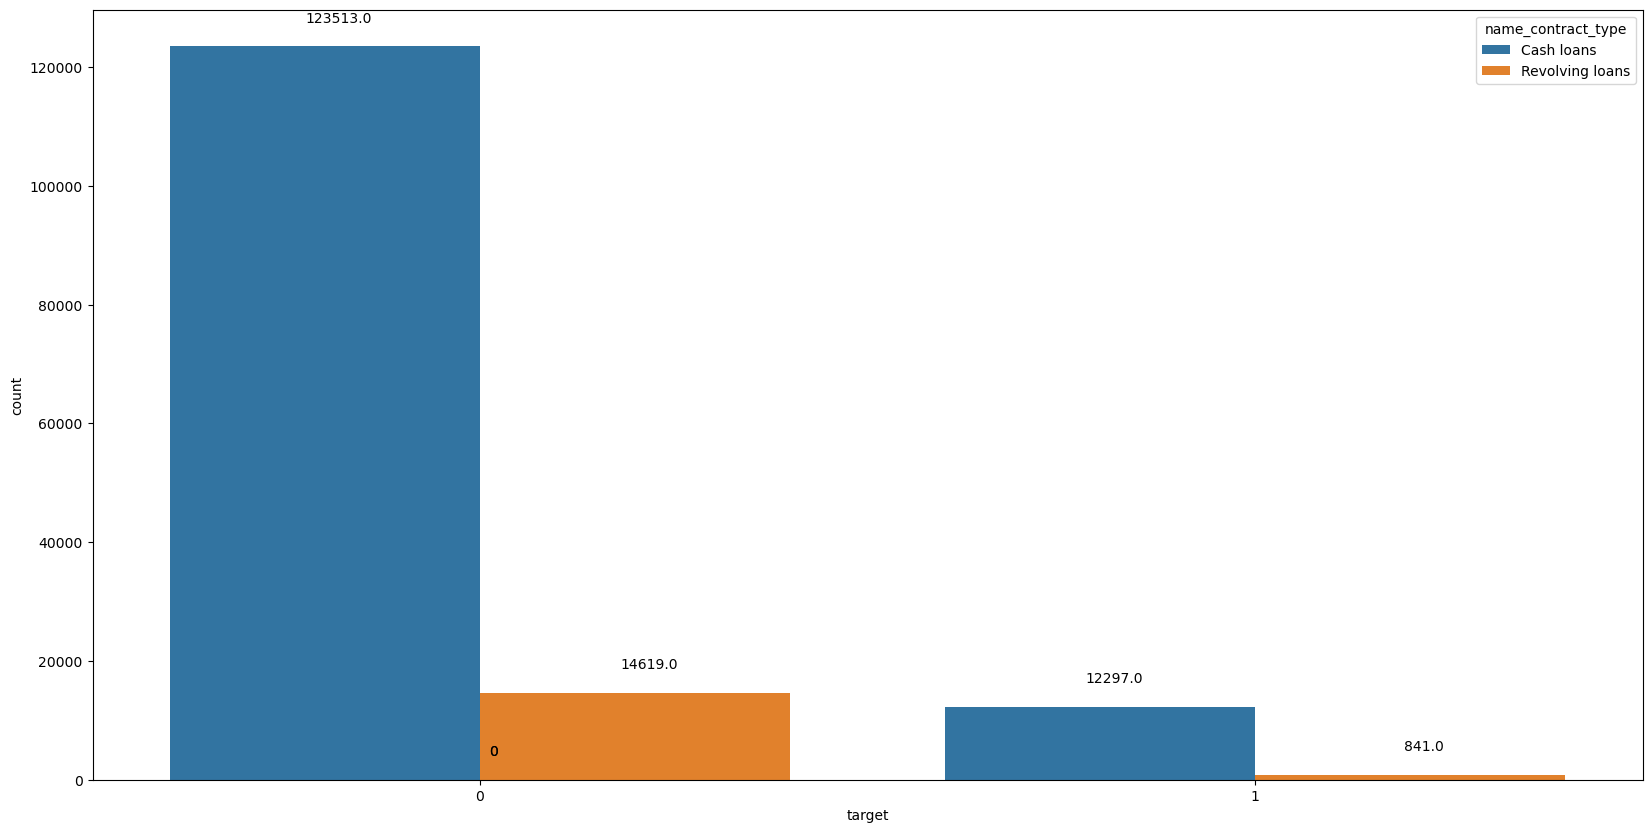

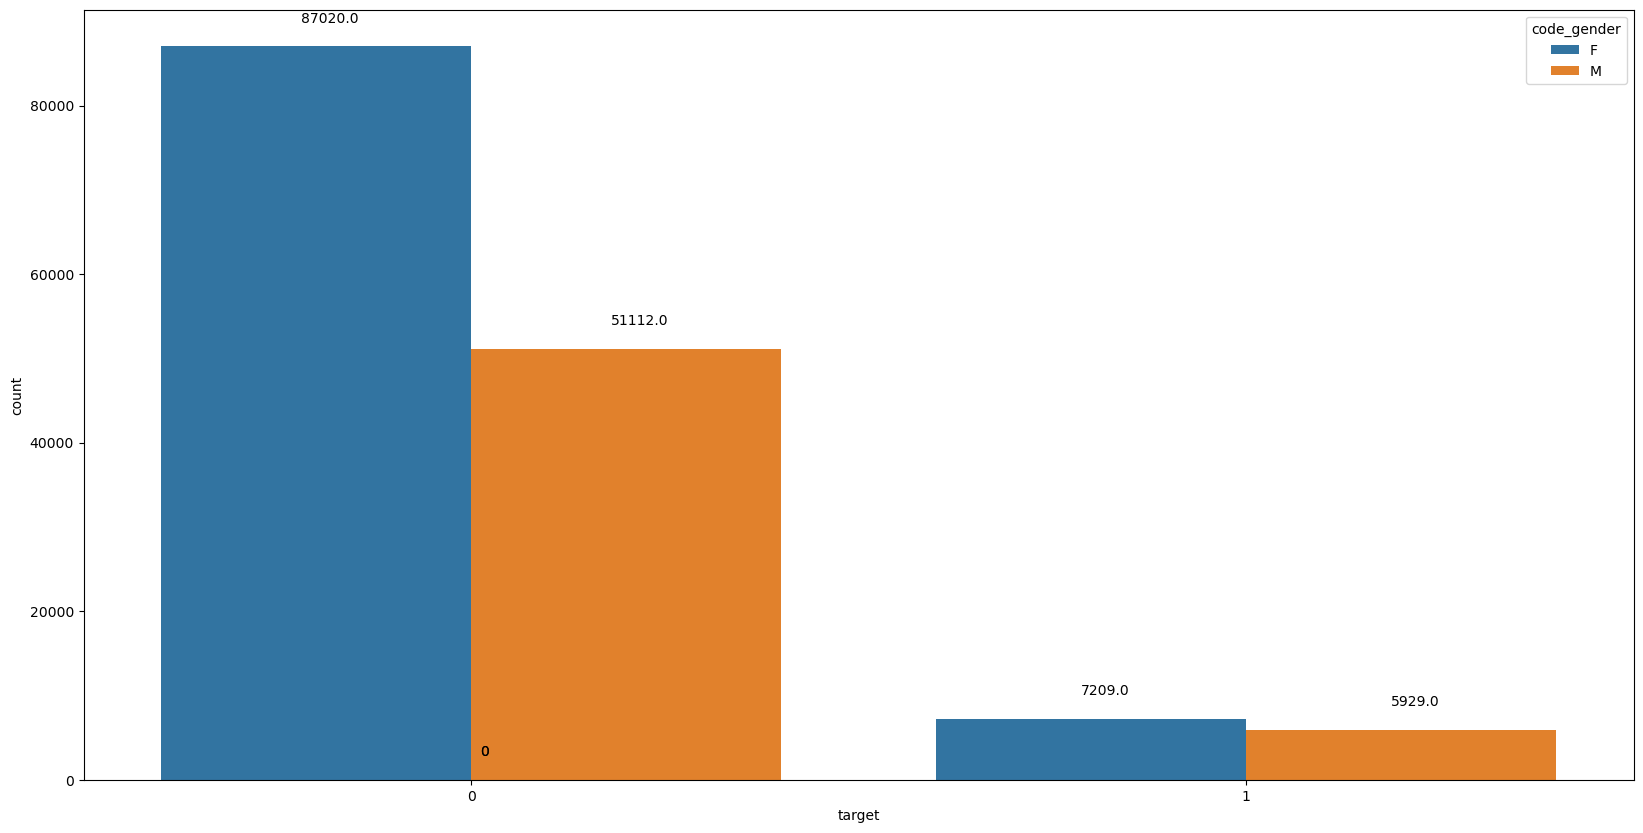

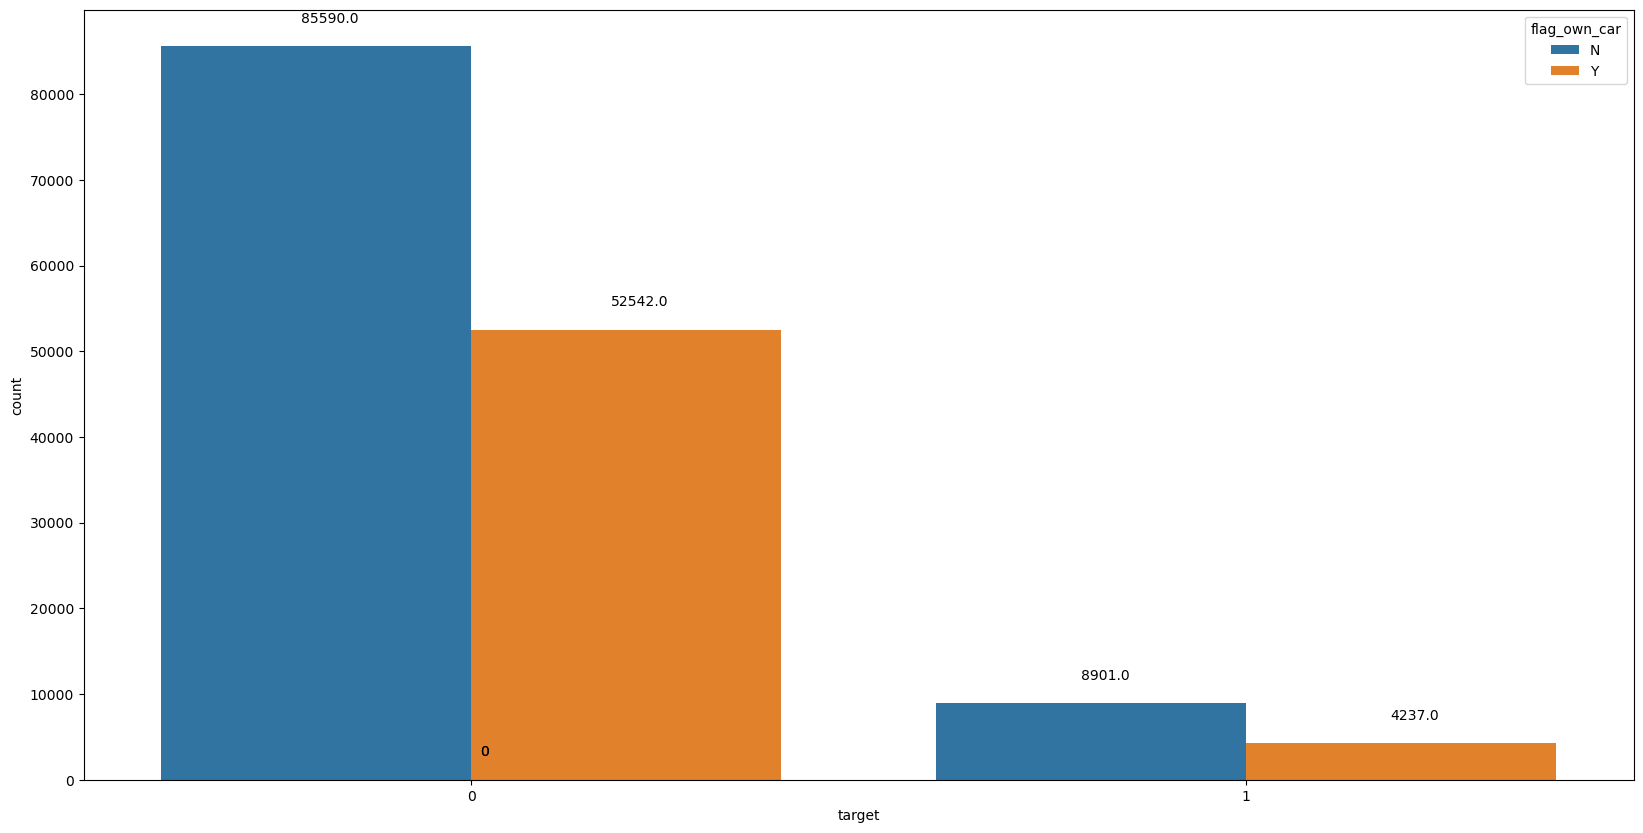

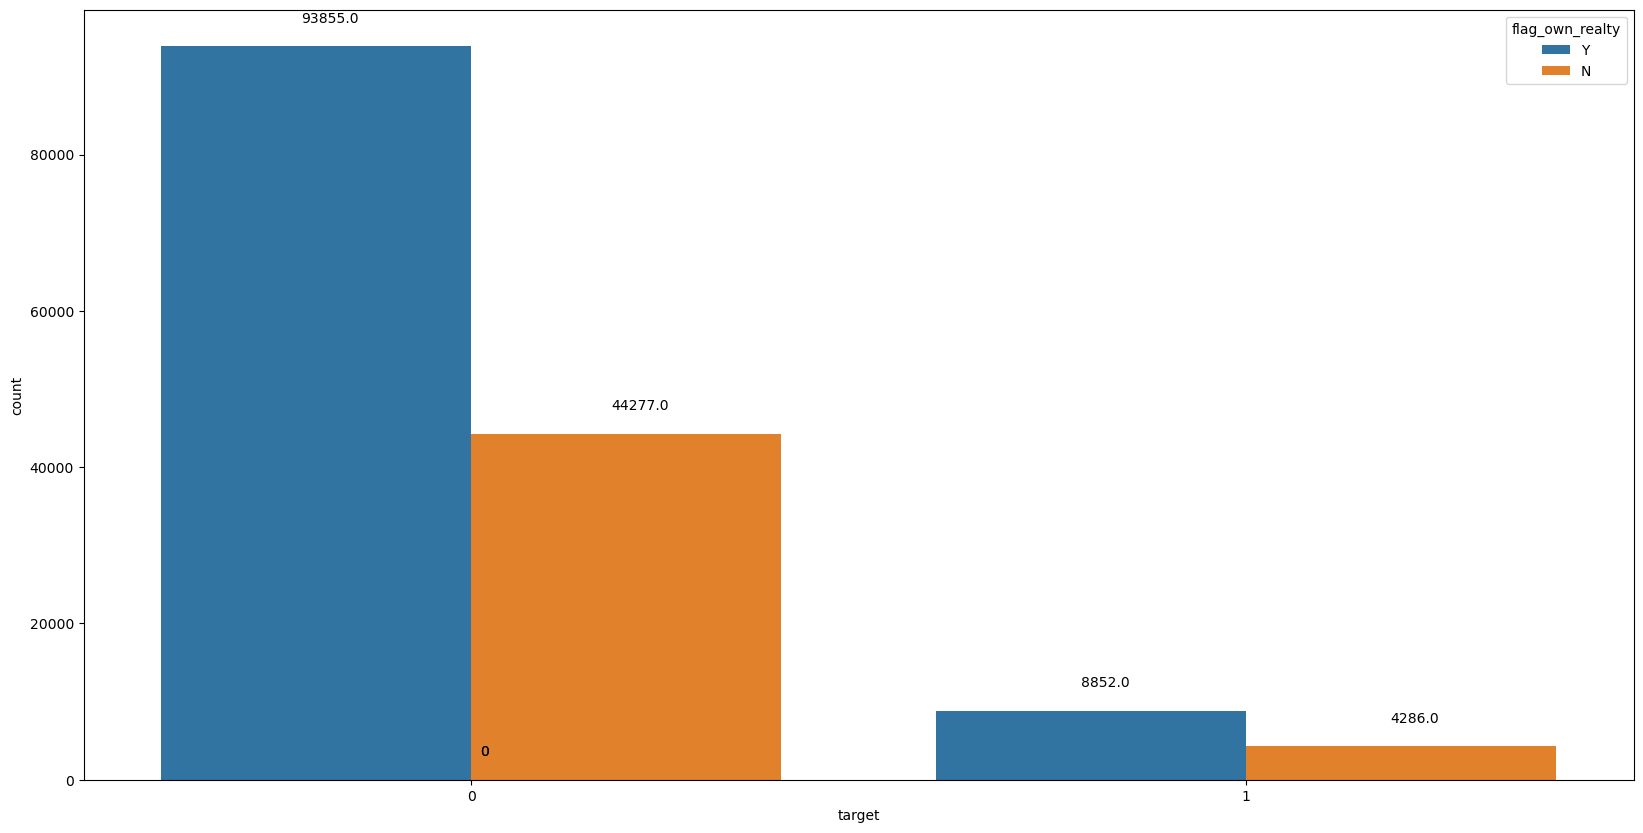

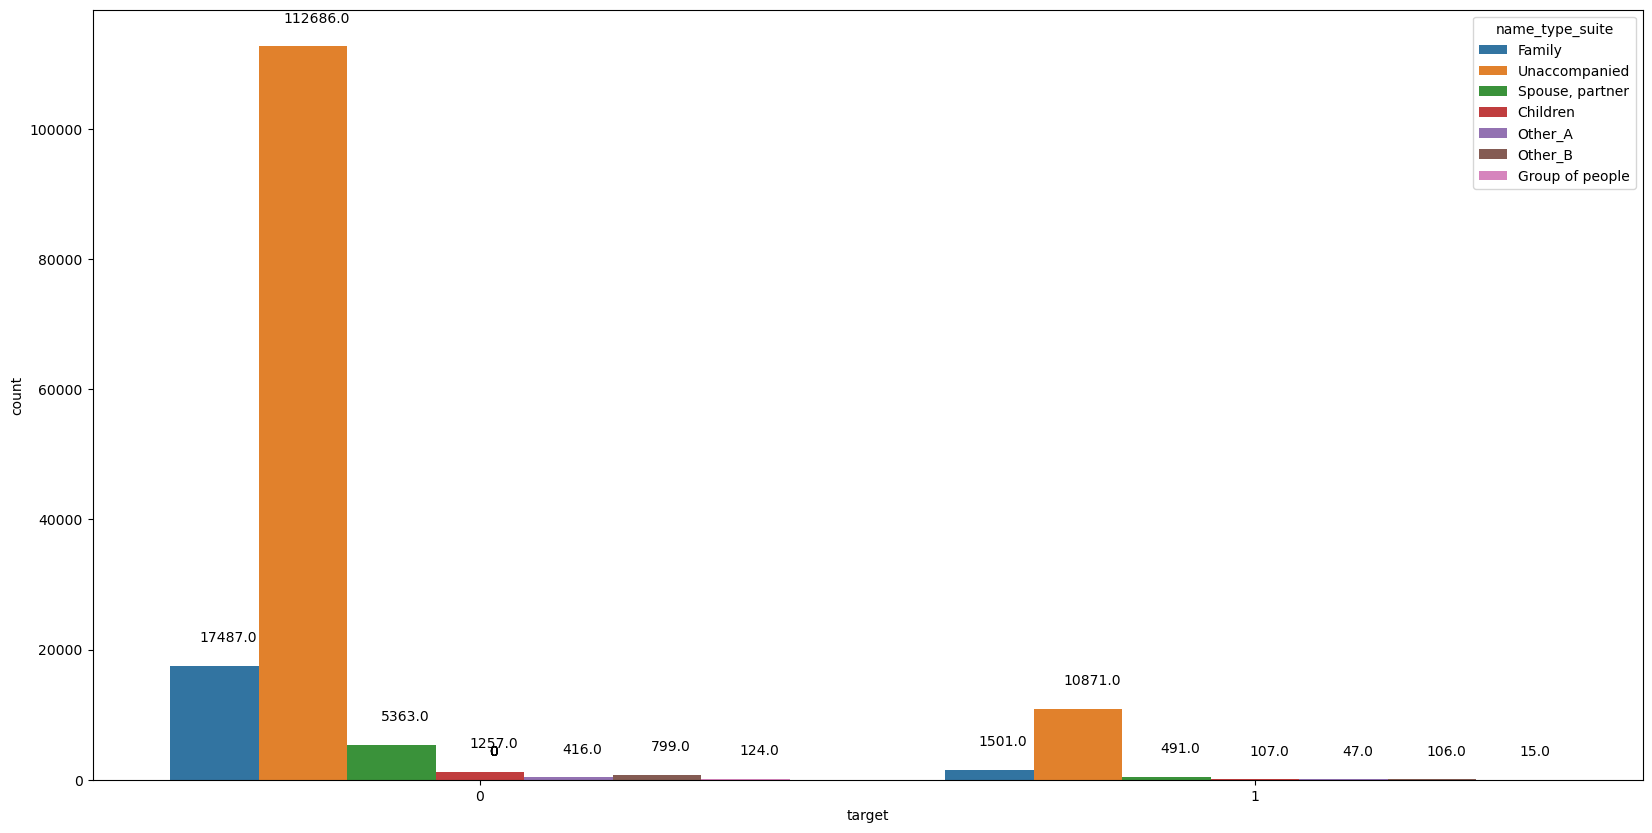

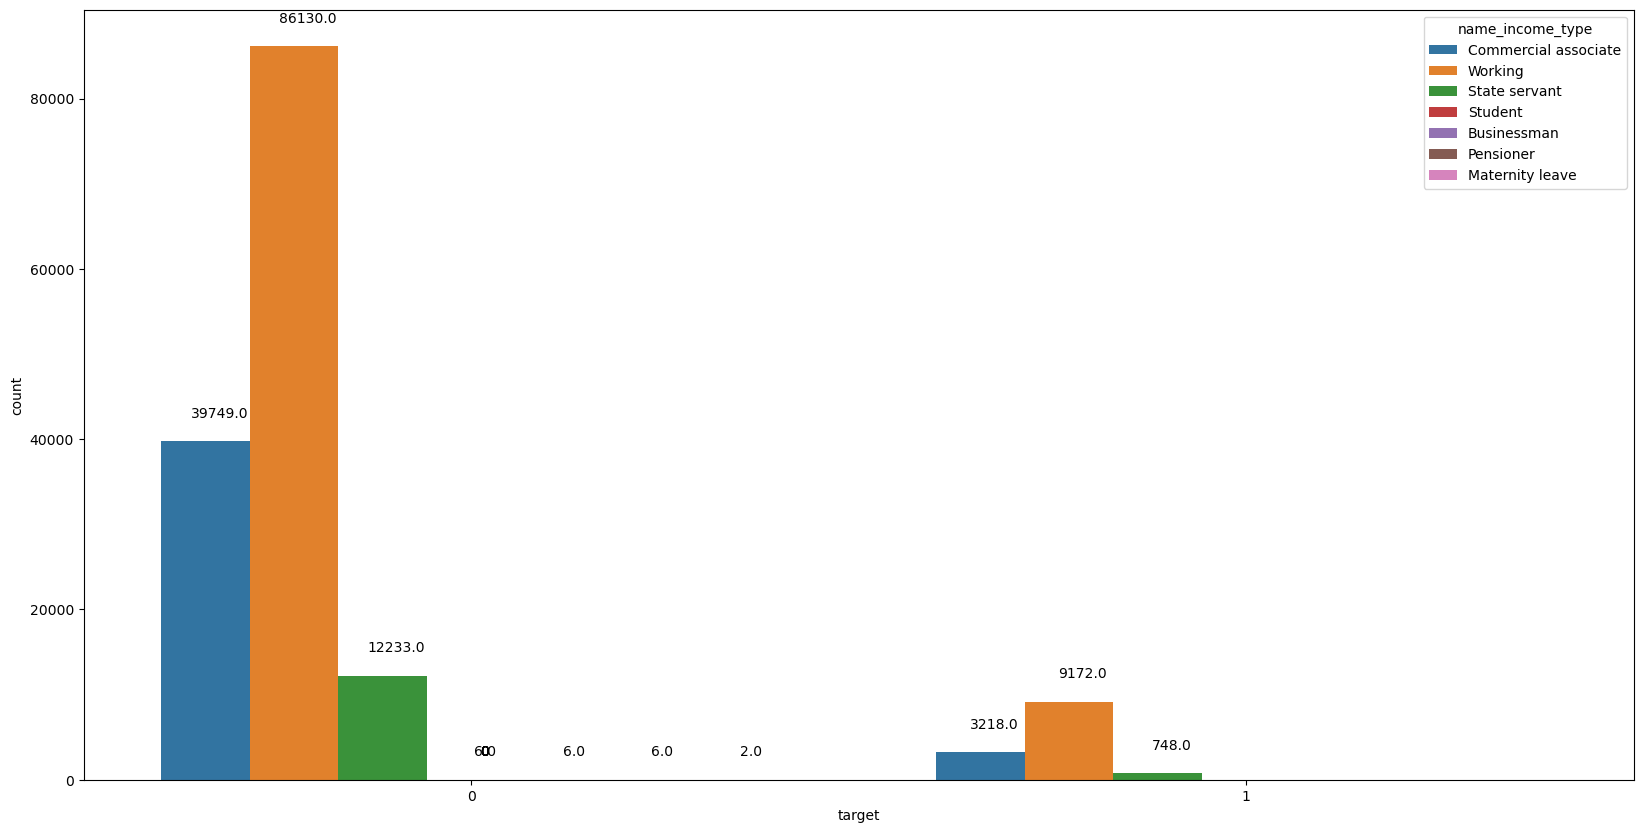

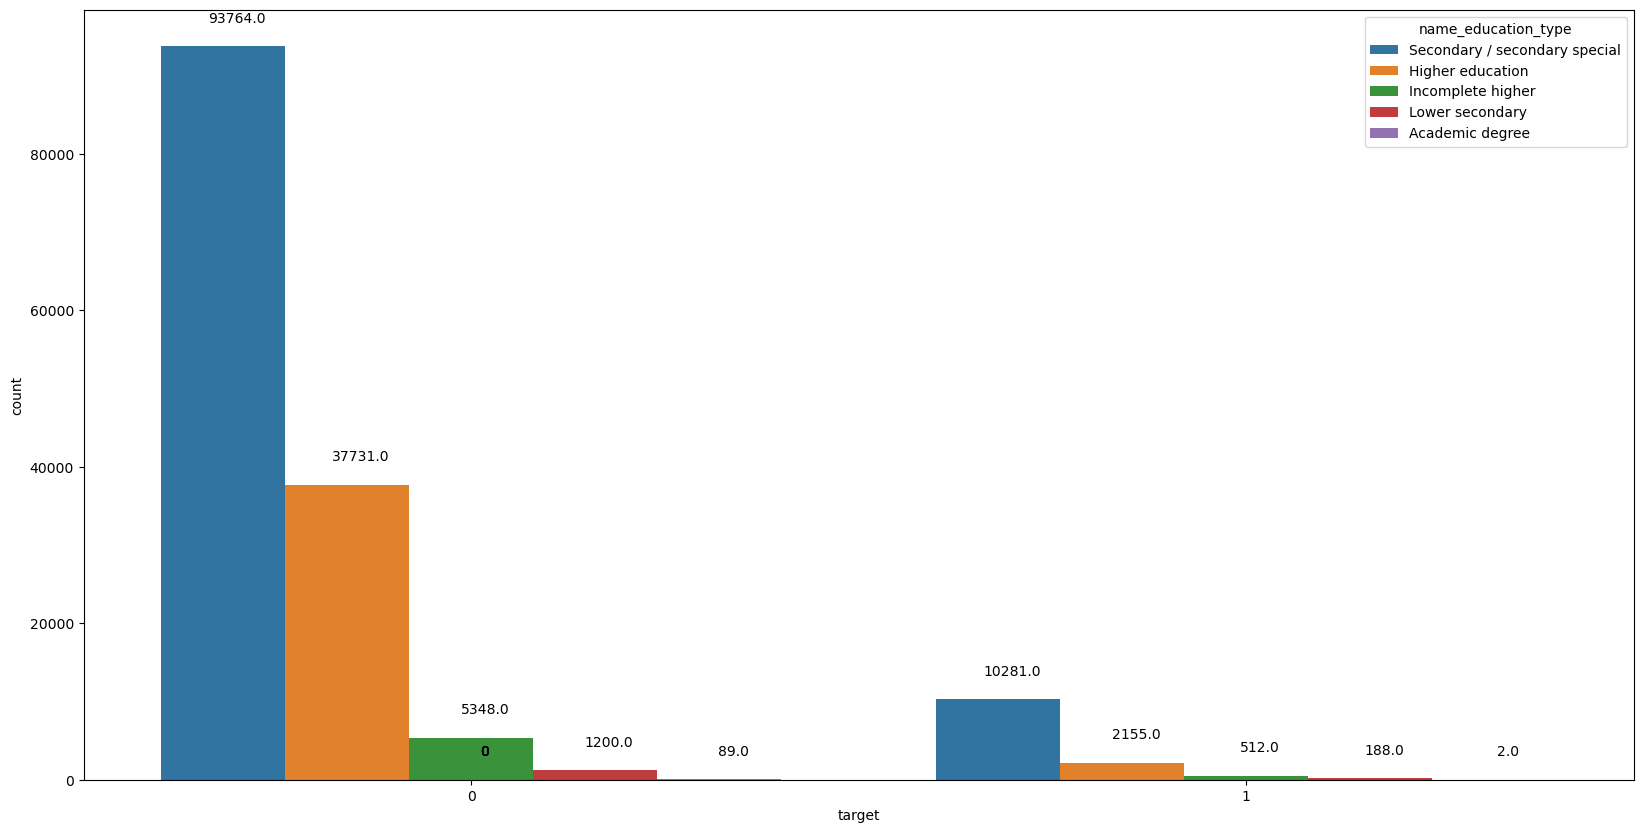

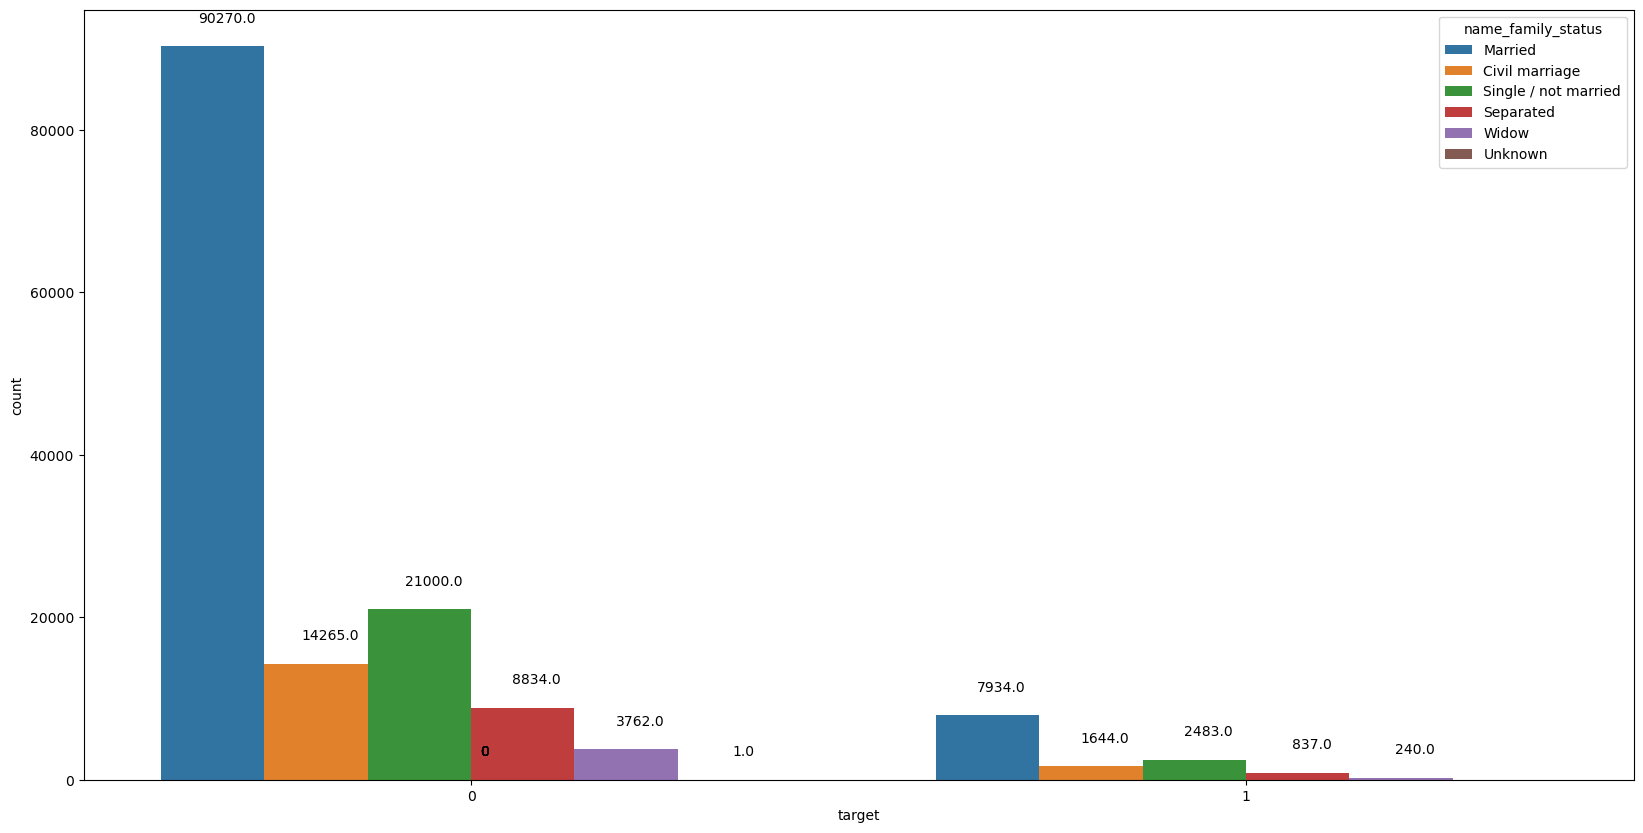

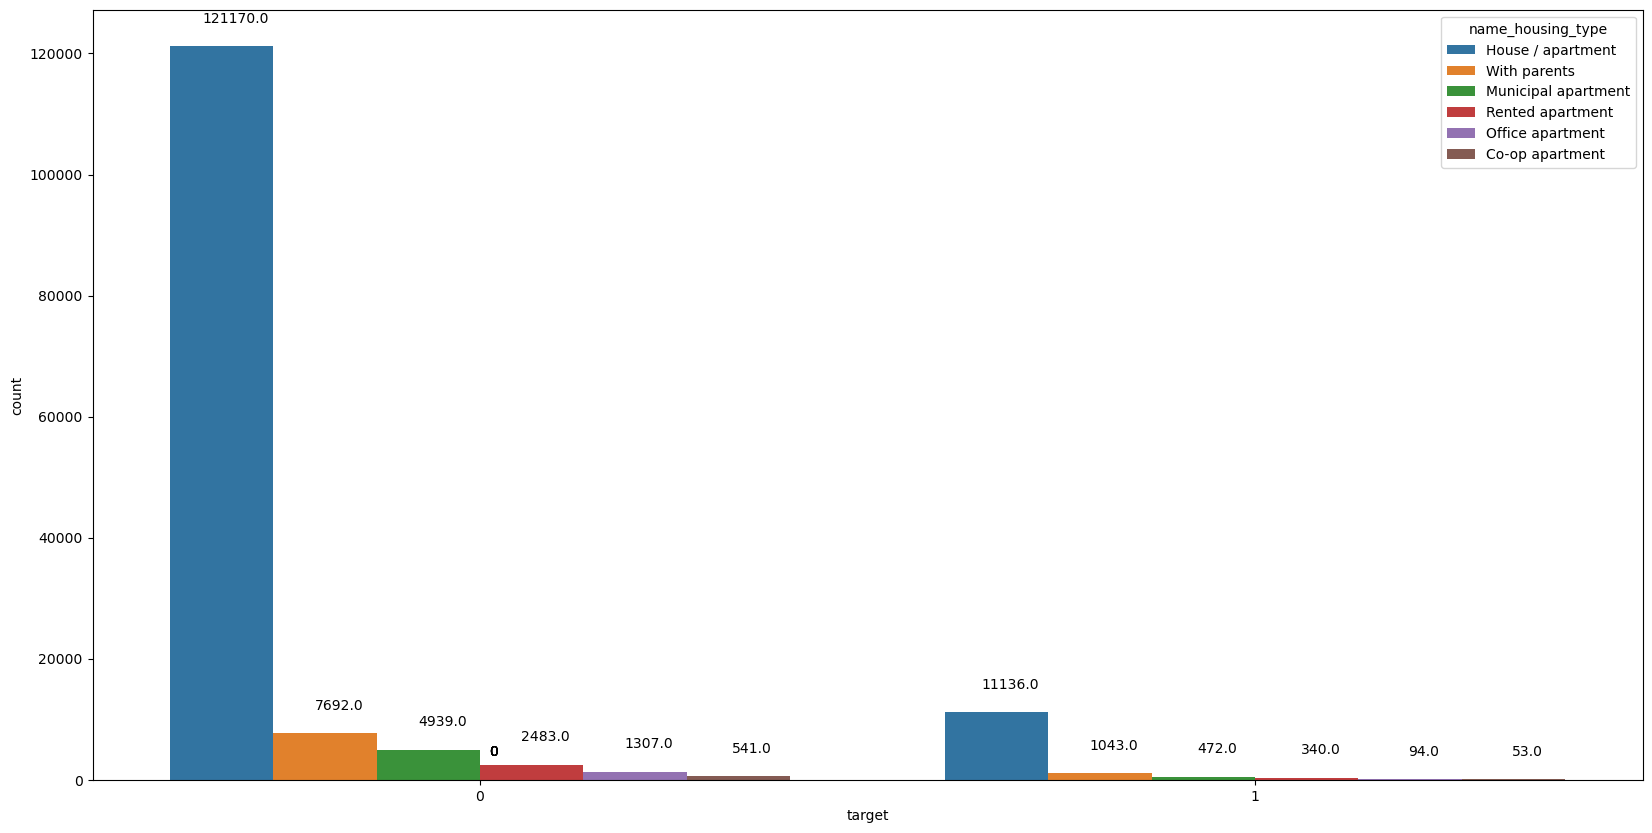

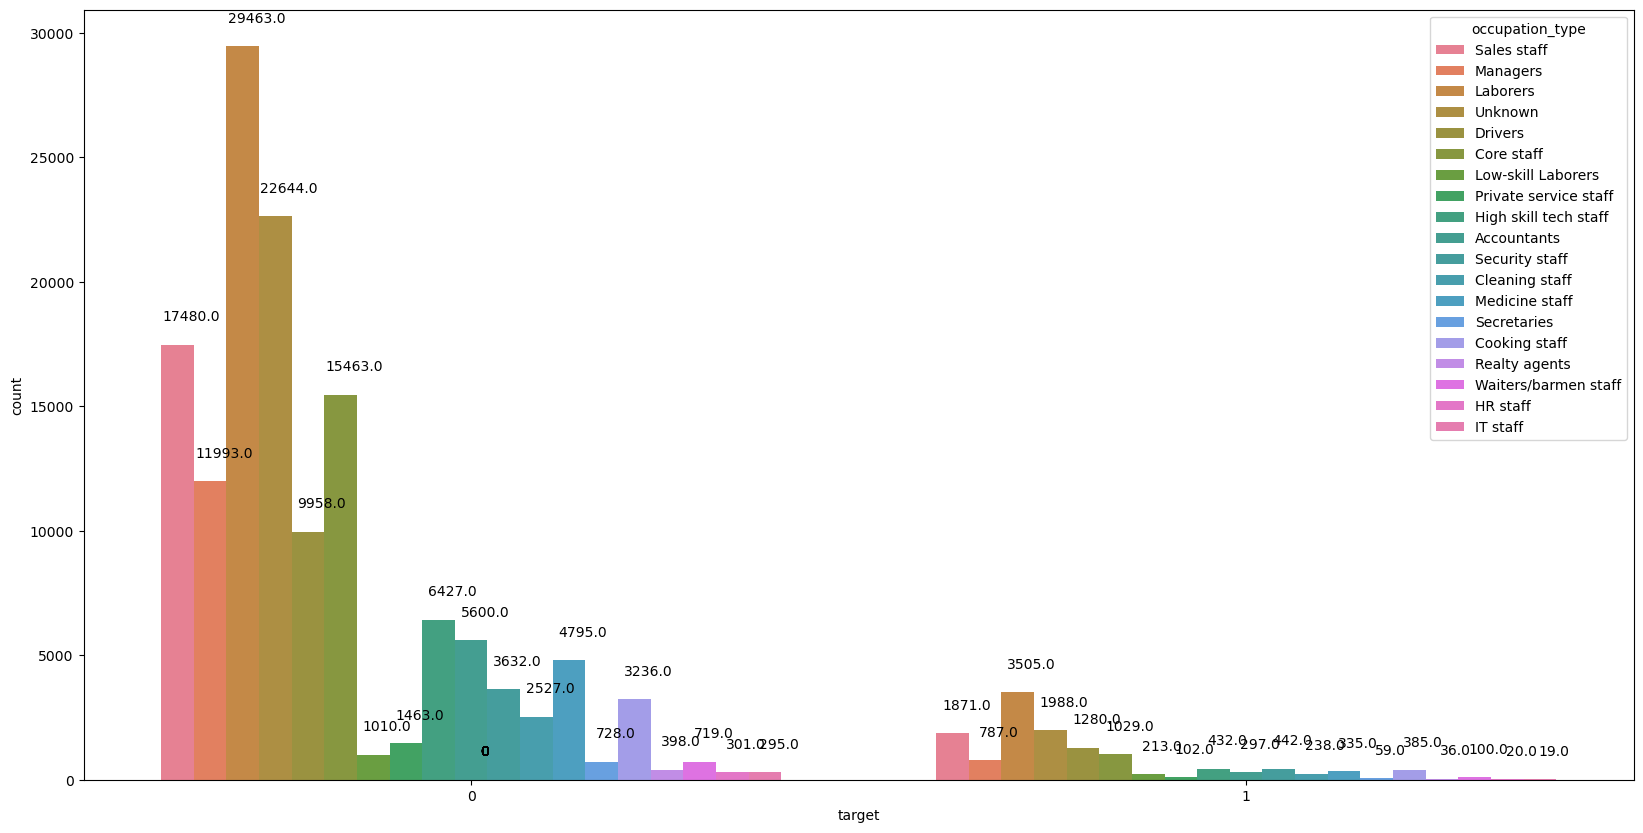

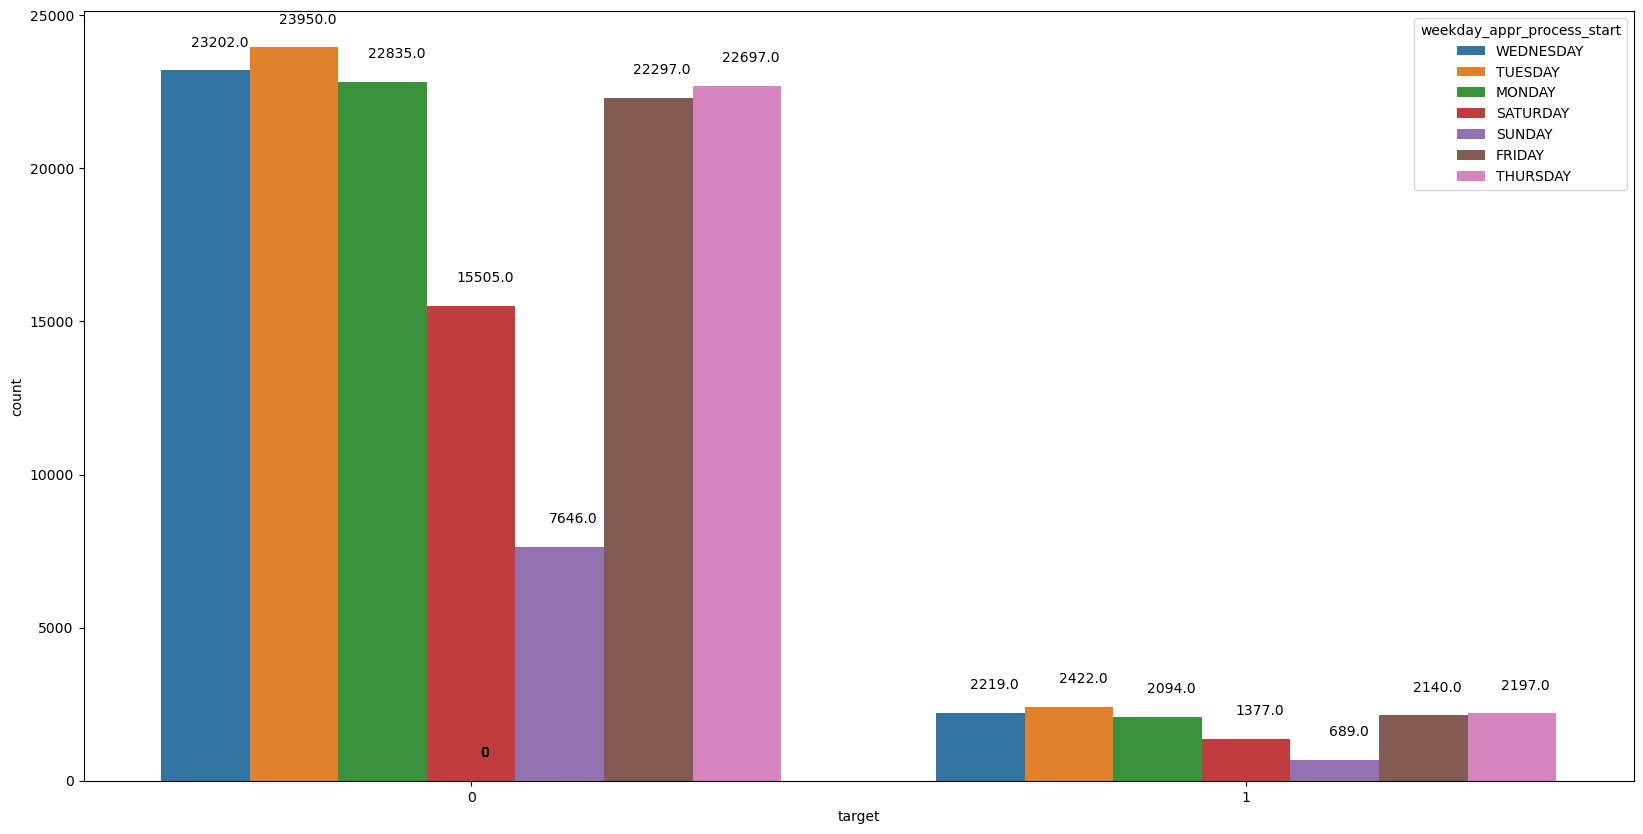

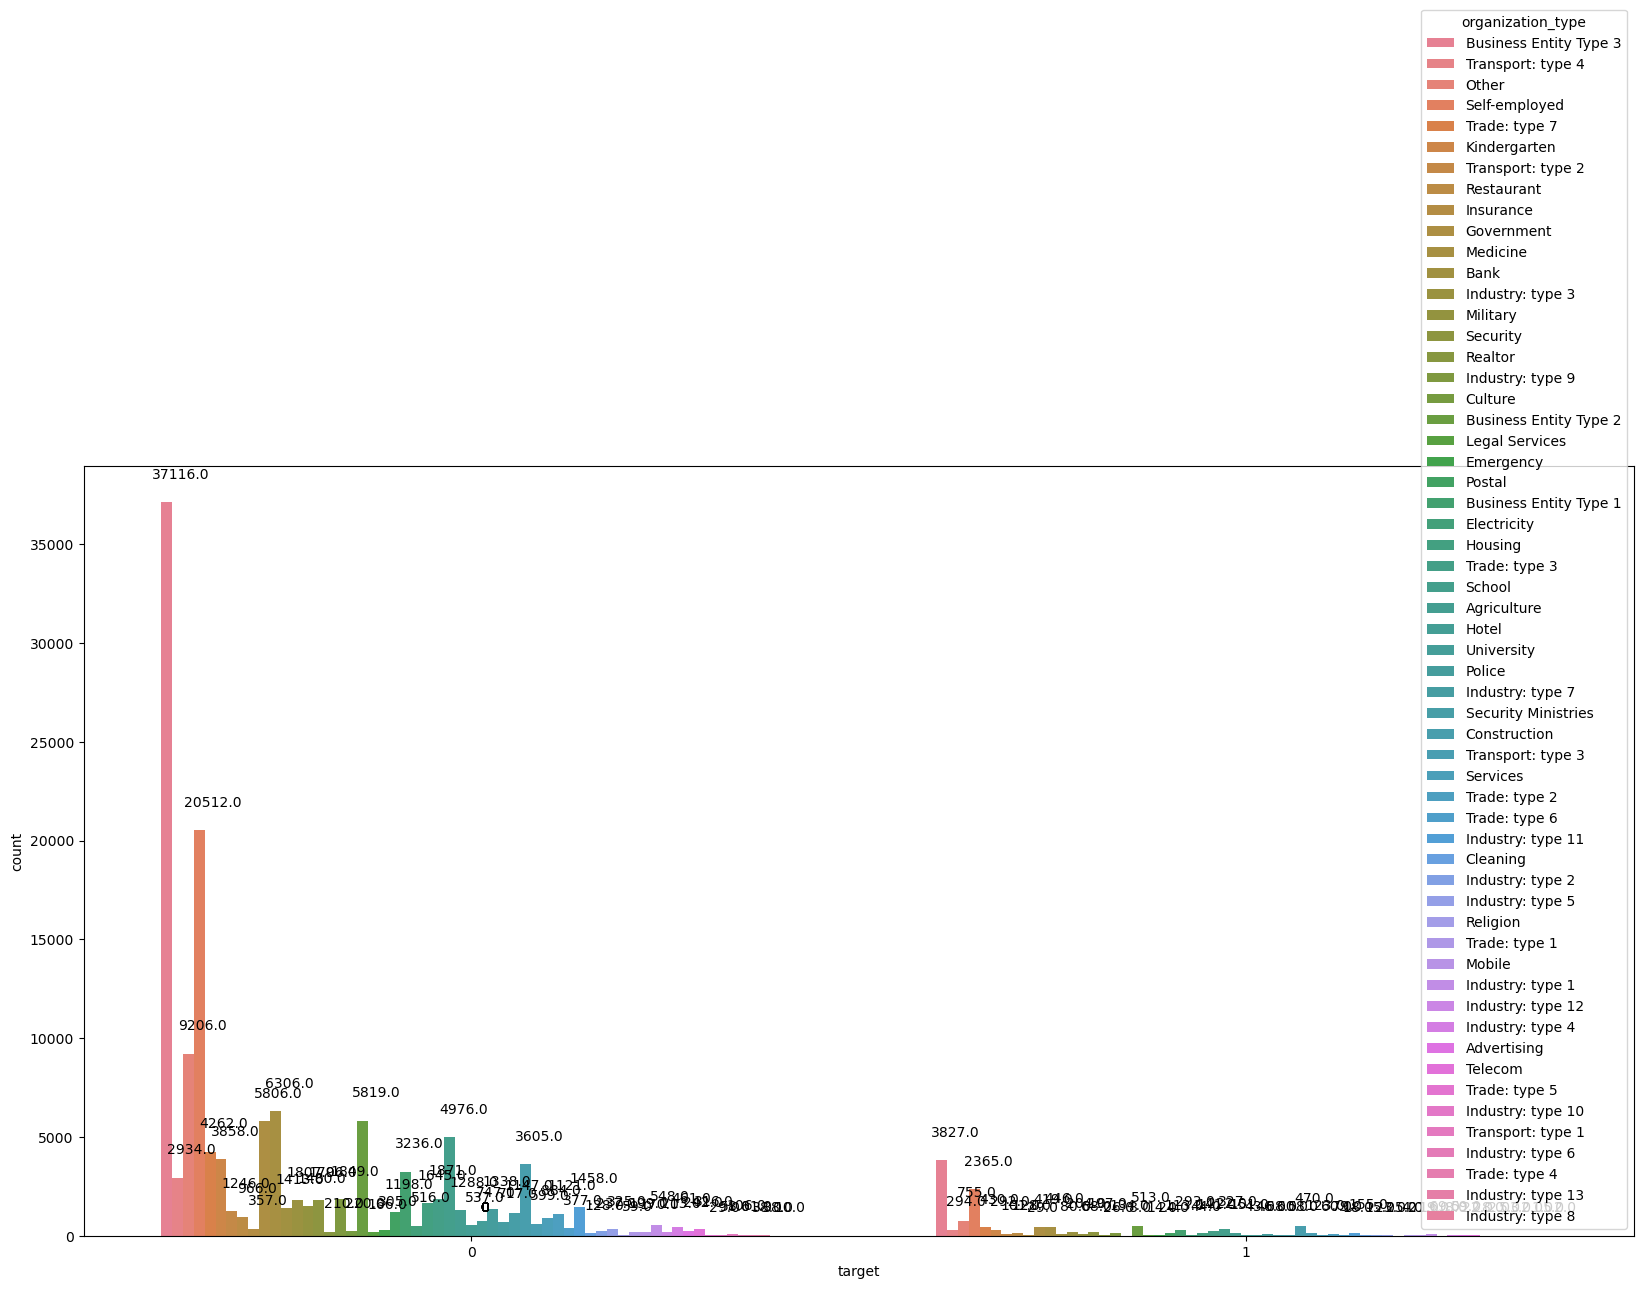

In [335]:
for i in df_clean:
    if (df_clean[i].dtype=='object'):
        plt.figure(figsize=(20,10))
        ax=sns.countplot(data=df_clean,x='target',hue=i)
        for p in ax.patches:
              ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (10, 20), textcoords = 'offset points')
        plt.show()

Graphs Interpretions:

* Cash loan clients exhibit a higher tendency to default compared to revolving loan customers.<br>
* Female applicants have a higher default rate (7209) than male applicants (5929).<br>
* Non-car owners constitute a larger proportion of defaults.<br>
* Non-homeowners show a higher default rate.<br>
* Unaccompanied applicants demonstrate the highest default rate (10871), followed by applicants in family settings (1501).<br>
* Working applicants contribute the most to defaulted home loan payments (9172).<br>
* Those with a secondary/secondary special education level show the highest default rate.<br>
* Married applicants surpass single applicants in defaulting payments.<br>
* Residents of houses/apartments have the highest default rate, followed by those living with parents.<br>
* Laborers represent the largest group among defaulters.<br>
* Tuesday applicants exhibit a higher default rate, likely due to the higher volume of applications.<br>
* Applicants working in Business Entity type 3 display a higher default rate.<br>

After careful analysis of the above relationship plots, I am looking to drop weekday_appr_process_start and flag_own_realty since the existence of both these variables dont particularly make any sense.

In [337]:
# List of column names to drop
columns_to_drop1 = ['weekday_appr_process_start', 'flag_own_realty']

# Drop the specified columns from the DataFrame
df_clean1 = df_clean.drop(columns=columns_to_drop1)

Lets do a sanity check

In [339]:
#  Shape of the Dataset
df_clean1.shape

(151270, 49)

The total number rows are 151270 and columns are 49 

In [341]:
# info of the dataset
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151270 entries, 0 to 184505
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   name_contract_type           151270 non-null  object 
 1   code_gender                  151270 non-null  object 
 2   flag_own_car                 151270 non-null  object 
 3   cnt_children                 151270 non-null  int64  
 4   amt_income_total             151270 non-null  int32  
 5   amt_credit                   151270 non-null  int32  
 6   amt_annuity                  151270 non-null  int32  
 7   amt_goods_price              151270 non-null  int32  
 8   name_type_suite              151270 non-null  object 
 9   name_income_type             151270 non-null  object 
 10  name_education_type          151270 non-null  object 
 11  name_family_status           151270 non-null  object 
 12  name_housing_type            151270 non-null  object 
 13  regi

My current shape of the Dataset has 151270 rows and 49 columns, and we currently have 4 Floats, 35 int and 10 object datatypes

Lets study the relationship between numerical variables amd Target Variables now. 

#### Relationship between Target and cnt_children

In [345]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('cnt_children')['target'].unique().reset_index()
print(unique_values)

    cnt_children  target
0              0  [0, 1]
1              1  [0, 1]
2              2  [0, 1]
3              3  [0, 1]
4              4  [1, 0]
5              5  [0, 1]
6              6  [0, 1]
7              7     [0]
8              8     [0]
9              9     [1]
10            10     [0]
11            12     [0]
12            14     [0]
13            19     [0]


In [346]:
# Group by cnt_children and count occurrences of each unique value in the target column
child_target_counts = df_clean1.groupby('cnt_children')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
child_target_counts.columns = ['target_0_count', 'target_1_count']

print("Unique values of cnt_children and total number of target occurrences per unique value of cnt_children:")
print(child_target_counts)

Unique values of cnt_children and total number of target occurrences per unique value of cnt_children:
              target_0_count  target_1_count
cnt_children                                
0                      88714            8295
1                      32916            3205
2                      14316            1380
3                       1926             215
4                        198              33
5                         43               4
6                          7               4
7                          5               0
8                          2               0
9                          0               2
10                         1               0
12                         2               0
14                         1               0
19                         1               0


From the provided data, it appears that there are relatively fewer observations with higher values of cnt_children. For example, there are very few observations with cnt_children values of 5, 6, 7, 8, 9, 10, 12, 14, and 19. This could be indicative of potential outliers or simply reflect the natural distribution of the data, where fewer individuals have a higher number of children.

Regarding the relationship with the target variable (target), we can observe that as the number of children increases, the number of observations tends to decrease. However, it's important to note that the proportion of observations where the target is 1 (indicating default) also tends to decrease as the number of children increases.

For instance, while the number of observations with 0 children is the highest, the proportion of defaulters (target=1) among them is relatively lower compared to those with higher counts of children. This trend continues as the number of children increases, where despite fewer observations, the proportion of defaulters tends to be higher.

#### Relationship between Target and amt_income_total column

In [349]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('amt_income_total')['target'].unique().reset_index()
print(unique_values)

      amt_income_total  target
0                26550     [0]
1                27000  [0, 1]
2                28800     [0]
3                29250     [0]
4                30600     [0]
...                ...     ...
1550           4500000     [0]
1551           9000000     [0]
1552          13500000     [0]
1553          18000090     [0]
1554         117000000     [1]

[1555 rows x 2 columns]


In [350]:
# Group by amt_income_total and count occurrences of each unique value in the target column
income_target_counts = df_clean1.groupby('amt_income_total')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
income_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
income_target_counts_sorted = income_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of amt_income_total and total number of target occurrences per unique value of amt_income_total (sorted by target_1_count):")
print(income_target_counts_sorted)

Unique values of amt_income_total and total number of target occurrences per unique value of amt_income_total (sorted by target_1_count):
                  target_0_count  target_1_count
amt_income_total                                
135000                     16508            1613
112500                     13517            1437
157500                     12467            1255
180000                     11918            1201
90000                       9381             938
...                          ...             ...
123786                         1               0
123646                         2               0
123525                         1               0
123480                         1               0
152550                         1               0

[1555 rows x 2 columns]


Each row corresponds to a unique income level, and the columns show the count of loan defaults and non-defaults for each income level.

For example:

For applicants with an income of 135,000, there were 16,108 non-defaults and 1,613 defaults. <br>
For applicants with an income of 112,500, there were 13,517 non-defaults and 1,437 defaults. <br>
And so on for other income levels. <br>
This information could be useful for assessing the relationship between income levels and loan defaults. It might indicate whether there's a correlation between income and the likelihood of defaulting on a loan.

The "target_1_count" column likely represents the count of loan defaults, while the "target_0_count" column represents the count of non-defaults.

However, there seems to be an inconsistency in the formatting of the income levels. Some are integers (e.g., 135,000), while others are floating-point numbers (e.g., 57,375.0). This inconsistency could be due to how the data was collected or processed.

#### Relationship between Target and amt_credit column

In [353]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('amt_credit')['target'].unique().reset_index()
print(unique_values)

      amt_credit  target
0          45000  [0, 1]
1          47970  [0, 1]
2          48519     [0]
3          49455  [0, 1]
4          49500     [0]
...          ...     ...
4624     3600000     [0]
4625     3860019     [0]
4626     4027680     [1]
4627     4031032     [0]
4628     4050000     [0]

[4629 rows x 2 columns]


In [354]:
# Group by amt_credit and count occurrences of each unique value in the target column
credit_target_counts = df_clean1.groupby('amt_credit')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
credit_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
credit_target_counts_sorted = credit_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of amt_credit and total number of target occurrences per unique value of amt_credit (sorted by target_1_count):")
print(credit_target_counts_sorted)

Unique values of amt_credit and total number of target occurrences per unique value of amt_credit (sorted by target_1_count):
            target_0_count  target_1_count
amt_credit                                
450000                4717             601
545040                1958             413
675000                3864             350
180000                3705             330
225000                3502             328
...                    ...             ...
930321                   3               0
930766                   3               0
336150                   2               0
931500                  10               0
4050000                  3               0

[4629 rows x 2 columns]


Each row represents a unique loan amount, and the columns show the count of loan defaults and non-defaults for each loan amount.

For example:

For loans with an amount of 450,000, there were 4,717 non-defaults and 601 defaults.
For loans with an amount of 545,040, there were 1,958 non-defaults and 413 defaults.

Since there is no particular pattern of credit thats affecting the target occurances, we could just keep this column for now and later when we study the correlation of variables we can decide if this column is needed or to be dropped.

#### Relationship between Target and amt_annuity

In [357]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('amt_annuity')['target'].unique().reset_index()
print(unique_values)

       amt_annuity target
0             1980    [0]
1             2187    [0]
2             2205    [0]
3             2295    [0]
4             2317    [0]
...            ...    ...
11880       213160    [0]
11881       213291    [0]
11882       220297    [0]
11883       225000    [0]
11884       258025    [0]

[11885 rows x 2 columns]


In [358]:
# Group by amt_annuity and count occurrences of each unique value in the target column
annuity_target_counts = df_clean1.groupby('amt_annuity')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
annuity_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
annuity_target_counts_sorted = annuity_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of amt_annuity and total number of target occurrences per unique value of amt_annuity (sorted by target_1_count):")
print(annuity_target_counts_sorted)

Unique values of amt_annuity and total number of target occurrences per unique value of amt_annuity (sorted by target_1_count):
             target_0_count  target_1_count
amt_annuity                                
9000                   3287             288
13500                  2870             163
26640                   562             132
31261                   363             108
29970                   295              95
...                     ...             ...
30429                     3               0
30402                     5               0
30388                     8               0
30375                     3               0
258025                    1               0

[11885 rows x 2 columns]


Each row represents a unique annuity amount, and the columns show the count of loan defaults and non-defaults for each annuity amount.

For example:

For annuity amounts of 9,000, there were 3,287 non-defaults and 288 defaults. <br>
For annuity amounts of 13,500, there were 2,870 non-defaults and 163 defaults. <br>
For annuity amounts of 26,640, there were 562 non-defaults and 132 defaults. <br>
And so on for other annuity amounts. <br>

Again, we cant find a particular relationship betweeen Amt_annuity and Target occurances, as defaults occur at random annuity ranges. So therefore, further correlation analysis is required to understand if this column is required or not

#### Relationship between Target and amt_goods_price

In [361]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('amt_goods_price')['target'].unique().reset_index()
print(unique_values)

     amt_goods_price  target
0              40500     [0]
1              45000  [0, 1]
2              49500  [0, 1]
3              54000  [0, 1]
4              58500  [0, 1]
..               ...     ...
716          3375000     [0]
717          3555000     [0]
718          3600000  [0, 1]
719          3712500     [0]
720          4050000     [0]

[721 rows x 2 columns]


In [362]:
# Group by amt_goods_price and count occurrences of each unique value in the target column
goods_target_counts = df_clean1.groupby('amt_goods_price')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
goods_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
goods_target_counts_sorted = goods_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of amt_goods_price and total number of target occurrences per unique value of amt_goods_price (sorted by target_1_count):")
print(goods_target_counts_sorted)

Unique values of amt_goods_price and total number of target occurrences per unique value of amt_goods_price (sorted by target_1_count):
                 target_0_count  target_1_count
amt_goods_price                                
450000                    12249            2020
225000                     9978            1183
675000                    10619            1134
900000                     7788             585
180000                     4849             475
...                         ...             ...
655704                        1               0
645799                        1               0
642915                        1               0
638302                        1               0
4050000                       3               0

[721 rows x 2 columns]


Once again a random occurance of defaults. No such pattern can we see in the above results. Lets continue with our analysis further.

#### Relationship between Target and region_population_relative

In [365]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('region_population_relative')['target'].unique().reset_index()
print(unique_values)

    region_population_relative  target
0                     0.000533  [1, 0]
1                     0.000938  [0, 1]
2                     0.001276  [0, 1]
3                     0.001333  [0, 1]
4                     0.001417  [0, 1]
..                         ...     ...
75                    0.031329  [0, 1]
76                    0.032561  [0, 1]
77                    0.035792  [0, 1]
78                    0.046220  [0, 1]
79                    0.072508  [0, 1]

[80 rows x 2 columns]


In [366]:
# Group by region_population_relative and count occurrences of each unique value in the target column
relative_population_target_counts = df_clean1.groupby('region_population_relative')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
relative_population_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
relative_population_target_counts_sorted = relative_population_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of region_population_relative and total number of target occurrences per unique value of region_population_relative (sorted by target_1_count):")
print(relative_population_target_counts_sorted)

Unique values of region_population_relative and total number of target occurrences per unique value of region_population_relative (sorted by target_1_count):
                            target_0_count  target_1_count
region_population_relative                                
0.035792                              7692             598
0.025164                              5161             569
0.030755                              5197             496
0.031329                              5055             493
0.020246                              2925             456
...                                    ...             ...
0.001276                               290              19
0.001333                               114              18
0.003541                               302              16
0.000533                                11               3
0.000938                                 8               2

[80 rows x 2 columns]


This result suggests that the majority of defaulted applicants come from a lesser to moderately populated region in comparison to those who come from highly population areas. Around 598 defaults occurs from applicants who live in a region thats population score is 0.035792 and highest <br> populated region being 0.072508. 

#### Relationship between Target and days_birth

In [369]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('days_birth')['target'].unique().reset_index()
print(unique_values)

       days_birth  target
0          -25180     [0]
1          -25175     [0]
2          -25170     [0]
3          -25165     [0]
4          -25155     [0]
...           ...     ...
16007       -7680  [0, 1]
16008       -7678  [0, 1]
16009       -7676     [0]
16010       -7673     [0]
16011       -7489     [0]

[16012 rows x 2 columns]


In [370]:
# Convert days_birth to years
df_clean1['age'] = df_clean1['days_birth'] / -365.25

# Group by age_years and count occurrences of each unique value in the target column
age_target_counts = df_clean1.groupby('age')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
age_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
age_target_counts_sorted = age_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of age and total number of target occurrences per unique value of age (sorted by target_1_count):")
print(age_target_counts_sorted)

Unique values of age and total number of target occurrences per unique value of age (sorted by target_1_count):
           target_0_count  target_1_count
age                                      
31.665982              12               9
28.164271              16               7
28.158795              10               7
34.485969              13               6
36.687201              15               6
...                   ...             ...
44.271047              10               0
44.268309              14               0
44.265572              14               0
44.249144              13               0
68.939083               1               0

[16012 rows x 2 columns]


The data provided is a tabular representation showing the unique values of age (converted from days_birth to years) and the total number of occurrences of each unique age value, sorted by the count of the target variable 
(either 0 or 1).<br> Here's an explanation:

age: This column represents the age of individuals. It seems to have been converted from days_birth to years for better interpretability. Each unique value in this column represents a specific age.

target_0_count: This column shows the total number of occurrences of the target variable with the value 0 for each unique age value. In other words, it represents the count of individuals who do not meet a certain condition or event (target = 0) at each age.

target_1_count: This column shows the total number of occurrences of the target variable with the value 1 for each unique age value. It represents the count of individuals who meet a certain condition or event (target = 1) at each age.

As the result denotes above, the highest number of default occurances are at the age of 31 to 32 years of age. And as we scroll down the age group in which the majority of defaults are prevelant are between 25 to 50 years of age. That explains the prime <br> age of an applicant during their working and responsibilities stage of life. This insights are very important as this will help us create a better model to better understand the trends. We may have to convert the column <br> days_birth to age in years as it will be much easier to interpret our results.

#### Relationship between Target and days_id_publish

In [373]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('days_id_publish')['target'].unique().reset_index()
print(unique_values)

      days_id_publish  target
0               -6383     [0]
1               -6274     [0]
2               -6265     [0]
3               -6263     [0]
4               -6259     [0]
...               ...     ...
6039               -4  [1, 0]
6040               -3  [0, 1]
6041               -2  [0, 1]
6042               -1  [0, 1]
6043                0  [0, 1]

[6044 rows x 2 columns]


In [374]:
# Convert days_birth to years
df_clean1['id_change_years'] = df_clean1['days_id_publish'] / -365.25

# Group by age_years and count occurrences of each unique value in the target column
id_target_counts = df_clean1.groupby('id_change_years')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
id_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
id_target_counts_sorted = id_target_counts.sort_values(by='id_change_years', ascending=True)

print("Unique values of id_change_years and total number of target occurrences per unique value of id_change_years (sorted by target_1_count):")
print(id_target_counts_sorted)

Unique values of id_change_years and total number of target occurrences per unique value of id_change_years (sorted by target_1_count):
                 target_0_count  target_1_count
id_change_years                                
-0.000000                     8               1
 0.002738                    28               4
 0.005476                    24               3
 0.008214                    26               3
 0.010951                    28               6
...                         ...             ...
 17.136208                    1               0
 17.147159                    1               0
 17.152635                    1               0
 17.177276                    1               0
 17.475702                    1               0

[6044 rows x 2 columns]


#### Relationship between Target and cnt_fam_members

In [376]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('cnt_fam_members')['target'].unique().reset_index()
print(unique_values)

    cnt_fam_members  target
0                 1  [0, 1]
1                 2  [0, 1]
2                 3  [0, 1]
3                 4  [0, 1]
4                 5  [0, 1]
5                 6  [1, 0]
6                 7  [0, 1]
7                 8  [0, 1]
8                 9     [0]
9                10  [0, 1]
10               11     [1]
11               12     [0]
12               14     [0]
13               16     [0]
14               20     [0]


In [377]:
# Group by cnt_fam_members and count occurrences of each unique value in the target column
fam_target_counts = df_clean1.groupby('cnt_fam_members')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
fam_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
fam_target_counts_sorted = fam_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of cnt_fam_members and total number of target occurrences per unique value of cnt_fam_members (sorted by target_1_count):")
print(fam_target_counts_sorted)

Unique values of cnt_fam_members and total number of target occurrences per unique value of cnt_fam_members (sorted by target_1_count):
                 target_0_count  target_1_count
cnt_fam_members                                
2                         67917            6147
1                         26520            2772
3                         28415            2728
4                         13205            1248
5                          1831             201
6                           185              32
7                            40               4
8                             7               4
10                            2               1
11                            0               1
9                             5               0
12                            1               0
14                            2               0
16                            1               0
20                            1               0


Family members with as low as 2 has the highest number of default occurances. This ranges from 2 to 11 members where the defaults are still prevelant. But the highest remain somehwere between 1 to 5 members family is generally high risk <br> to default their payments. This could mean a lot of things, with more expenses in the family due to increase in number of heads in a households, difficulty to keep with monthly payments are also in the rise. This is a good insight <br> for our modeling and statistical testing purposes.

#### Relationship between Target and hour_appr_process_start

In [380]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('hour_appr_process_start')['target'].unique().reset_index()
print(unique_values)

    hour_appr_process_start  target
0                         0  [0, 1]
1                         1  [0, 1]
2                         2  [0, 1]
3                         3  [0, 1]
4                         4  [0, 1]
5                         5  [0, 1]
6                         6  [0, 1]
7                         7  [0, 1]
8                         8  [0, 1]
9                         9  [0, 1]
10                       10  [0, 1]
11                       11  [0, 1]
12                       12  [0, 1]
13                       13  [0, 1]
14                       14  [0, 1]
15                       15  [0, 1]
16                       16  [0, 1]
17                       17  [0, 1]
18                       18  [0, 1]
19                       19  [0, 1]
20                       20  [0, 1]
21                       21  [0, 1]
22                       22  [0, 1]
23                       23  [0, 1]


In [381]:
# Group by hour_appr_process_start and count occurrences of each unique value in the target column
hour_target_counts = df_clean1.groupby('hour_appr_process_start')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
hour_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
hour_target_counts_sorted = hour_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of hour_appr_process_start and total number of target occurrences per unique value of hour_appr_process_start (sorted by target_1_count):")
print(hour_target_counts_sorted)

Unique values of hour_appr_process_start and total number of target occurrences per unique value of hour_appr_process_start (sorted by target_1_count):
                         target_0_count  target_1_count
hour_appr_process_start                                
11                                16474            1586
10                                16280            1555
12                                15198            1488
13                                13967            1323
14                                12705            1176
9                                 11492            1168
15                                11752            1038
16                                 9807             848
8                                  6181             692
17                                 7430             526
7                                  3760             448
6                                  2377             340
18                                 4541             338
5       

Well, this this is an equal kind of distribution where defaults to occur at all the hours that the application was processed. Its not yet sure as to how important this column is required, as we cant come to a concrete conclusion <br> based on this information to decide upon whether an applicant can default with their payments or not. This is just a random piece of information which is of no particular help with regards to our analysis. I may decide to drop this column later.

#### Relationship between Target and obs_30_cnt_social_circle

In [384]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('obs_30_cnt_social_circle')['target'].unique().reset_index()
print(unique_values)

    obs_30_cnt_social_circle  target
0                          0  [0, 1]
1                          1  [0, 1]
2                          2  [0, 1]
3                          3  [0, 1]
4                          4  [0, 1]
5                          5  [0, 1]
6                          6  [0, 1]
7                          7  [0, 1]
8                          8  [0, 1]
9                          9  [0, 1]
10                        10  [0, 1]
11                        11  [0, 1]
12                        12  [0, 1]
13                        13  [0, 1]
14                        14  [0, 1]
15                        15  [0, 1]
16                        16  [1, 0]
17                        17  [0, 1]
18                        18     [0]
19                        19  [0, 1]
20                        20  [0, 1]
21                        21     [0]
22                        22  [0, 1]
23                        23  [0, 1]
24                        24     [0]
25                        25  [1, 0]
2

In [385]:
# Group by obs_30_cnt_social_circle and count occurrences of each unique value in the target column
obs30_target_counts = df_clean1.groupby('obs_30_cnt_social_circle')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
obs30_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
obs30_target_counts_sorted = obs30_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of obs_30_cnt_social_circle and total number of target occurrences per unique value of obs_30_cnt_social_circle (sorted by target_1_count):")
print(obs30_target_counts_sorted)

Unique values of obs_30_cnt_social_circle and total number of target occurrences per unique value of obs_30_cnt_social_circle (sorted by target_1_count):
                          target_0_count  target_1_count
obs_30_cnt_social_circle                                
0                                  73713            6831
1                                  22221            2100
2                                  13597            1314
3                                   9128             880
4                                   6382             672
5                                   4208             418
6                                   2883             292
7                                   1995             199
8                                   1356             127
9                                    892              94
10                                   579              61
12                                   298              41
11                                   363        

Again, I am quite confused as to why we need this piece of information. The least number of observations has the highest default occurances. So as the number of observation increases the default occurance decreases. We need further evidence to help <br> me understand the importance of this column in this data.

Possible Interpretations: This is the least I could interpret with the data that we have.

* Individuals with fewer observations of social circles may have more stable or predictable social environments, leading to higher counts in both target categories.<br>
* Conversely, individuals with a higher count of observations might have more dynamic social interactions, making it harder to predict their likelihood of meeting the condition represented by the target variable.

#### Relationship between Target and def_30_cnt_social_circle

In [388]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('def_30_cnt_social_circle')['target'].unique().reset_index()
print(unique_values)

   def_30_cnt_social_circle  target
0                         0  [0, 1]
1                         1  [0, 1]
2                         2  [0, 1]
3                         3  [0, 1]
4                         4  [0, 1]
5                         5  [0, 1]
6                         6  [0, 1]
7                         8     [0]
8                        34     [0]


In [389]:
# Group by def_30_cnt_social_circle and count occurrences of each unique value in the target column
def30_target_counts = df_clean1.groupby('def_30_cnt_social_circle')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
def30_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
def30_target_counts_sorted = def30_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of def_30_cnt_social_circle and total number of target occurrences per unique value of def_30_cnt_social_circle (sorted by target_1_count):")
print(def30_target_counts_sorted)

Unique values of def_30_cnt_social_circle and total number of target occurrences per unique value of def_30_cnt_social_circle (sorted by target_1_count):
                          target_0_count  target_1_count
def_30_cnt_social_circle                                
0                                 123003           11198
1                                  12225            1528
2                                   2258             305
3                                    509              81
4                                     98              22
5                                     30               3
6                                      7               1
8                                      1               0
34                                     1               0


The lower the number results in higher defaults. The range is between 0 and 34. Does this denote some kind score which was derived. This possibly denotes the count of defaulted loans or similar events in the last 30 days for each individual. The number of defaults increases with <br> lesser counts of defaulted loans? I am confused. 

#### Relationship between Target and obs_60_cnt_social_circle

In [392]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('obs_60_cnt_social_circle')['target'].unique().reset_index()
print(unique_values)

    obs_60_cnt_social_circle  target
0                          0  [0, 1]
1                          1  [0, 1]
2                          2  [0, 1]
3                          3  [0, 1]
4                          4  [0, 1]
5                          5  [0, 1]
6                          6  [0, 1]
7                          7  [0, 1]
8                          8  [0, 1]
9                          9  [0, 1]
10                        10  [0, 1]
11                        11  [0, 1]
12                        12  [0, 1]
13                        13  [0, 1]
14                        14  [0, 1]
15                        15  [0, 1]
16                        16  [1, 0]
17                        17  [0, 1]
18                        18  [0, 1]
19                        19  [0, 1]
20                        20     [0]
21                        21     [0]
22                        22  [0, 1]
23                        23  [0, 1]
24                        24     [0]
25                        25  [1, 0]
2

In [393]:
# Group by obs_60_cnt_social_circle and count occurrences of each unique value in the target column
obs60_target_counts = df_clean1.groupby('obs_60_cnt_social_circle')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
obs60_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
obs60_target_counts_sorted = obs60_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of obs_60_cnt_social_circle and total number of target occurrences per unique value of obs_60_cnt_social_circle (sorted by target_1_count):")
print(obs60_target_counts_sorted)

Unique values of obs_60_cnt_social_circle and total number of target occurrences per unique value of obs_60_cnt_social_circle (sorted by target_1_count):
                          target_0_count  target_1_count
obs_60_cnt_social_circle                                
0                                  74053            6866
1                                  22264            2104
2                                  13595            1302
3                                   9075             879
4                                   6278             669
5                                   4148             418
6                                   2844             285
7                                   1994             195
8                                   1303             123
9                                    877              95
10                                   563              58
11                                   354              41
12                                   285        

Very similar to the obs30 column, as the number of observations increases the defaults reduces and vice versa. Again is this an important piece of information that is required for our modeling purposes is something which I am unable to understand. I understand this is something <br> to do with the number of days the payments passed their due date and if it went or stayed on beyond 30 days or 60 days. But the Obeservations of social circle and their relationship with defaults I am yet to come to a concrete conclusion. Until then <br> I will comtinue to keep these columns

#### Relationship between Target and obs_60_cnt_social_circle

In [396]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('def_60_cnt_social_circle')['target'].unique().reset_index()
print(unique_values)

   def_60_cnt_social_circle  target
0                         0  [0, 1]
1                         1  [0, 1]
2                         2  [0, 1]
3                         3  [0, 1]
4                         4  [0, 1]
5                         5  [0, 1]
6                         6     [0]
7                        24     [0]


In [397]:
# Group by def_60_cnt_social_circle and count occurrences of each unique value in the target column
def60_target_counts = df_clean1.groupby('def_60_cnt_social_circle')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
def60_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
def60_target_counts_sorted = def60_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of def_60_cnt_social_circle and total number of target occurrences per unique value of def_60_cnt_social_circle (sorted by target_1_count):")
print(def60_target_counts_sorted)

Unique values of def_60_cnt_social_circle and total number of target occurrences per unique value of def_60_cnt_social_circle (sorted by target_1_count):
                          target_0_count  target_1_count
def_60_cnt_social_circle                                
0                                 127083           11648
1                                   9398            1245
2                                   1328             180
3                                    251              52
4                                     58              10
5                                     11               3
6                                      2               0
24                                     1               0


I have noticed some kind of trend between Obs and Def (both 30 and 60) conlumns that the number of observations are between 0 and 350 (aprox) on Obs columns whereas the number of observations range between 0 to 35(approx) in def columns. Does this denote year and Month observations? <br> As always the lower the number of observations the defaults number increases. More research is required as I am quite reluctant to delete these columns as of now since this relates to the loan default situation which is crucial for our analysis.

#### Relationship between Target and days_last_phone_change

In [400]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('days_last_phone_change')['target'].unique().reset_index()
print(unique_values)

      days_last_phone_change  target
0                      -4185     [0]
1                      -4173     [0]
2                      -4153     [0]
3                      -4131     [0]
4                      -4128     [0]
...                      ...     ...
3653                      -4  [0, 1]
3654                      -3  [0, 1]
3655                      -2  [0, 1]
3656                      -1  [0, 1]
3657                       0  [0, 1]

[3658 rows x 2 columns]


In [401]:
# Convert days_last_phone_change to years
df_clean1['last_phone_change_years'] = df_clean1['days_last_phone_change'] / -365.25

# Group by age_years and count occurrences of each unique value in the target column
phone_change_counts = df_clean1.groupby('last_phone_change_years')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
phone_change_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
phone_change_counts_sorted = phone_change_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of phone_change_years and total number of target occurrences per unique value of phone_change_years (sorted by target_1_count):")
print(phone_change_counts_sorted)

Unique values of phone_change_years and total number of target occurrences per unique value of phone_change_years (sorted by target_1_count):
                         target_0_count  target_1_count
last_phone_change_years                                
-0.000000                         15557            1820
 0.002738                          1293             138
 0.005476                          1020              68
 0.010951                           680              49
 0.008214                           839              47
...                                 ...             ...
 8.021903                             3               0
 8.024641                            10               0
 8.027379                            11               0
 8.032854                            11               0
 11.457906                            1               0

[3658 rows x 2 columns]


I have converted the days to years for easy interpretation of the results. The range is somewhere between 0 to 17 years of phone change observatuons. The highest number of defaults occurs within one year i.e. 0. 

Possible Interpretations:
Behavioral Patterns: Individuals who recently changed their phone numbers may exhibit different behaviors or characteristics compared to those who have not changed their numbers for a longer time. This could include changes in contact information due to relocation, job changes, or other life events.

Risk Assessment: The duration since the last phone number change could be a proxy for stability or reliability. Individuals who frequently change their phone numbers may be perceived as less stable, potentially affecting their creditworthiness or risk profile.

Modeling Considerations: Understanding the relationship between the duration since the last phone number change and the target variable is essential for predictive modeling. This information can be used as a feature in predictive models to improve their accuracy in predicting the target variable.

#### Relationship between Target and amt_req_credit_bureau_hour

In [404]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('amt_req_credit_bureau_hour')['target'].unique().reset_index()
print(unique_values)

   amt_req_credit_bureau_hour  target
0                           0  [0, 1]
1                           1  [1, 0]
2                           2  [0, 1]
3                           3     [0]
4                           4     [0]


In [405]:
# Group by amt_req_credit_bureau_hour and count occurrences of each unique value in the target column
onehr_target_counts = df_clean1.groupby('amt_req_credit_bureau_hour')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
onehr_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
onehr_target_counts_sorted = onehr_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of amt_req_credit_bureau_hour and total number of target occurrences per unique value of amt_req_credit_bureau_hour (sorted by target_1_count):")
print(onehr_target_counts_sorted)

Unique values of amt_req_credit_bureau_hour and total number of target occurrences per unique value of amt_req_credit_bureau_hour (sorted by target_1_count):
                            target_0_count  target_1_count
amt_req_credit_bureau_hour                                
0                                   137268           13054
1                                      827              78
2                                       30               6
3                                        6               0
4                                        1               0


Here's an interpretation of the data:

Insights:
Effect of Credit Bureau Enquiries:
The majority of clients, represented by target_0_count, did not default on their loans regardless of the number of enquiries made to the Credit Bureau within one hour before the loan application.
There's a noticeable decrease in the number of clients who defaulted (target_1_count) as the number of enquiries increases. This suggests that clients with a higher number of Credit Bureau enquiries within one hour before the loan application are less likely to default.
Possible Interpretations:
Creditworthiness Assessment:

A higher number of enquiries to the Credit Bureau may indicate that the lender is conducting more thorough credit assessments on the applicants.
Clients with multiple enquiries within a short timeframe might be perceived as higher risk by lenders, leading to increased scrutiny during the loan approval process.
Fraud Detection:

Multiple enquiries within a short timeframe may also raise flags for potential fraud or misrepresentation. Lenders might be more cautious when dealing with such applications.

#### Relationship between Target and amt_req_credit_bureau_day

In [408]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('amt_req_credit_bureau_day')['target'].unique().reset_index()
print(unique_values)

   amt_req_credit_bureau_day  target
0                          0  [0, 1]
1                          1  [0, 1]
2                          2  [0, 1]
3                          3  [0, 1]
4                          4  [0, 1]
5                          5     [0]
6                          6     [0]
7                          9     [0]


In [409]:
# Group by amt_req_credit_bureau_day and count occurrences of each unique value in the target column
oneday_target_counts = df_clean1.groupby('amt_req_credit_bureau_day')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
oneday_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
oneday_target_counts_sorted = oneday_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of amt_req_credit_bureau_day and total number of target occurrences per unique value of amt_req_credit_bureau_day (sorted by target_1_count):")
print(oneday_target_counts_sorted)

Unique values of amt_req_credit_bureau_day and total number of target occurrences per unique value of amt_req_credit_bureau_day (sorted by target_1_count):
                           target_0_count  target_1_count
amt_req_credit_bureau_day                                
0                                  137346           13052
1                                     667              76
2                                      61               6
4                                      17               3
3                                      28               1
5                                       5               0
6                                       6               0
9                                       2               0


Again Majority of defaulted applicants had 0 inquiries to the credit Bureau 1 day before application. This denotes that strengent practices have to be undertaken for future to avoid huge number of defaults

Let's interpret the data:

amt_req_credit_bureau_day: This column indicates the number of enquiries made to the Credit Bureau about the client within one day before the loan application.

target_0_count (not defaulted payments): This column shows the total number of occurrences of the target variable with the value 0 (not defaulted) for each unique value of amt_req_credit_bureau_day. It represents the count of clients who did not default on their loans for each number of enquiries made to the Credit Bureau one day before the loan application.

target_1_count (defaulted payments): This column shows the total number of occurrences of the target variable with the value 1 (defaulted) for each unique value of amt_req_credit_bureau_day. It represents the count of clients who defaulted on their loans for each number of enquiries made to the Credit Bureau one day before the loan application.

Insights:
Credit Bureau Enquiries Impact:
Majority of clients, represented by target_0_count, did not default on their loans regardless of the number of enquiries made to the Credit Bureau one day before the loan application.
There is a decrease in the number of clients who defaulted (target_1_count) as the number of enquiries increases, although the numbers are relatively low.
Possible Interpretations:
Creditworthiness Assessment:

Lenders may have stricter criteria or be more cautious with applicants who have a higher number of enquiries to the Credit Bureau one day before the loan application.
Conversely, applicants with fewer enquiries may be perceived as lower risk.
Data Quality:

The low number of defaulted payments across all levels of enquiries suggests that the number of enquiries made to the Credit Bureau one day before the loan application might not be a strong predictor of loan default on its own.

#### Relationship between Target and amt_req_credit_bureau_week

In [412]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('amt_req_credit_bureau_week')['target'].unique().reset_index()
print(unique_values)

   amt_req_credit_bureau_week  target
0                           0  [0, 1]
1                           1  [0, 1]
2                           2  [0, 1]
3                           3  [0, 1]
4                           4  [0, 1]
5                           5  [0, 1]
6                           6  [0, 1]
7                           7     [0]


In [413]:
# Group by amt_req_credit_bureau_week and count occurrences of each unique value in the target column
oneweek_target_counts = df_clean1.groupby('amt_req_credit_bureau_week')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
oneweek_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
oneweek_target_counts_sorted = oneweek_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of amt_req_credit_bureau_week and total number of target occurrences per unique value of amt_req_credit_bureau_week (sorted by target_1_count):")
print(oneweek_target_counts_sorted)

Unique values of amt_req_credit_bureau_week and total number of target occurrences per unique value of amt_req_credit_bureau_week (sorted by target_1_count):
                            target_0_count  target_1_count
amt_req_credit_bureau_week                                
0                                   133676           12740
1                                     4267             375
2                                      121              13
3                                       33               3
4                                       14               3
5                                        8               2
6                                       11               2
7                                        2               0


Insights:

Credit Bureau Inquiries Impact:

Majority of clients, represented by target_0_count, did not default on their loans regardless of the number of inquiries made to the Credit Bureau within one week before the loan application. <br>
There is a decrease in the number of clients who defaulted (target_1_count) as the number of inquiries increases, although the numbers are relatively low. <br>
Possible Interpretations:

Creditworthiness Assessment:

Lenders may consider applicants with a higher number of inquiries within one week before the loan application to be higher risk, leading to more cautious lending decisions.<br>
Conversely, applicants with fewer inquiries within one week may be perceived as lower risk. <br>

Data Quality:

The low number of defaulted payments across all levels of inquiries within one week suggests that this feature alone might not be a strong predictor of loan default.

#### Relationship between Target and amt_req_credit_bureau_mon

In [416]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('amt_req_credit_bureau_mon')['target'].unique().reset_index()
print(unique_values)

    amt_req_credit_bureau_mon  target
0                           0  [0, 1]
1                           1  [0, 1]
2                           2  [0, 1]
3                           3  [0, 1]
4                           4  [0, 1]
5                           5  [0, 1]
6                           6  [0, 1]
7                           7  [0, 1]
8                           8  [0, 1]
9                           9  [0, 1]
10                         10  [0, 1]
11                         11  [0, 1]
12                         12  [0, 1]
13                         13  [0, 1]
14                         14     [0]
15                         15  [0, 1]
16                         16     [0]
17                         17  [1, 0]
18                         18     [0]
19                         19     [0]
20                         24     [0]


In [417]:
# Group by amt_req_credit_bureau_mon and count occurrences of each unique value in the target column
onemonth_target_counts = df_clean1.groupby('amt_req_credit_bureau_mon')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
onemonth_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
onemonth_target_counts_sorted = onemonth_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of amt_req_credit_bureau_mon and total number of target occurrences per unique value of amt_req_credit_bureau_mon (sorted by target_1_count):")
print(onemonth_target_counts_sorted)

Unique values of amt_req_credit_bureau_mon and total number of target occurrences per unique value of amt_req_credit_bureau_mon (sorted by target_1_count):
                           target_0_count  target_1_count
amt_req_credit_bureau_mon                                
0                                  114767           10994
1                                   17340            1700
2                                    3012             249
3                                    1133              72
4                                     630              43
5                                     360              28
7                                     151              14
6                                     196              13
9                                     121               5
10                                     77               5
8                                     105               4
11                                     63               4
13                              

Again, the highest number defaulted applicants had 0 number of enquiries to the credit bureau atleast a month before their application. As the number of enquiries increases the defaults in payments decreases. 

#### Relationship between Target and amt_req_credit_bureau_qrt

In [420]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('amt_req_credit_bureau_qrt')['target'].unique().reset_index()
print(unique_values)

    amt_req_credit_bureau_qrt  target
0                           0  [0, 1]
1                           1  [0, 1]
2                           2  [0, 1]
3                           3  [0, 1]
4                           4  [0, 1]
5                           5  [0, 1]
6                           6  [0, 1]
7                           7     [0]
8                           8     [0]
9                          19     [1]
10                        261     [0]


In [421]:
# Group by amt_req_credit_bureau_qrt and count occurrences of each unique value in the target column
qrt_target_counts = df_clean1.groupby('amt_req_credit_bureau_qrt')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
qrt_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
qrt_target_counts_sorted = qrt_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of amt_req_credit_bureau_qrt and total number of target occurrences per unique value of amt_req_credit_bureau_qrt (sorted by target_1_count):")
print(qrt_target_counts_sorted)

Unique values of amt_req_credit_bureau_qrt and total number of target occurrences per unique value of amt_req_credit_bureau_qrt (sorted by target_1_count):
                           target_0_count  target_1_count
amt_req_credit_bureau_qrt                                
0                                  111937           10817
1                                   17843            1458
2                                    7222             752
3                                     867              68
4                                     214              35
6                                      13               4
5                                      29               3
19                                      0               1
7                                       1               0
8                                       4               0
261                                     2               0


All of these follow the same trend, the highest number defaulted applicants are caused due to lower number of Credit Bureau enquiries. This is a very alarming practice, and as the number of enquiries increases the defaults are drastically reduced to 0

#### Relationship between Target and amt_req_credit_bureau_year

In [424]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('amt_req_credit_bureau_year')['target'].unique().reset_index()
print(unique_values)

    amt_req_credit_bureau_year  target
0                            0  [0, 1]
1                            1  [0, 1]
2                            2  [0, 1]
3                            3  [0, 1]
4                            4  [0, 1]
5                            5  [0, 1]
6                            6  [0, 1]
7                            7  [0, 1]
8                            8  [0, 1]
9                            9  [0, 1]
10                          10  [0, 1]
11                          11  [0, 1]
12                          12  [0, 1]
13                          13  [0, 1]
14                          14     [0]
15                          15     [0]
16                          17     [0]
17                          19     [0]
18                          23     [0]


In [425]:
# Group by amt_req_credit_bureau_year and count occurrences of each unique value in the target column
yr_target_counts = df_clean1.groupby('amt_req_credit_bureau_year')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
yr_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
yr_target_counts_sorted = yr_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of amt_req_credit_bureau_year and total number of target occurrences per unique value of amt_req_credit_bureau_year (sorted by target_1_count):")
print(yr_target_counts_sorted)

Unique values of amt_req_credit_bureau_year and total number of target occurrences per unique value of amt_req_credit_bureau_year (sorted by target_1_count):
                            target_0_count  target_1_count
amt_req_credit_bureau_year                                
0                                    37757            3370
1                                    33621            2966
2                                    26247            2637
3                                    17390            1697
4                                    10535            1065
5                                     5899             626
6                                     3329             391
7                                     1866             213
8                                      966              99
9                                      478              70
10                                       7               1
11                                      12               1
12              

Very Similar trend as the above credit bureau enquiries. We may have to look at each of these column's corelation with the rest of the variables to see if there are any positive or negative relationship inorder to understand if any of these columns need dropping.

This shows a bit of range bar chart where the increases in Defaults are still in huge number until the number of enquiries increases to 9, but the defaults ratio is reducing with every increase in enquiries. 3370 defaults can be seen at 0 credit enquiries within a year before application. <br> This indicates that lesser the credit bureau enquiries increases the chance of approving loans to high risk applicants. 

#### Relationship between Target and ext_source_2

In [428]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('ext_source_2')['target'].unique().reset_index()
print(unique_values)

       ext_source_2 target
0          0.000001    [0]
1          0.000005    [1]
2          0.000006    [1]
3          0.000006    [1]
4          0.000010    [1]
...             ...    ...
85396      0.818556    [0]
85397      0.819832    [0]
85398      0.820487    [0]
85399      0.820616    [0]
85400      0.855000    [0]

[85401 rows x 2 columns]


In [429]:
# Group by ext_source_2 and count occurrences of each unique value in the target column
ext_source_2_target_counts = df_clean1.groupby('ext_source_2')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
ext_source_2_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
ext_source_2_target_counts_sorted = ext_source_2_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of ext_source_2 and total number of target occurrences per unique value of ext_source_2 (sorted by target_1_count):")
print(ext_source_2_target_counts_sorted)

Unique values of ext_source_2 and total number of target occurrences per unique value of ext_source_2 (sorted by target_1_count):
              target_0_count  target_1_count
ext_source_2                                
0.285898                 330              30
0.159679                 115              21
0.262258                 167              20
0.265256                 113              18
0.263144                  87              17
...                      ...             ...
0.438791                   1               0
0.438786                   1               0
0.438781                   1               0
0.438765                   3               0
0.855000                  13               0

[85401 rows x 2 columns]


Lets look at all these relationships using a histogram below

This looks like a credit score calculation. The lower the score, the higher are the chances of applicants going on default in their payments. Higher number of defaults were 30 and their score was around 0.29 whereas the highest credit score is about nearly 1

#### Relationship between Target and ext_source_3

In [433]:
# Assuming df_clean is your DataFrame
unique_values = df_clean1.groupby('ext_source_3')['target'].unique().reset_index()
print(unique_values)

     ext_source_3  target
0        0.000527  [0, 1]
1        0.014148     [1]
2        0.014556     [0]
3        0.016078     [1]
4        0.016777  [0, 1]
..            ...     ...
782      0.880268     [0]
783      0.881027     [0]
784      0.882530  [0, 1]
785      0.885488     [0]
786      0.887664     [0]

[787 rows x 2 columns]


In [434]:
# Group by ext_source_3 and count occurrences of each unique value in the target column
ext_source_3_target_counts = df_clean1.groupby('ext_source_3')['target'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
ext_source_3_target_counts.columns = ['target_0_count', 'target_1_count']

# Sort the DataFrame based on target_1_count column in descending order
ext_source_3_target_counts_sorted = ext_source_3_target_counts.sort_values(by='target_1_count', ascending=False)

print("Unique values of ext_source_3 and total number of target occurrences per unique value of ext_source_3 (sorted by target_1_count):")
print(ext_source_3_target_counts_sorted)

Unique values of ext_source_3 and total number of target occurrences per unique value of ext_source_3 (sorted by target_1_count):
              target_0_count  target_1_count
ext_source_3                                
0.000527                 437              85
0.595456                 672              56
0.401407                 422              56
0.474051                 494              54
0.457900                 374              50
...                      ...             ...
0.014556                   1               0
0.026360                   3               0
0.846378                  37               0
0.847314                   2               0
0.887664                   1               0

[787 rows x 2 columns]


Again the highest number of defaulted applicants have the lowest score. 85 defaulted applicants had the lowest score of 0.000527. Where the highest score is nearly 1

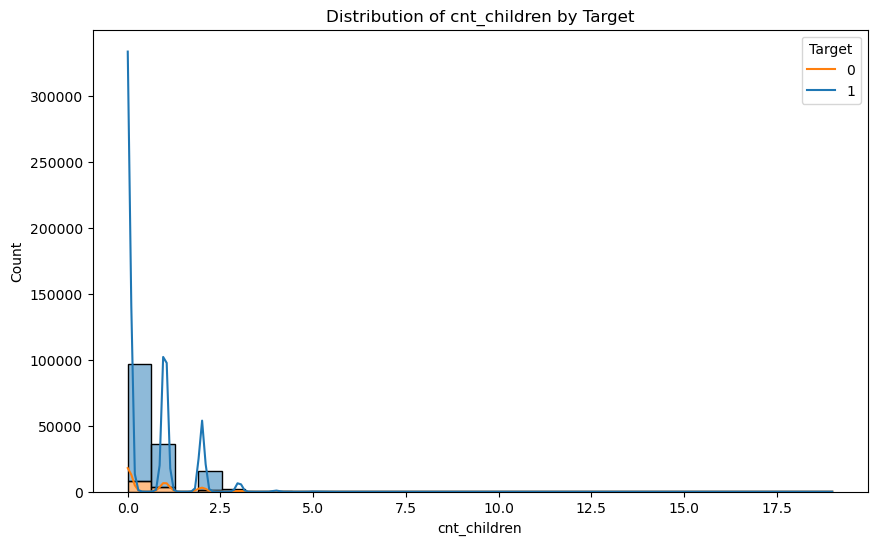

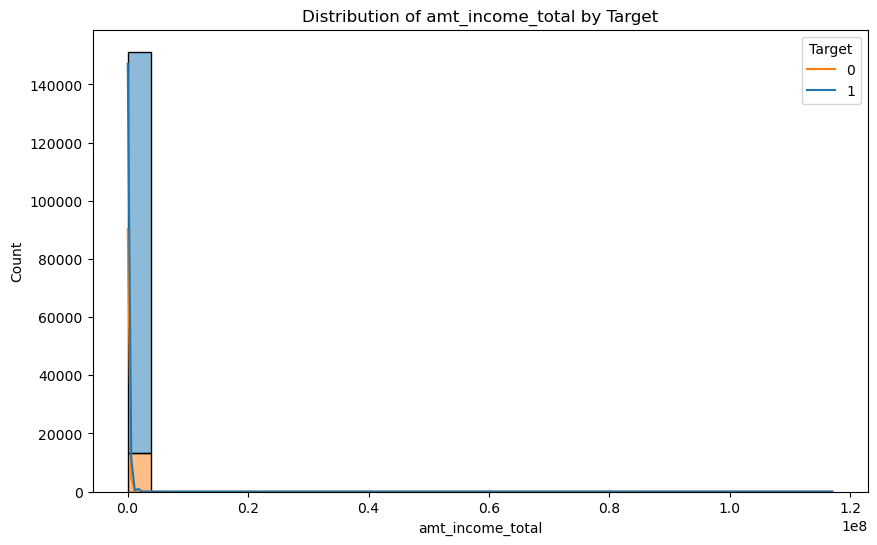

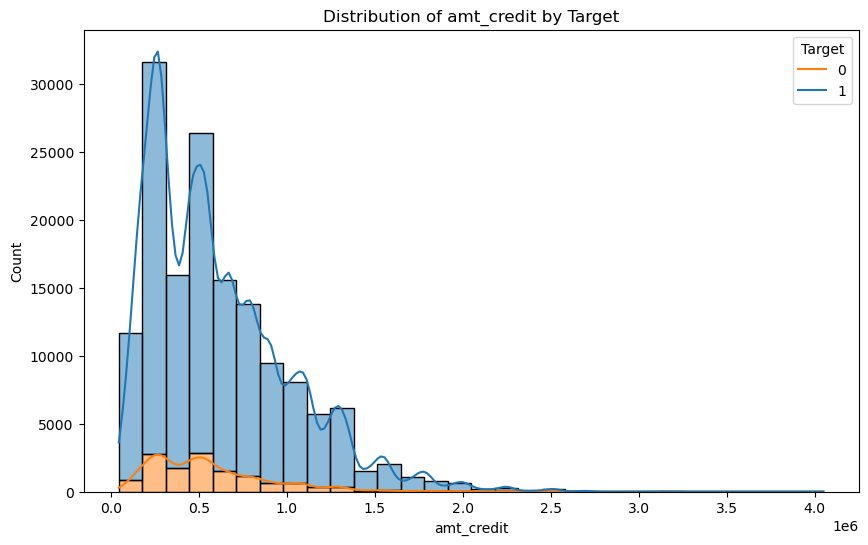

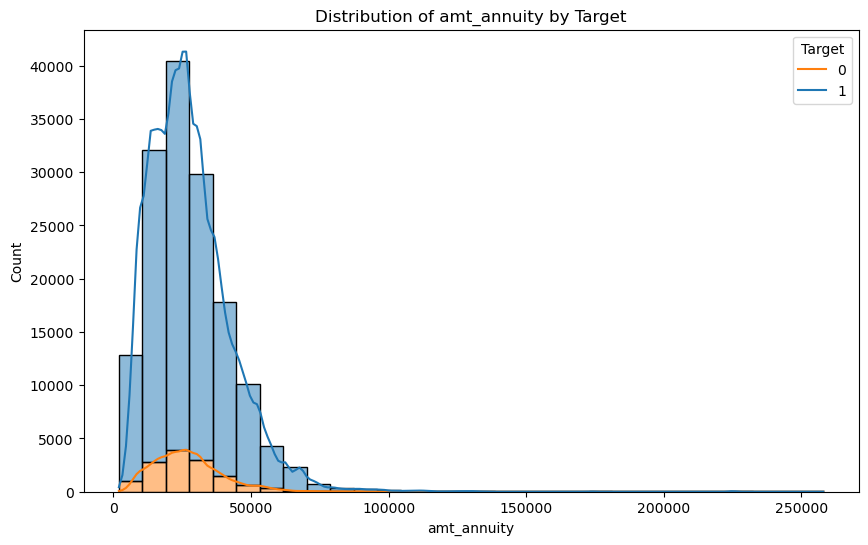

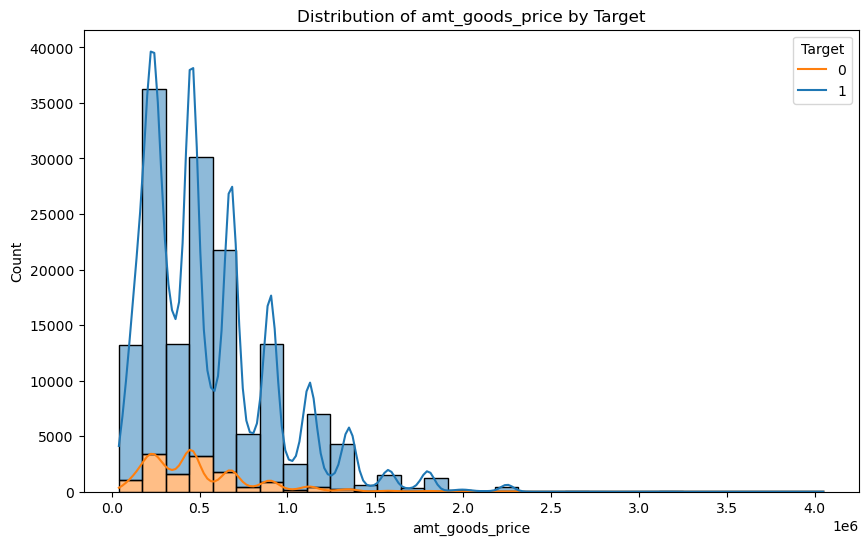

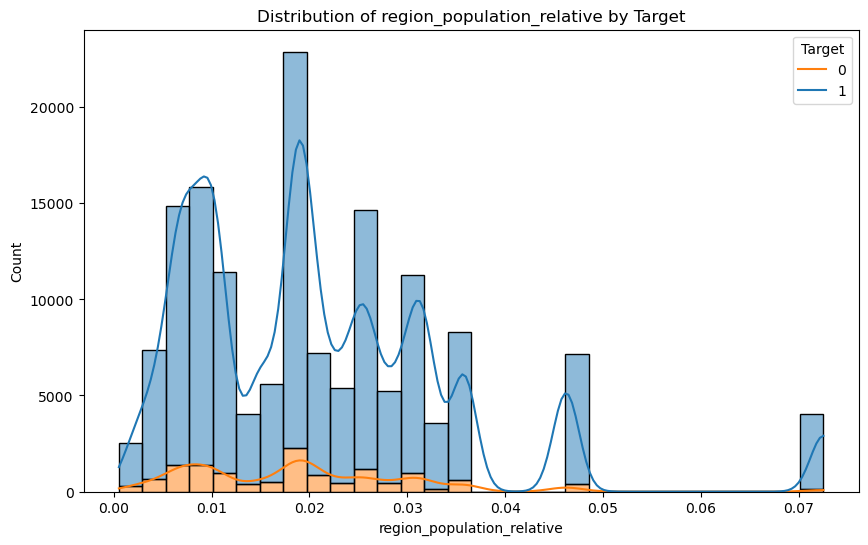

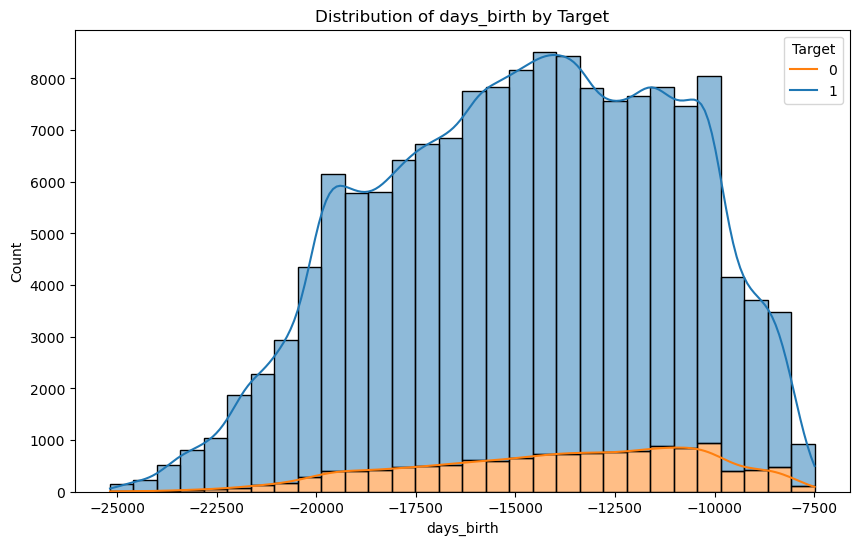

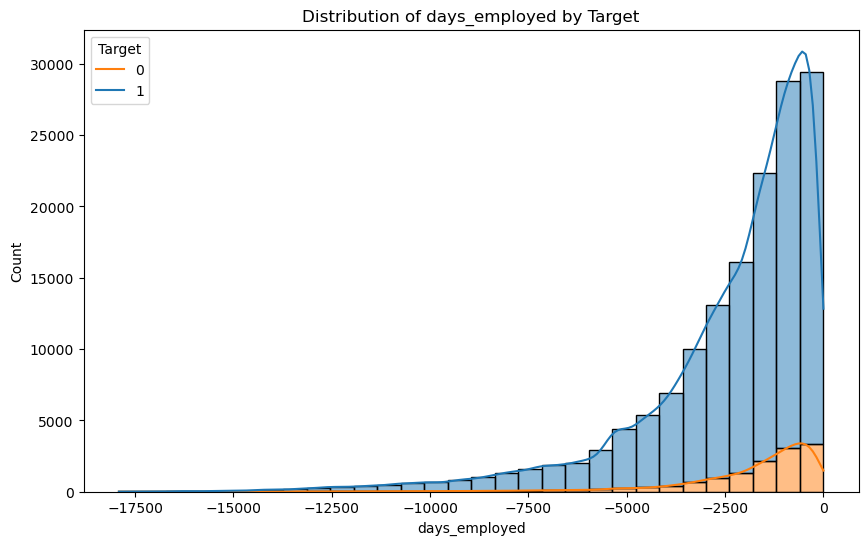

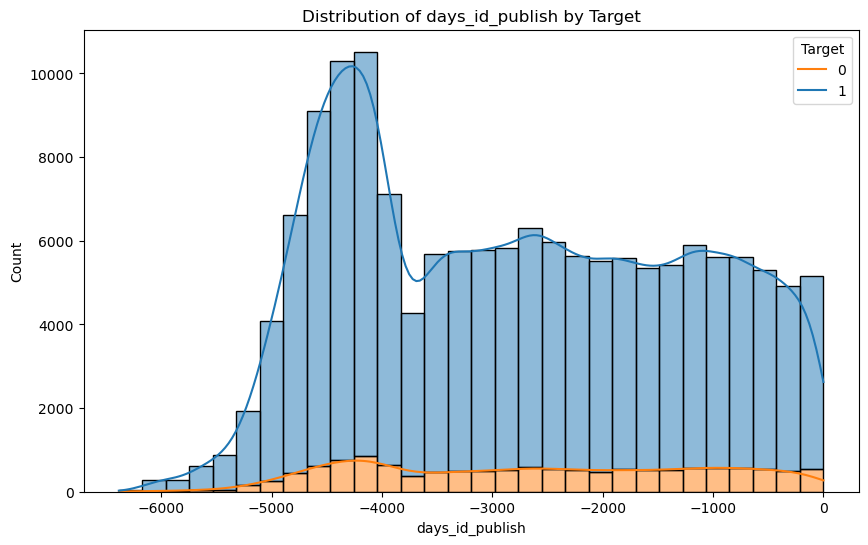

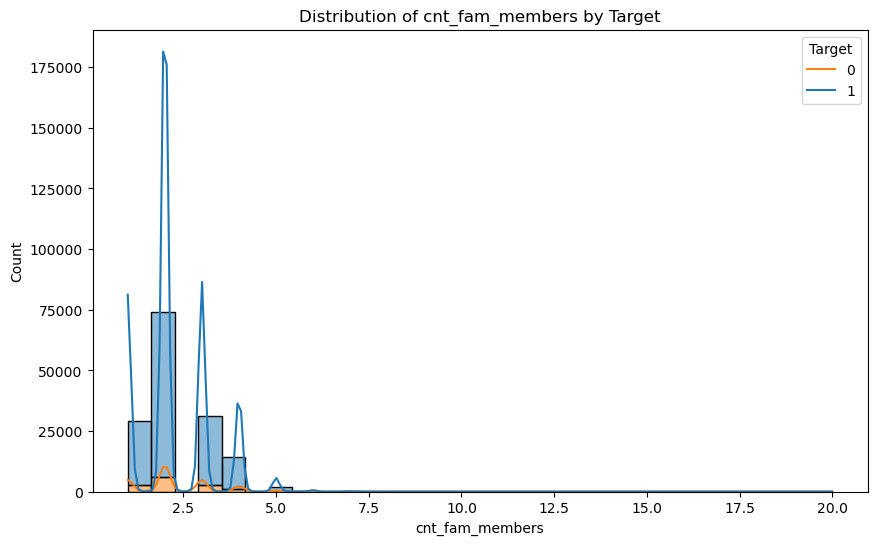

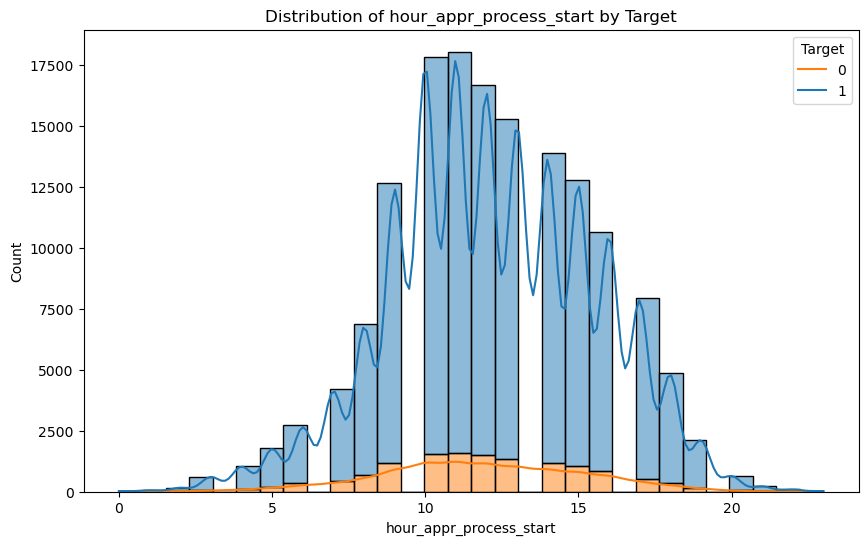

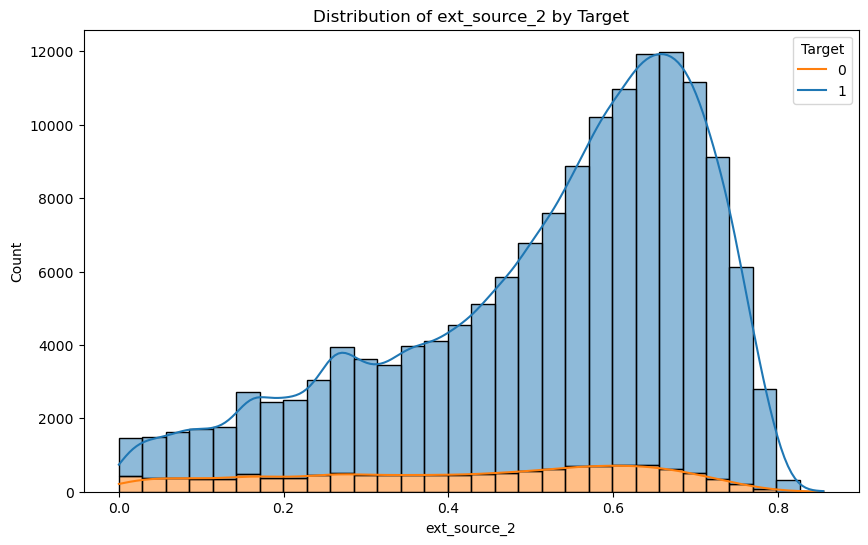

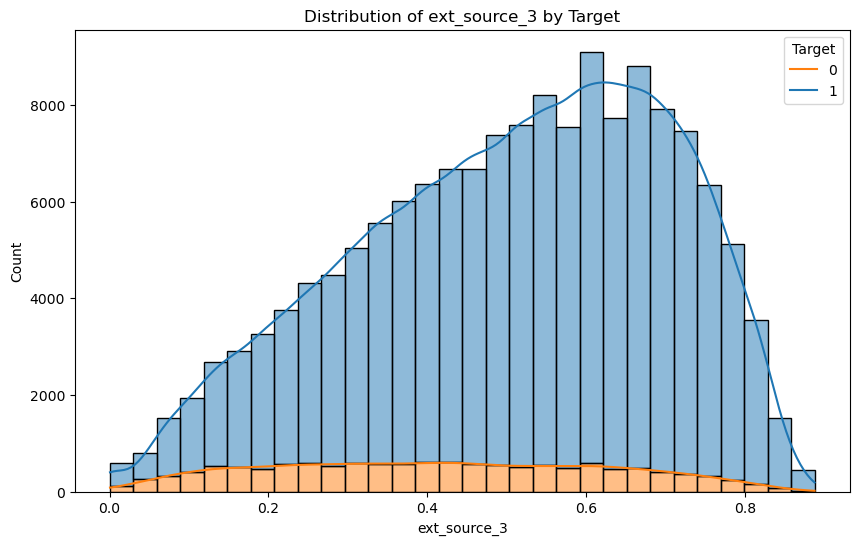

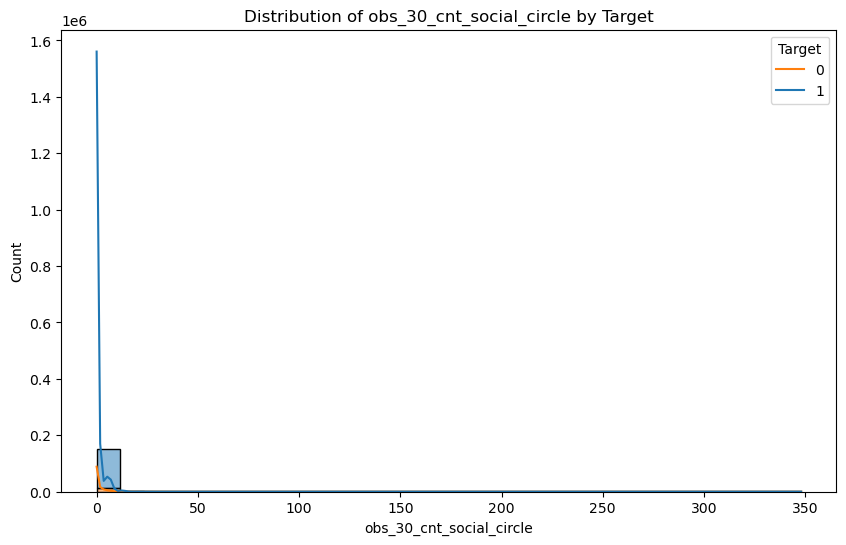

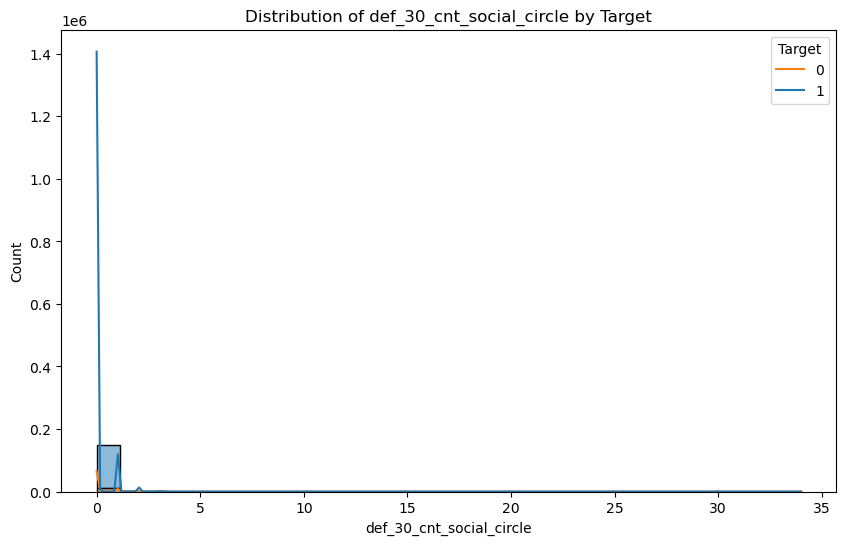

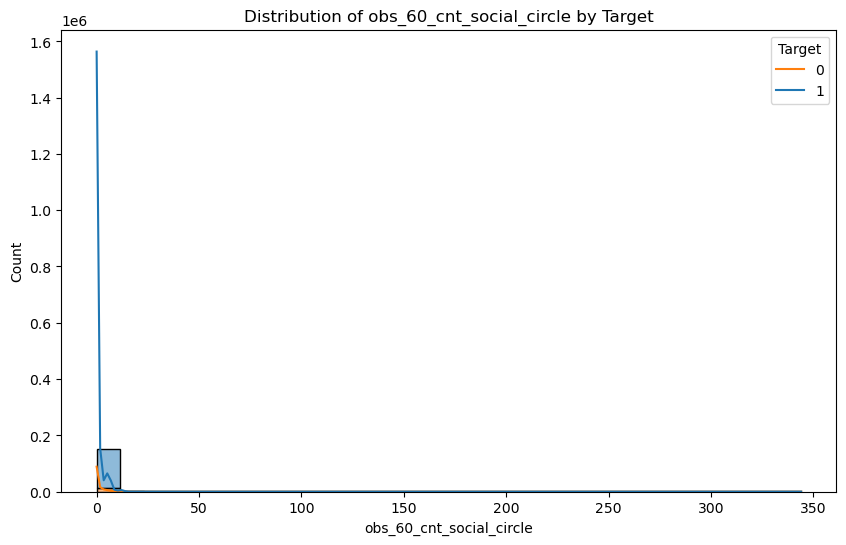

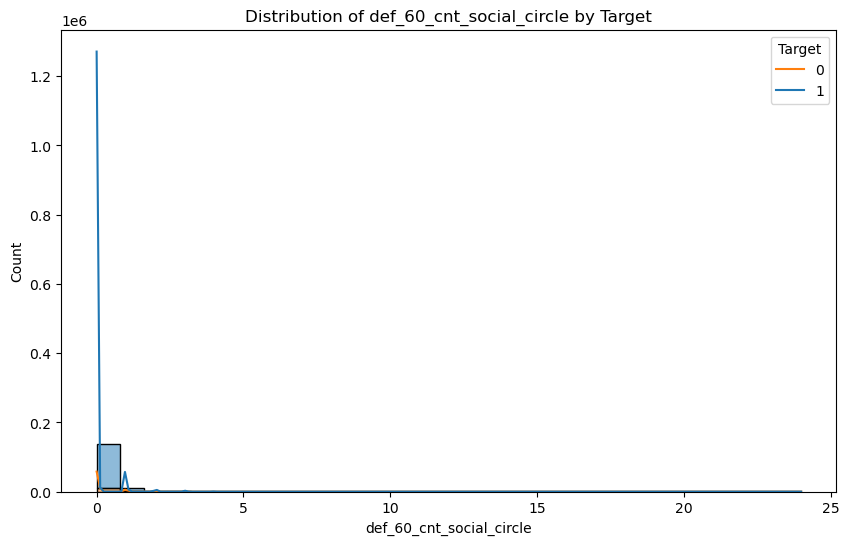

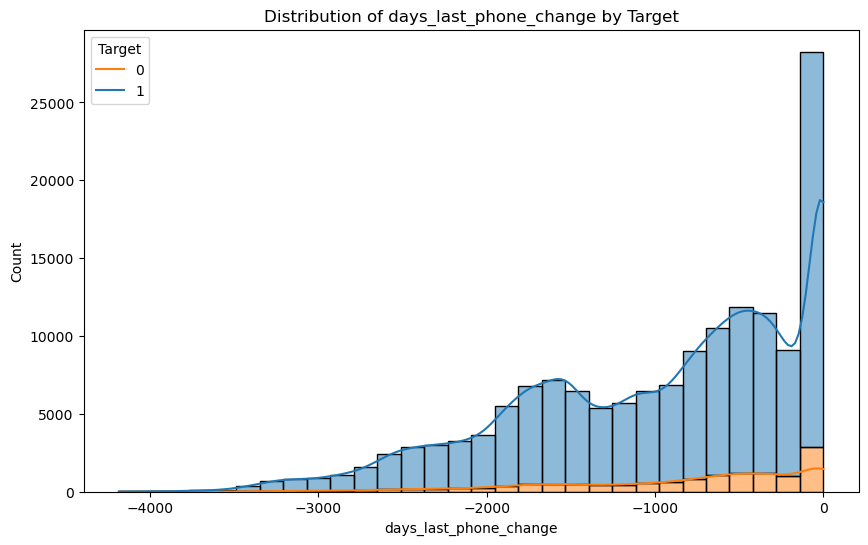

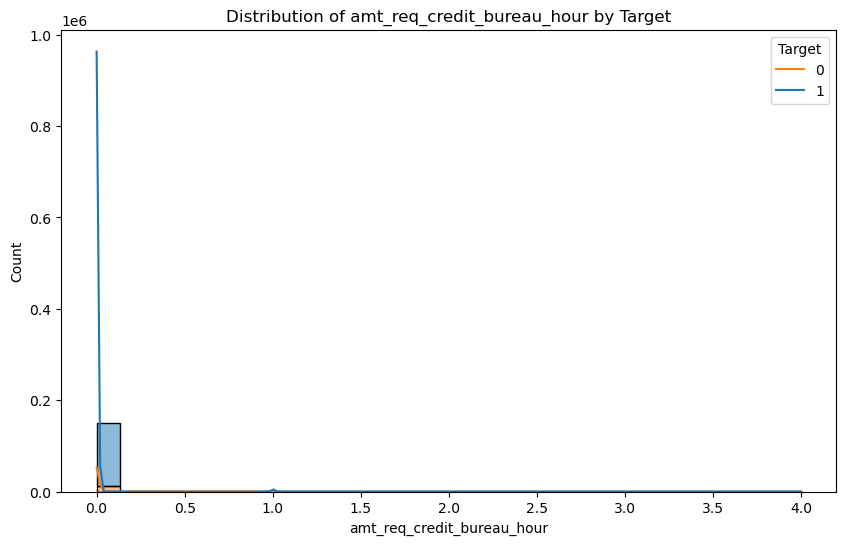

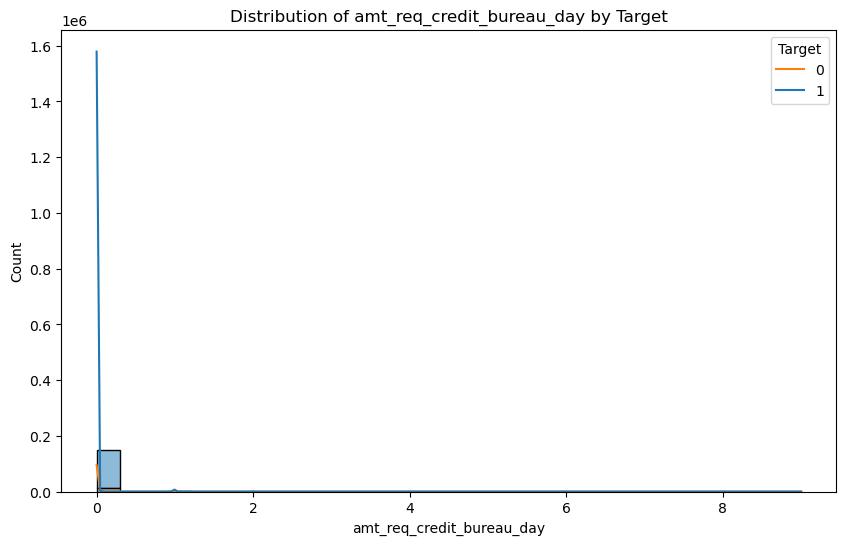

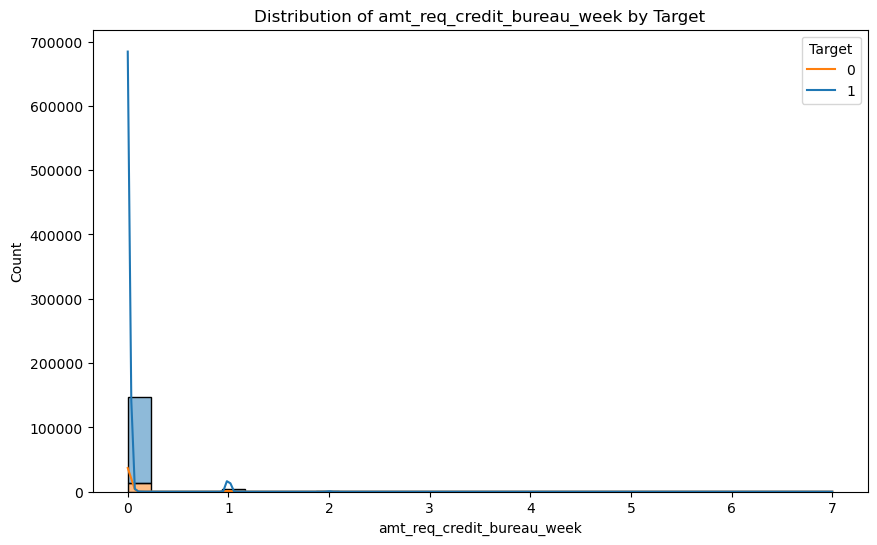

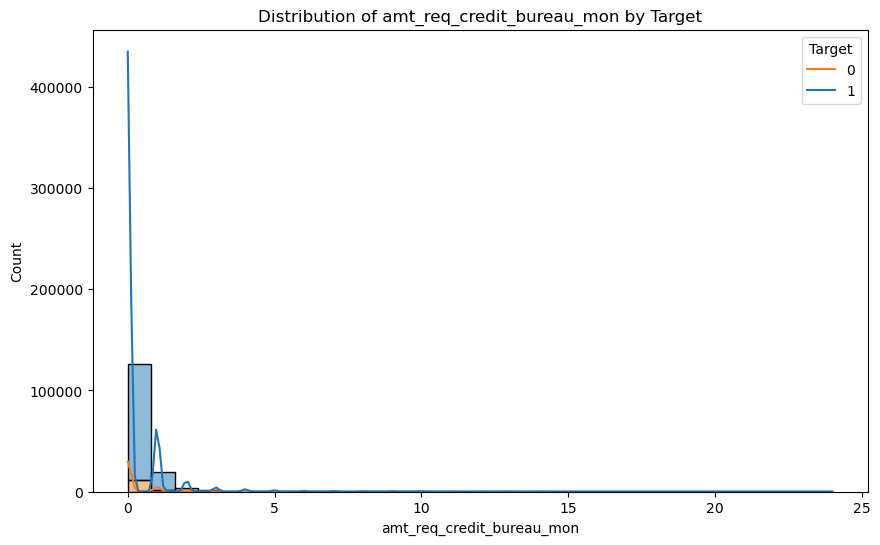

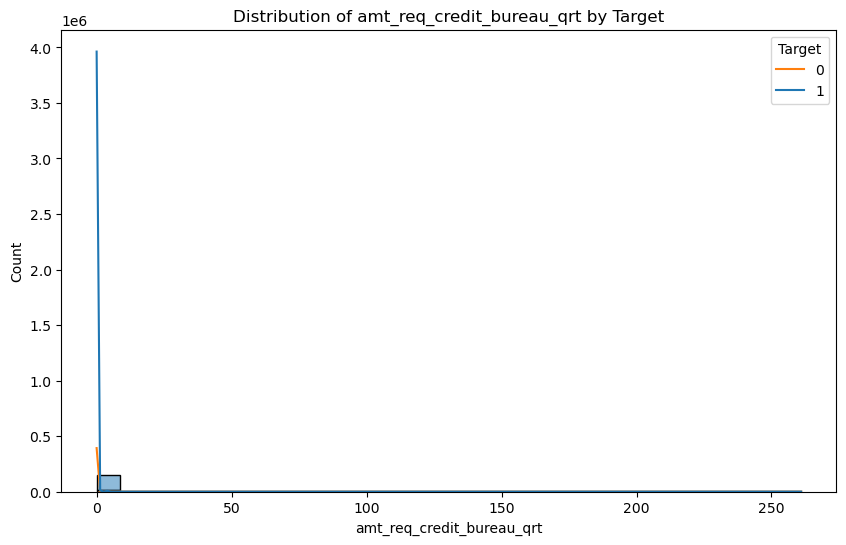

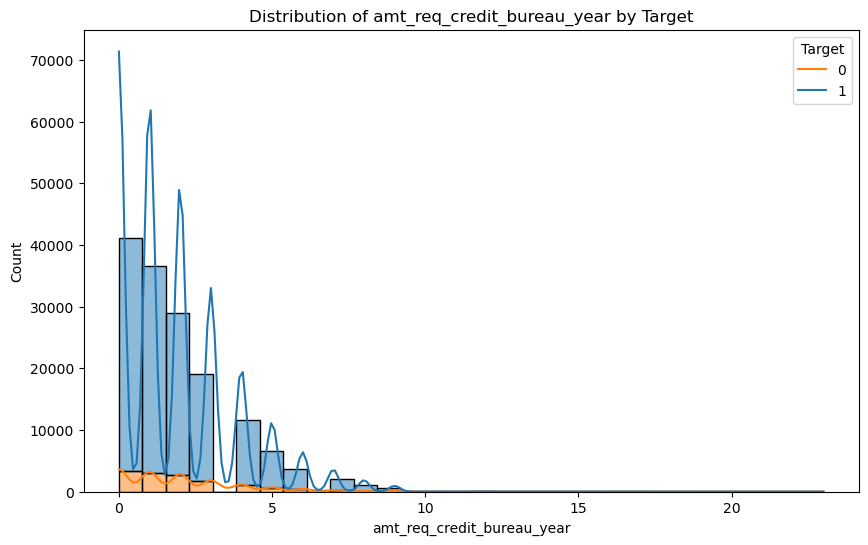

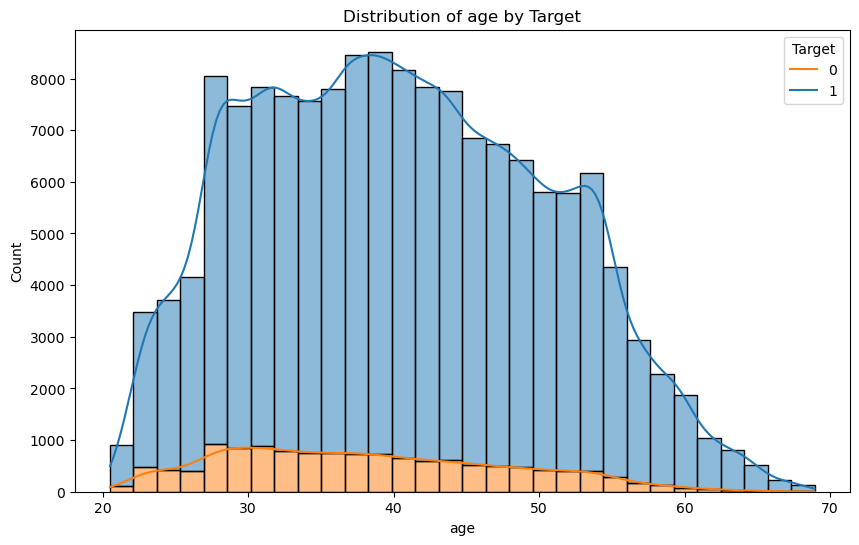

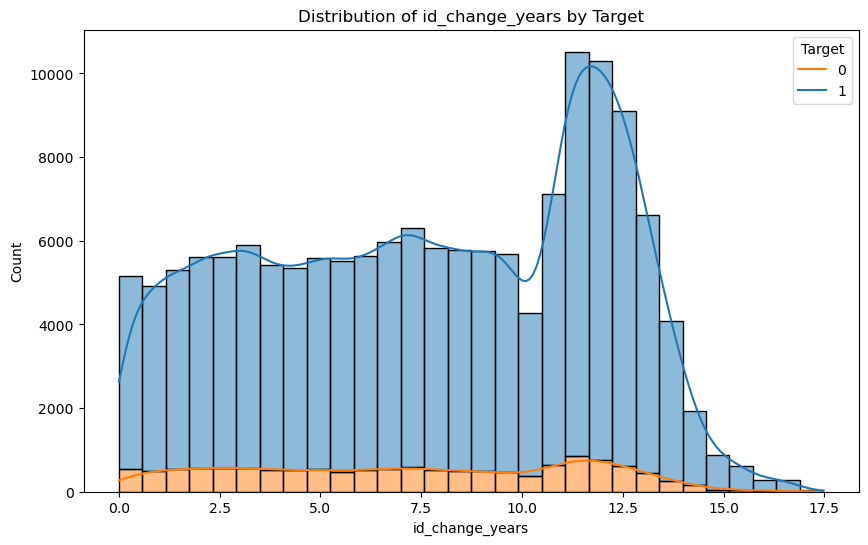

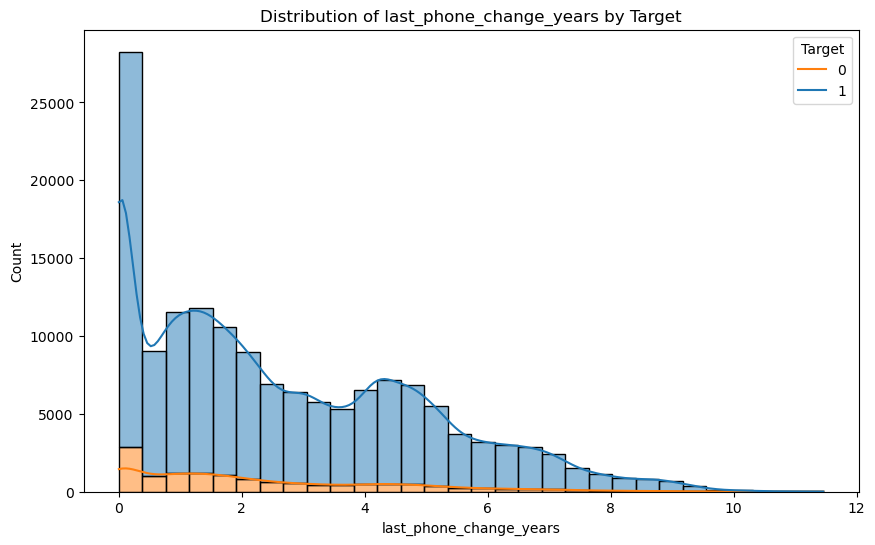

In [436]:
for col in df_clean1.select_dtypes(include=['int32', 'int64', 'float64']).columns:
    if len(df_clean1[col].unique()) > 3:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df_clean1, x=df_clean1[col].values, hue='target', kde=True, bins=30, multiple='stack')
        plt.title(f'Distribution of {col} by Target')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='Target', labels=['0', '1'])
        plt.show()

Now lets look at some of the relationship between our Target variables and numerical values with 3 or fewer unique values for easy interpretation

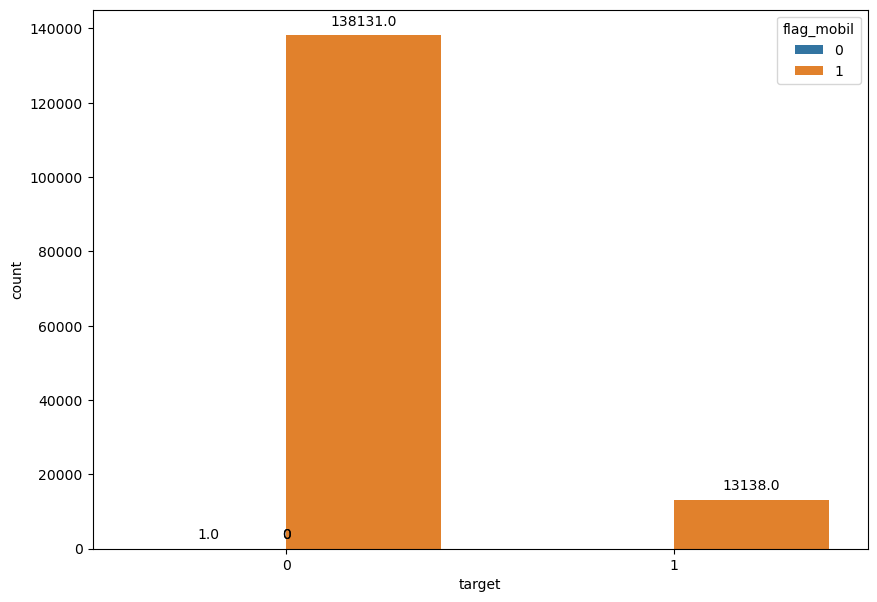

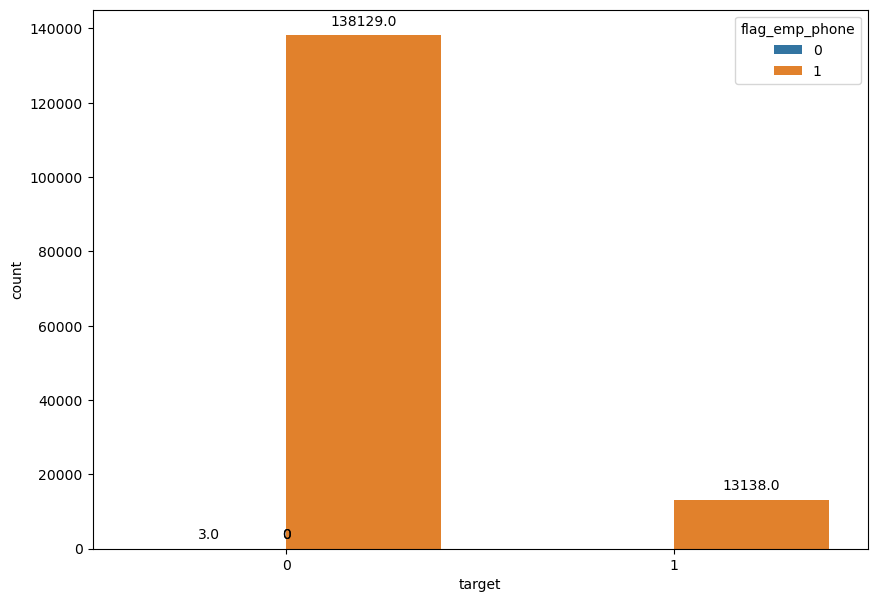

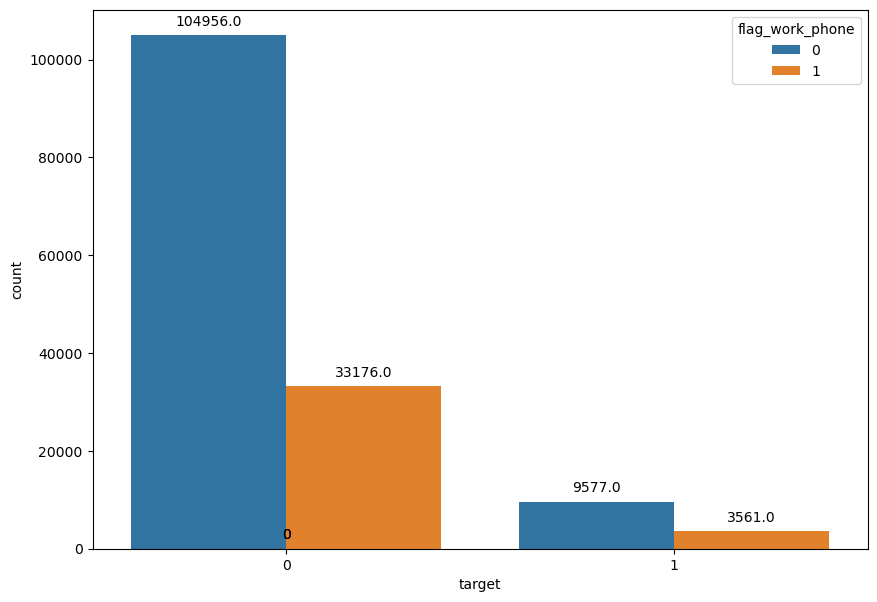

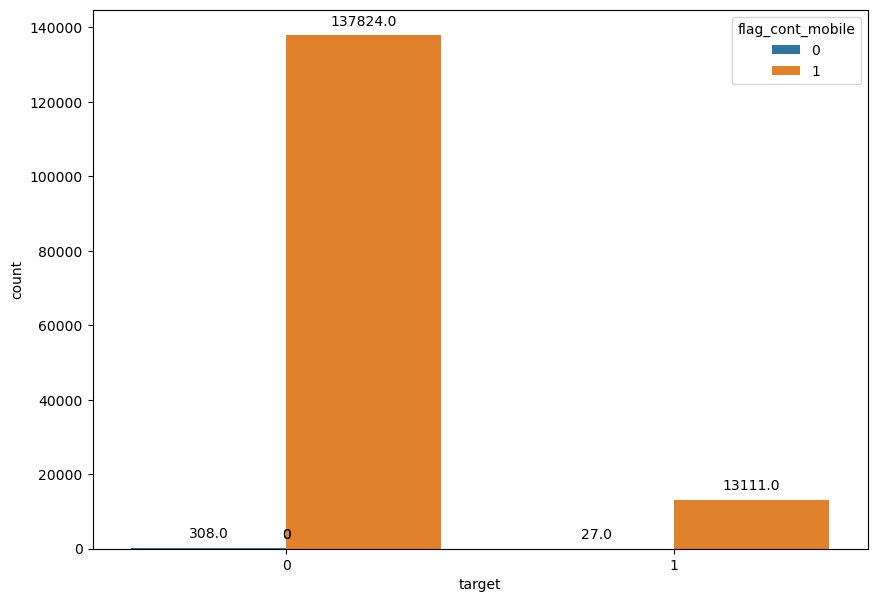

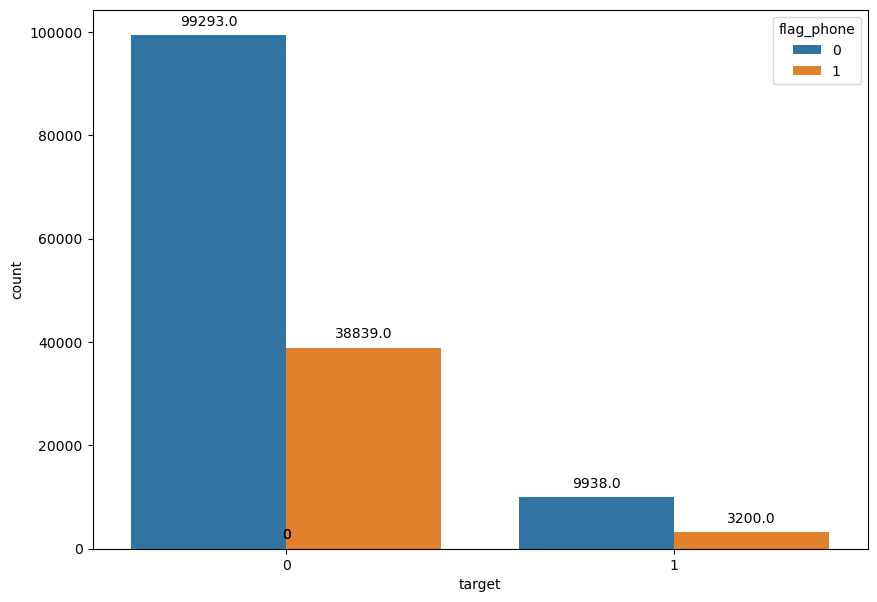

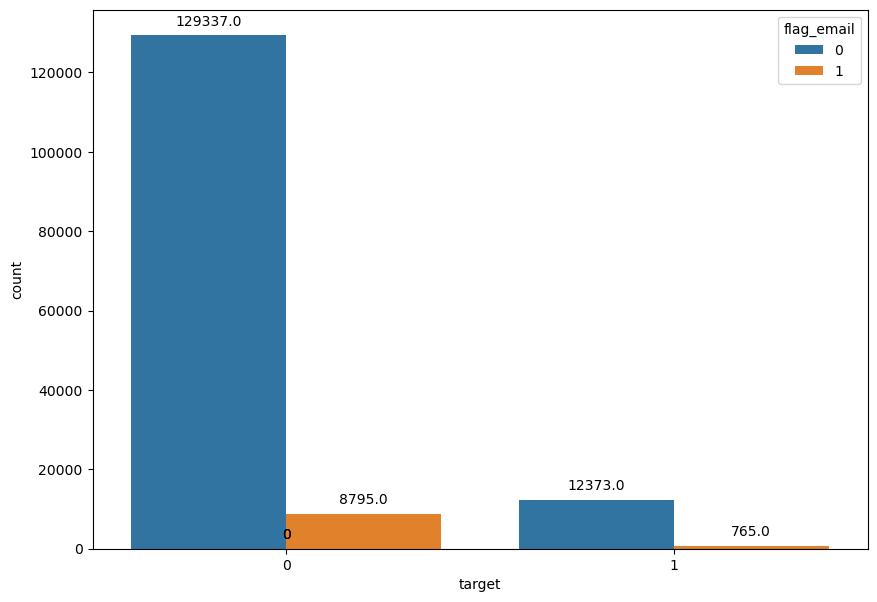

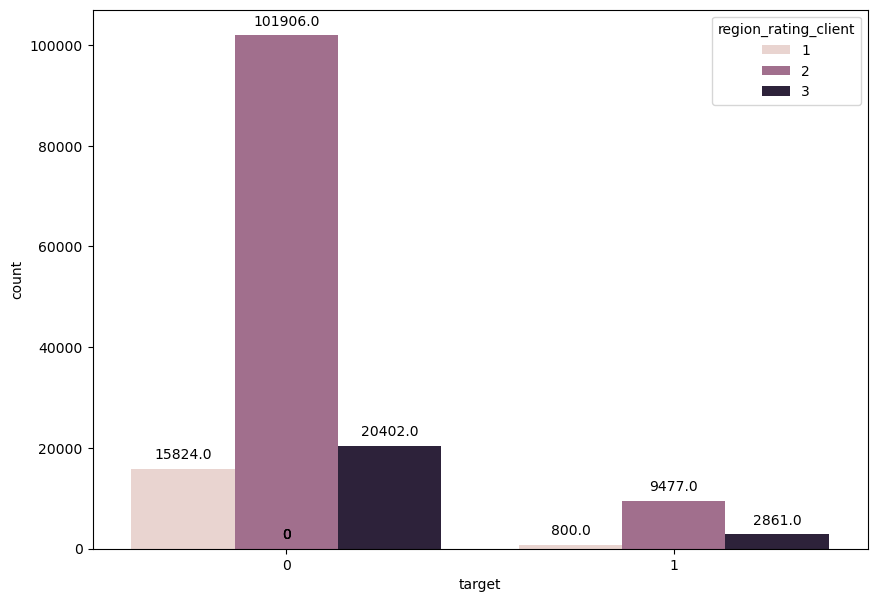

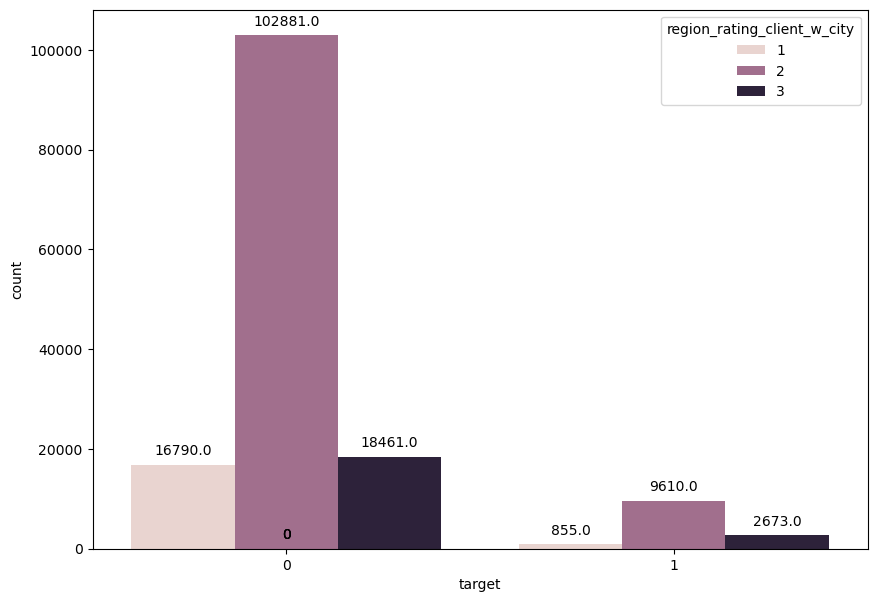

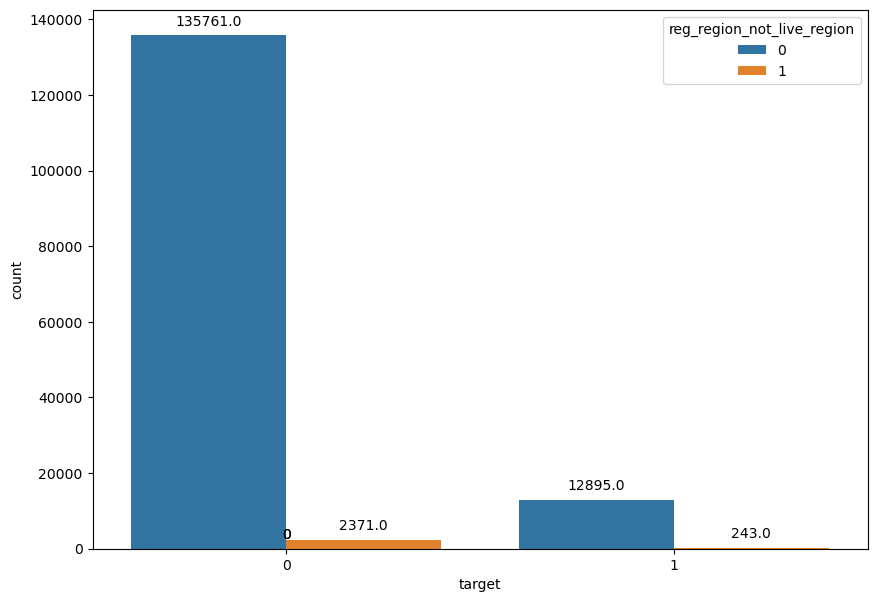

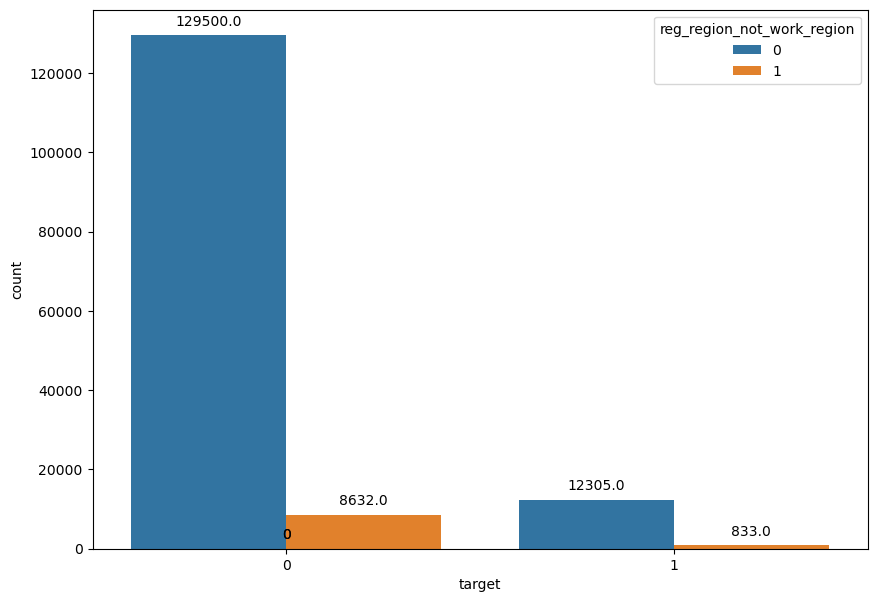

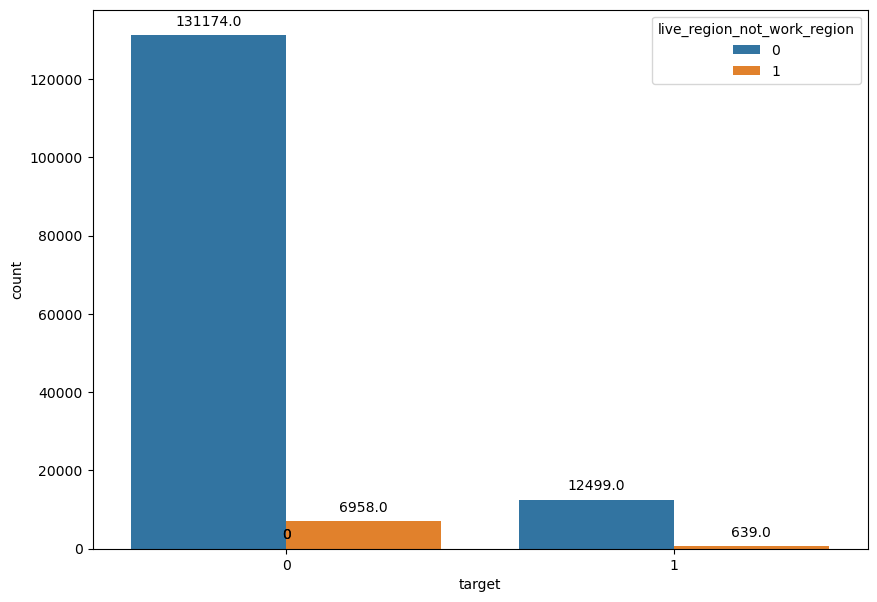

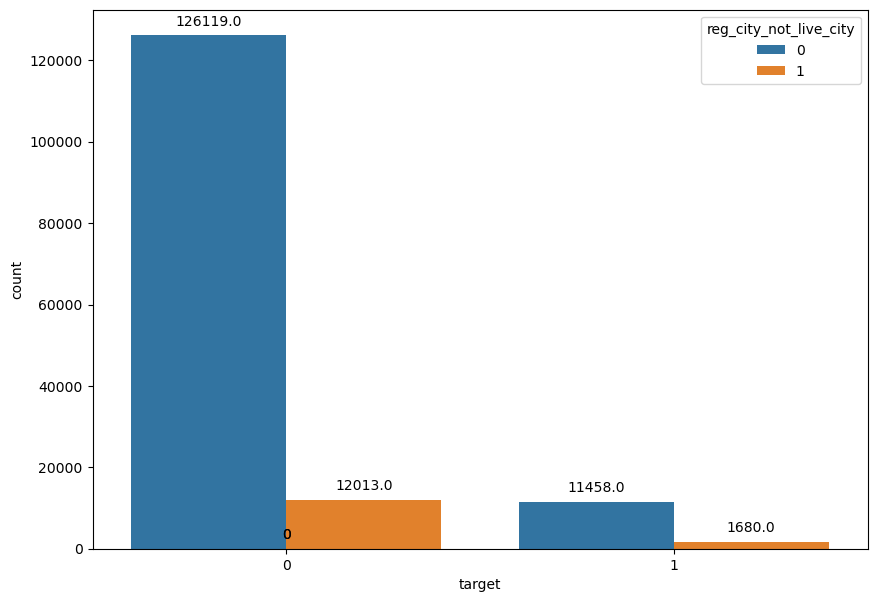

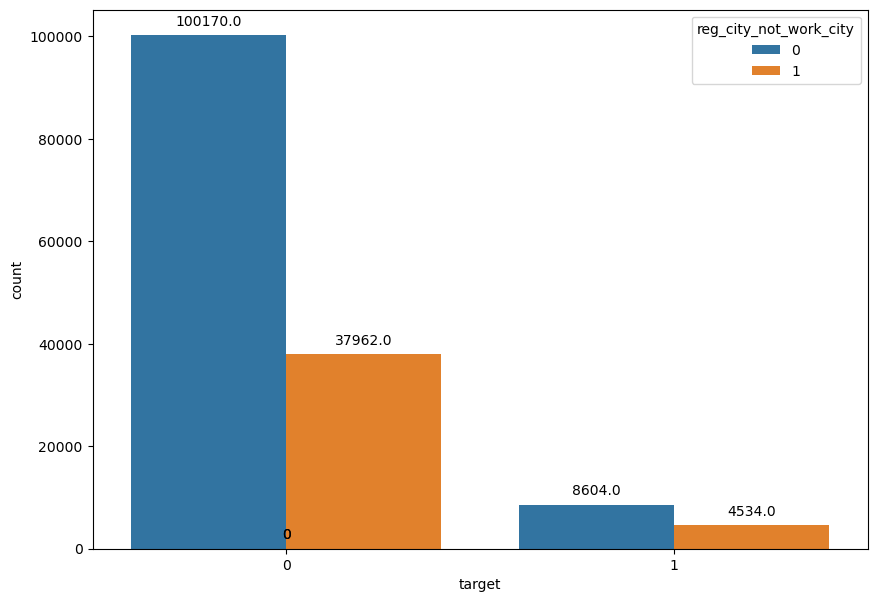

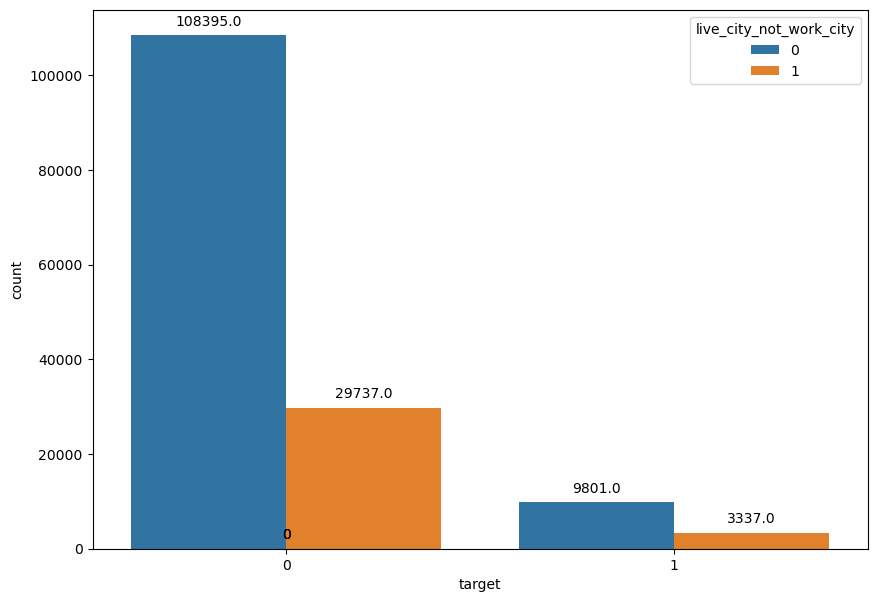

In [438]:
# Specify the column to exclude
exclude_column = 'target'

# Iterate over each column in df_clean2
for i in df_clean1:
    # Check if the column is the one to exclude or if the column is not an object type and has 3 or fewer unique values
    if i != exclude_column and (len(df_clean1[i].unique()) <= 3 and not df_clean1[i].dtype == 'object'):
        plt.figure(figsize=(10,7))
        ax = sns.countplot(data=df_clean1, x='target', hue=i)
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        plt.show()

All applicants except one provided their mobile phone during the application process. Among those who defaulted, all 13,138 had a mobile phone listed in their application.

A majority of applicants did not provide a work phone number. Notably, the highest number of defaulted applicants (9,577) did not have a home phone listed in their application.

Very few applicants had unreachable mobile phones. Among those who defaulted, 13,111 could be contacted via their mobile phone, while only 27 applicants could not be reached.

The largest group of defaulted applicants (9,938) did not provide a home phone number in their application.

The majority of defaulted applicants (12,373) did not provide an email address during their application.

The highest number of defaulted applicants resided in regions rated number 1, followed by those in regions rated number 2.

Similarly, the highest number of defaulted applicants lived in cities rated number 1, followed by those in cities rated number 2.

The majority of defaulted applicants (12,895) had their contact address match their permanent address at the region level. Only 243 applicants provided incorrect addresses.

Most defaulted applicants (12,305) had their work contact address match their permanent address at region level. Only 833 applicants provided incorrect addresses.

The majority of defaulted applicants (12,499) had their work contact address match their contact address at region level. Only 639 applicants provided incorrect addresses.

The majority of defaulted applicants (11,458) had their contact address match their permanent address at the city level. Only 1,680 applicants provided incorrect addresses.

The majority of defaulted applicants (8,604) had their work contact address match their permanent address at the city level, while around 4,534 applicants provided incorrect addresses.

Most defaulted applicants (9,801) had their work contact address match their contact address at the city level, while around 3,337 applicants provided incorrect addresses.

We see that most of the features are quite skewed in nature. Depending on the model we use, it might be necessary to apply some transformations on these features to make the model perform better and faster.

I found a slight error in one of the graphs above, where flag_work_phone and flag_phone has the same description. There is another column named flag_emp_mobil which possibily mean work phone. Therefore I am looking to drop the flag_emp_phone and will change the description of the flag_work_phone column.



In [441]:
# List of column names to drop
columns_to_drop3 = ['flag_emp_phone']

# Drop the specified columns from the DataFrame
df_clean2 = df_clean1.drop(columns=columns_to_drop3)

In [442]:
# To show the info of the Dataset
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151270 entries, 0 to 184505
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   name_contract_type           151270 non-null  object 
 1   code_gender                  151270 non-null  object 
 2   flag_own_car                 151270 non-null  object 
 3   cnt_children                 151270 non-null  int64  
 4   amt_income_total             151270 non-null  int32  
 5   amt_credit                   151270 non-null  int32  
 6   amt_annuity                  151270 non-null  int32  
 7   amt_goods_price              151270 non-null  int32  
 8   name_type_suite              151270 non-null  object 
 9   name_income_type             151270 non-null  object 
 10  name_education_type          151270 non-null  object 
 11  name_family_status           151270 non-null  object 
 12  name_housing_type            151270 non-null  object 
 13  regi

## Positive and Negative Correlation between numerical variables <a id='positivenegativecorr'></a> <ins>

#### Which columns are positively correlated with the target Variable? Which columns are negatively correlated? 

Lets explain the correlation of all the variables by a heat map. A heatmap is a graphical representation of data where values in a matrix are represented as colors. <br>
It's particularly useful for visualizing the correlation between different variables in a dataset. Here's how you can interpret a heatmap:

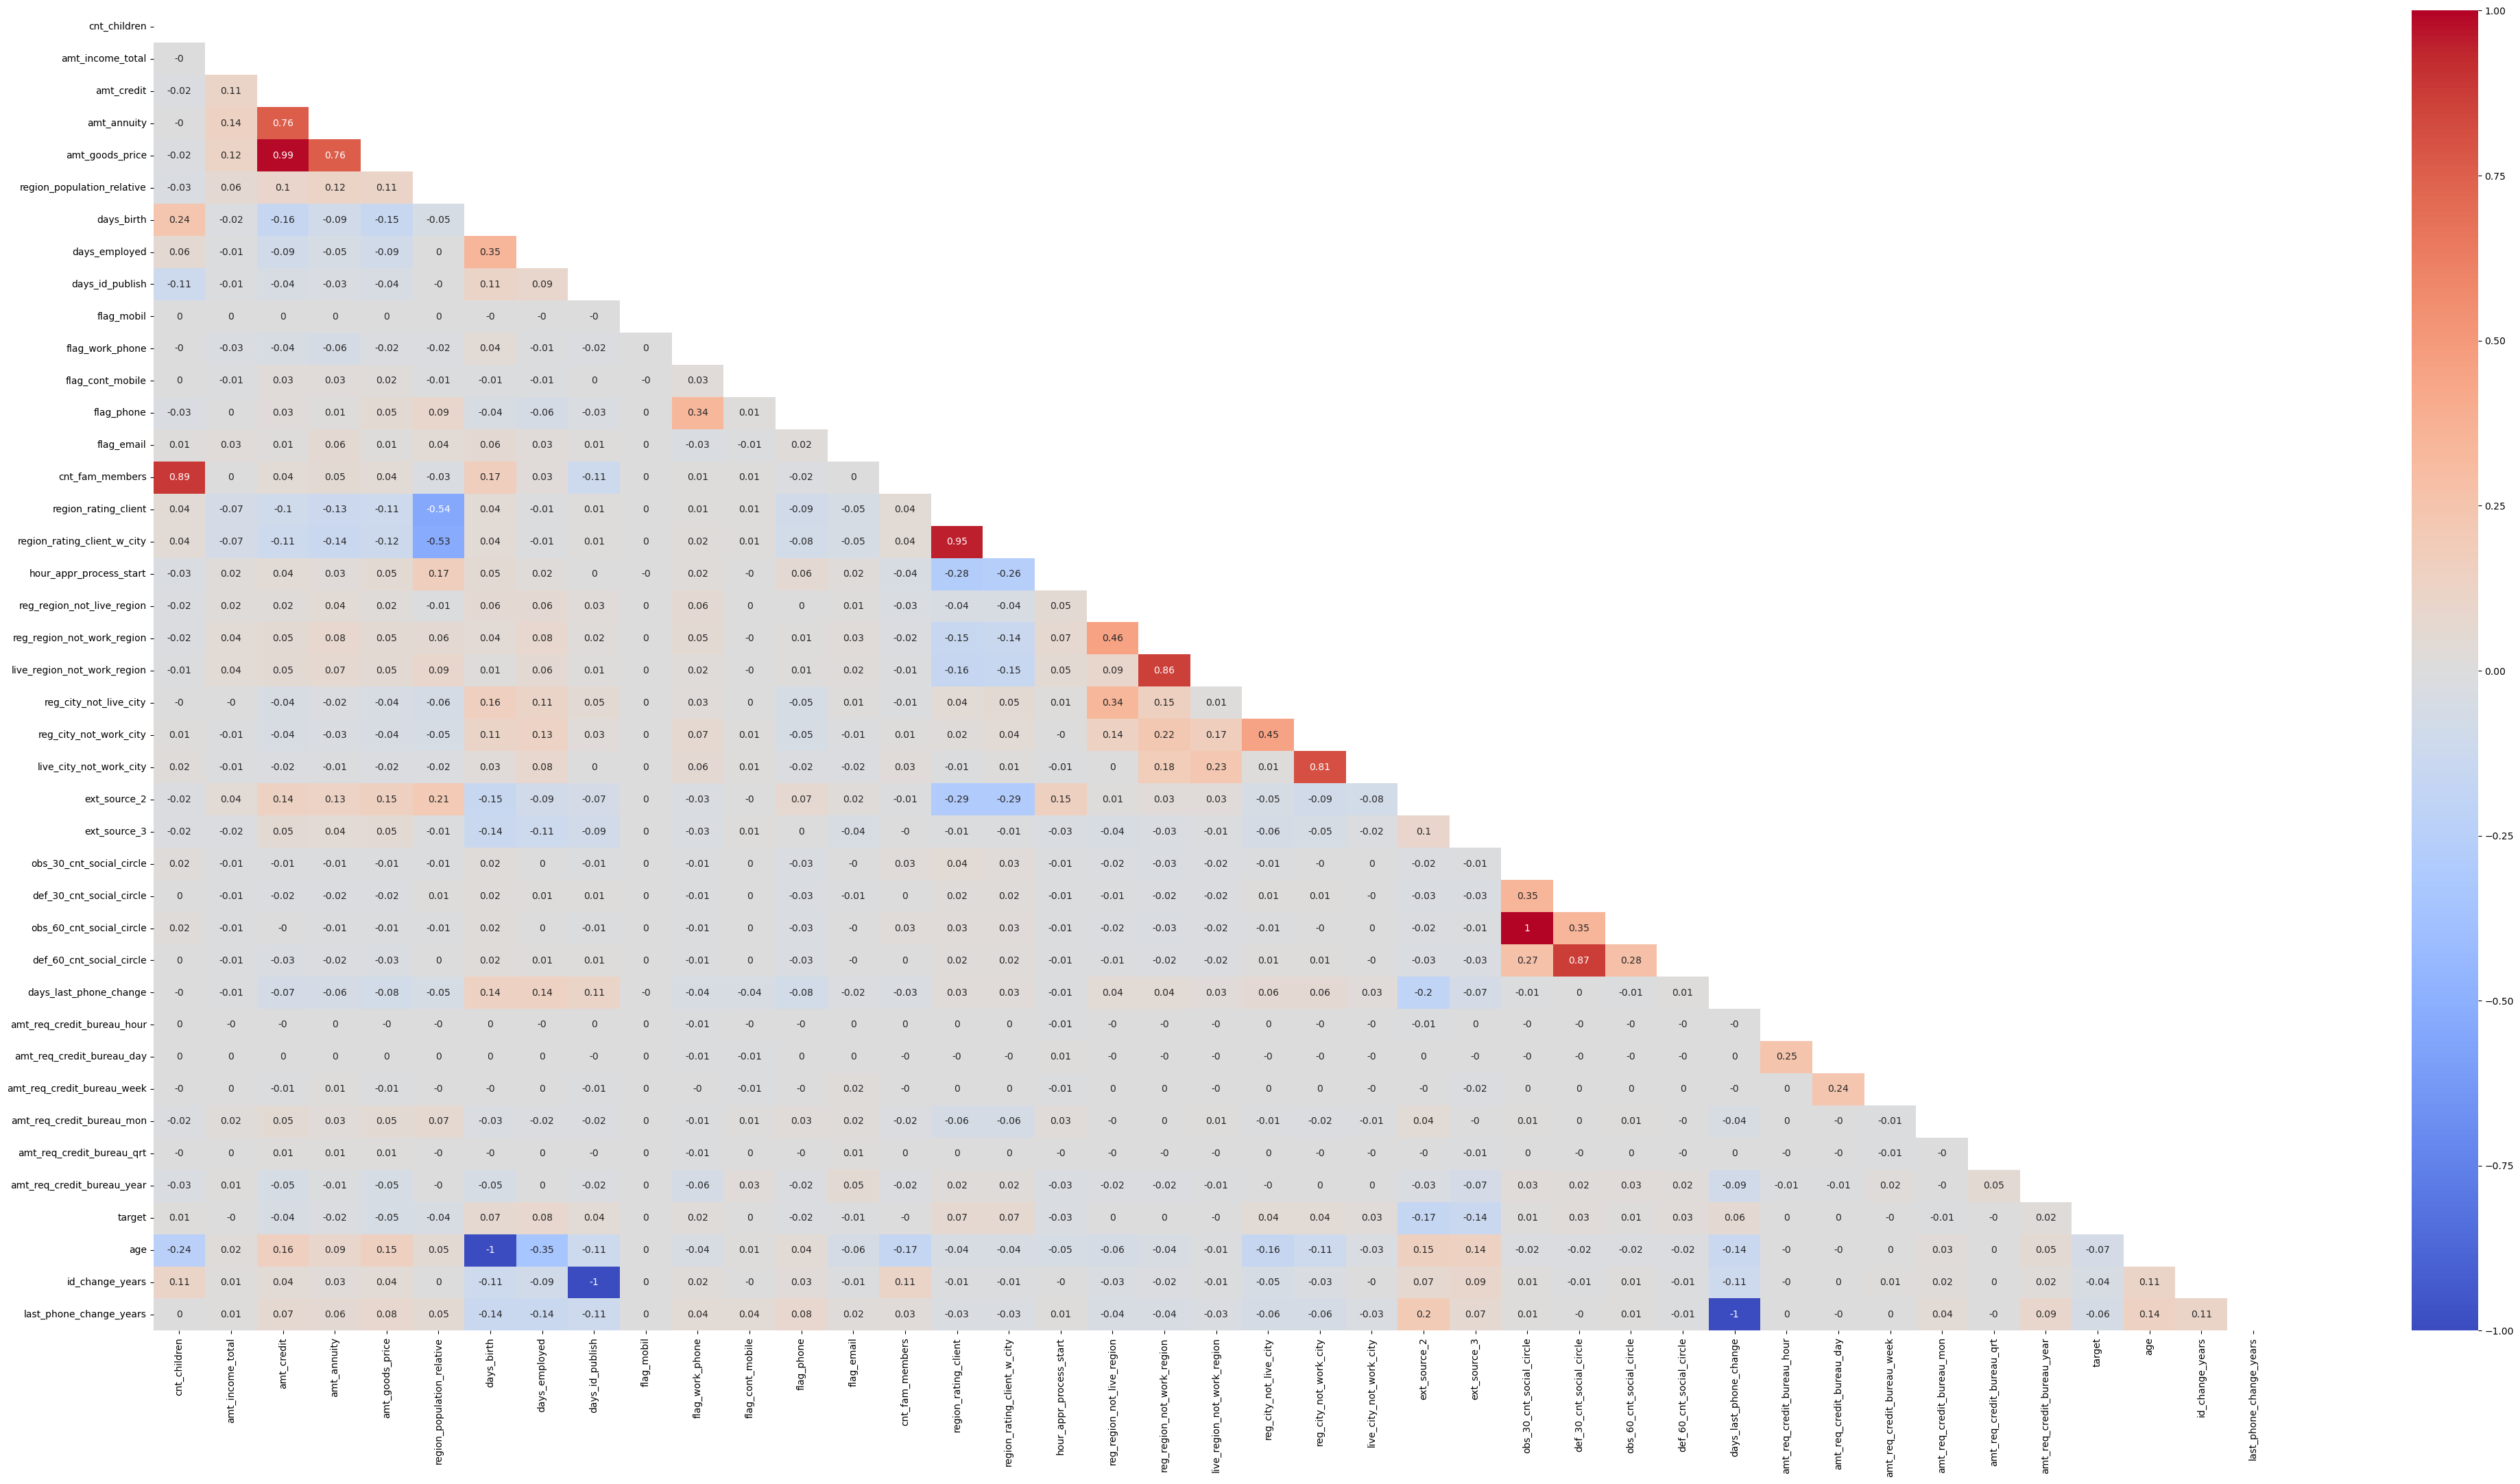

In [446]:
# Select numerical columns
data_num_columns = df_clean2.select_dtypes(include='number').columns.tolist()
mask = np.triu(df_clean2[data_num_columns].corr())
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(50,25))
sns.heatmap(df_clean2[data_num_columns].corr().round(2), annot=True, vmax=1, vmin=-1, cmap='coolwarm', mask=mask, center=0)
plt.show()

Interpreting the Colors from the above heatmap: 

Red (+1): Strong positive correlation. <br>
Pink/Light Red: Moderate positive correlation. <br>
White/Gray (0): No correlation. <br>
Light Blue: Moderate negative correlation. <br>
Blue (-1): Strong negative correlation. <br>

Few Observations and Interpretations from the above Heatmap:

Positive Correlation

Explanation: A positive correlation means that as one variable increases, the other variable also tends to increase. Conversely, as one variable decreases, the other tends to decrease. This indicates a direct relationship between the two variables.

Interpretation: If the heatmap shows a positive correlation (often depicted in shades of blue or green depending on the color scheme), it suggests that the variables move in the same direction. For example, if X and Y have a positive correlation, when X goes up, Y also goes up, and when X goes down, Y goes down.

Example: In the above map,  a positive correlation between amt_good_price and amt_credit would suggest that higher the price of the asset individuals hold tend to take out higher amount loans.

Negative Correlation

Explanation: A negative correlation means that as one variable increases, the other variable tends to decrease. This indicates an inverse relationship between the two variables.

Interpretation: If the heatmap shows a negative correlation (often depicted in shades of red or orange), it suggests that the variables move in opposite directions. For example, if X and Y have a negative correlation, when X goes up, Y goes down, and when X goes down, Y goes up.

Example: In the above map, a negative correlation between days_last_phone_change and last_phone_change_years would suggest that days_last_phone_change column has all negative values and last_phone_change_years have all positive values (This column was created as part of EDA process).

Zero or No Correlation

Explanation: A zero or near-zero correlation means there is no discernible linear relationship between the two variables. Changes in one variable do not predict changes in the other.

Interpretation: In a heatmap, zero or very low correlations are usually shown in a neutral color (often white or gray). This indicates that the variables do not move together in any consistent pattern.

Heatmap Visualization

Color Intensity: The intensity of the color in a heatmap represents the strength of the correlation. Darker or more intense colors indicate stronger correlations (positive or negative), while lighter colors indicate weaker correlations.

Diagonal: The diagonal of a heatmap matrix typically shows correlations of variables with themselves, which are always 1 (perfect correlation) and are often left blank or colored in a neutral tone to highlight the other correlations.

# Part 3 - <ins> Conclusion and Next Steps <a id='conclusion'></a> <ins>

## Conclusion:

Data Overview: The dataset contains information on various features such as occupation type, region population, days since last phone change, income of the applicant, credit scores and Target Variable which is our Dependent variable.

Data Cleaning: We have cleaned the data and sorted all the null values in the Dataset. We had a huge number of null values. We dropped more than 20% of the null values except the occupation type column had a significant number of missing values (approximately 31%). These missing values were filled with a new category named 'Unknown' to preserve the integrity of the dataset. We were able to fill in the majority of the null value colums with either a Forward filling method or a Backward Filling method as either of the two methods didnt affect the distribution of the concerned variable. We also considered removing outliers, and dropping unnecessary columns.

Individual Column Study: We studied all the 122 columns inorder to understand what role each of them had in the dataset, and deleted rows and columns which we found not useful for the Analysis

Created 3 new columns: We have added 3 new variables, as the original column was calculated in days and I converted them in years for easy interpretation.

Relationship Analysis: A relationship graph (scatter plot) was generated to explore the association between all the object/numerical variables and the target variable. This analysis helps understand if there's any correlation between the time since the last phone change and the target variable.

Heat map plotting: This plotting helped us understand which variable had a positive and negative correlation.

## Next Steps:

## EDA Part 2 : <br>
I am looking to run a detailed correlation and coefficient statistics among all the variables against the Target variable. <br>
I will also be providing the heat map again and deleting further columns that will help us build our models effeciently. <br>
I will also be deleting the three days_birth, days_id_publish and days_last_phone_change as I have created new columns that denotes the values in years.

## Feature Engineering: <br>
I am looking to create dummy variables for all the available object data type columns which holds limited values <br>
I am also looking to delete the 'Unknown' category from the Occupation Type column inroder to avoid creating bias and help in creating appropriate models <br>
As I progress through the project if there are any other columns or rows that need dropping I will be doing so
I will be converting all object data types to binary data types or delete columns as needed which will avoid multi culleanirity occurances. <br>

## Machine Learning Models:
I am thinking of using either all or some:

Logistic Regression, <br>
Decision Trees, <br>
Random Forest <br>
XGBoost <br>
Gradient boosting, <br>
Neural networks, and <br>
Support Vector Machine
